Shrunken hg19 regions by 2000




So let's align all of the unmapped reads from each subject in 1000 genomes to a collection of viral references. These did not align to hg19, which is odd being that the homogeneity of the human reference to each viral reference is the hurdle here. A fasta was extracted from each subject's unmapped bam file. This fasta file was aligned to a viral reference. And the coverage depth was extracted from this alignment file for each virus. In addition, the number of reads that aligned in the EXPANDED nonhg19 regions were counted and the ratio of this number and both the total unmapped reads, as well as the total number of sequenced reads for subject. These last 2 numbers are plotted below, grouped by the subject's super population.


```
samtools fasta -N $subjects_unmapped_bam

bowtie2 --all --threads 35 -f --xeq -x virii --very-sensitive -U ${subject}/${subject}.fasta.gz

samtools depth ${subject}/${subject}.virii.bam > ${subject}/${subject}.virii.depth.csv

samtools view -c -F 4 ${subject}/${subject}.virii.bam ${region} > ${f}

```


Minimal difference to the comparison to regions shrunk by 1000 bp.


In [1]:
import pandas
import sqlite3
import matplotlib.pyplot as plt

In [2]:
# For some reason, if this is in the same call as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [3]:
virii=pandas.read_csv('/Users/jakewendt/20181214-1000genomes-unmapped-virii/virii_details.csv', sep="\t", header=None, 
                      names=["accession","description"],
                      index_col=["accession"])
virii.head()

description
accession                                                    
AB513134.1  Human T-lymphotropic virus 1 proviral DNA, com...
AB618031.1  Herpes simplex virus (type 1 /strain RH2) DNA,...
AF037218.1     Human herpesvirus 7 strain RK, complete genome
AF148805.2   Human herpesvirus 8 strain GK18, complete genome
AP015015.1  Human herpesvirus 4 DNA, complete genome, stra...

In [4]:
metadata=pandas.read_csv("1000genomes_metadata.csv")
metadata.rename(index=str, columns={"Sample":"subject"},inplace=True)
metadata.head()

subject Population Code           Population Description  Gender  \
0  HG00096             GBR  British in England and Scotland    male   
1  HG00097             GBR  British in England and Scotland  female   
2  HG00098             GBR  British in England and Scotland    male   
3  HG00099             GBR  British in England and Scotland  female   
4  HG00100             GBR  British in England and Scotland  female   

  Super Population Code Super Population Description  
0                   EUR                     European  
1                   EUR                     European  
2                   EUR                     European  
3                   EUR                     European  
4                   EUR                     European

In [5]:
conn = sqlite3.connect("/Users/jakewendt/20190130-1000genomes-unmapped-viruses/unmapped_viral_mapped.sqlite3")
df = pandas.read_sql_query("SELECT * FROM subjects ORDER BY subject", conn)
df.head()

subject  unmapped     mapped      total AB513134_1  AB513134_1_unmapped  \
0  HG00096   2083467  145063589  147147056          0                  0.0   
1  HG00097   1158537  298693620  299852157          0                  0.0   
2  HG00099   1147814  247709161  248856975          0                  0.0   
3  HG00100  13376337  408106230  421482567          0                  0.0   
4  HG00101   1058895  217906779  218965674          0                  0.0   

   AB513134_1_total nonhg19_AB513134_1  nonhg19_AB513134_1_unmapped  \
0               0.0                  0                          0.0   
1               0.0                  0                          0.0   
2               0.0                  0                          0.0   
3               0.0                  0                          0.0   
4               0.0                  0                          0.0   

   nonhg19_AB513134_1_total  ... X83413_2_total  nonhg19_X83413_2  \
0                       0.0  ...       0.000033                 0   
1                       0.0  ...       0.000020                 0   
2                       0.0  ...       0.000032                 0   
3                       0.0  ...       0.000166                 0   
4                       0.0  ...       0.000047                 0   

   nonhg19_X83413_2_unmapped nonhg19_X83413_2_total  Z86099_2  \
0                        0.0                    0.0         0   
1                        0.0                    0.0         0   
2                        0.0                    0.0         0   
3                        0.0                    0.0        13   
4                        0.0                    0.0         0   

   Z86099_2_unmapped Z86099_2_total  nonhg19_Z86099_2  \
0       0.000000e+00   0.000000e+00                 0   
1       0.000000e+00   0.000000e+00                 0   
2       0.000000e+00   0.000000e+00                 0   
3       9.718655e-07   3.084351e-08                 0   
4       0.000000e+00   0.000000e+00                 0   

   nonhg19_Z86099_2_unmapped nonhg19_Z86099_2_total  
0                        0.0                    0.0  
1                        0.0                    0.0  
2                        0.0                    0.0  
3                        0.0                    0.0  
4                        0.0                    0.0  

[5 rows x 736 columns]

In [6]:
len(df)

2535

In [7]:
df = df.merge(metadata)
df.head()

subject  unmapped     mapped      total AB513134_1  AB513134_1_unmapped  \
0  HG00096   2083467  145063589  147147056          0                  0.0   
1  HG00097   1158537  298693620  299852157          0                  0.0   
2  HG00099   1147814  247709161  248856975          0                  0.0   
3  HG00100  13376337  408106230  421482567          0                  0.0   
4  HG00101   1058895  217906779  218965674          0                  0.0   

   AB513134_1_total nonhg19_AB513134_1  nonhg19_AB513134_1_unmapped  \
0               0.0                  0                          0.0   
1               0.0                  0                          0.0   
2               0.0                  0                          0.0   
3               0.0                  0                          0.0   
4               0.0                  0                          0.0   

   nonhg19_AB513134_1_total  ... Z86099_2_unmapped  Z86099_2_total  \
0                       0.0  ...      0.000000e+00    0.000000e+00   
1                       0.0  ...      0.000000e+00    0.000000e+00   
2                       0.0  ...      0.000000e+00    0.000000e+00   
3                       0.0  ...      9.718655e-07    3.084351e-08   
4                       0.0  ...      0.000000e+00    0.000000e+00   

   nonhg19_Z86099_2 nonhg19_Z86099_2_unmapped  nonhg19_Z86099_2_total  \
0                 0                       0.0                     0.0   
1                 0                       0.0                     0.0   
2                 0                       0.0                     0.0   
3                 0                       0.0                     0.0   
4                 0                       0.0                     0.0   

   Population Code           Population Description  Gender  \
0              GBR  British in England and Scotland    male   
1              GBR  British in England and Scotland  female   
2              GBR  British in England and Scotland  female   
3              GBR  British in England and Scotland  female   
4              GBR  British in England and Scotland    male   

   Super Population Code Super Population Description  
0                    EUR                     European  
1                    EUR                     European  
2                    EUR                     European  
3                    EUR                     European  
4                    EUR                     European  

[5 rows x 741 columns]

In [8]:
max = df['total'].astype(int).max()
print(max)

1389885009


In [9]:
print(1/max)

7.194839814262649e-10


fig, ax = plt.subplots()
for name, group in df.groupby('Super Population Code'):
    group.plot(x='subject', y='nonhg19_AB513134_1_unmapped', ax=ax, label=name, marker='o',linewidth=0)

plt.legend()

fig, ax = plt.subplots()

for name, group in df.groupby('Gender'):
    group.plot(x='subject', y='nonhg19_AB513134_1_unmapped', ax=ax, label=name, marker='o',linewidth=0)

plt.legend()
plt.show()




The minimum values here are about 1e-10, because the max total is just under 1,500,000,000 reads.



AB513134.1  Human T-lymphotropic virus 1 proviral DNA, complete genome, isolate: B1033-2009


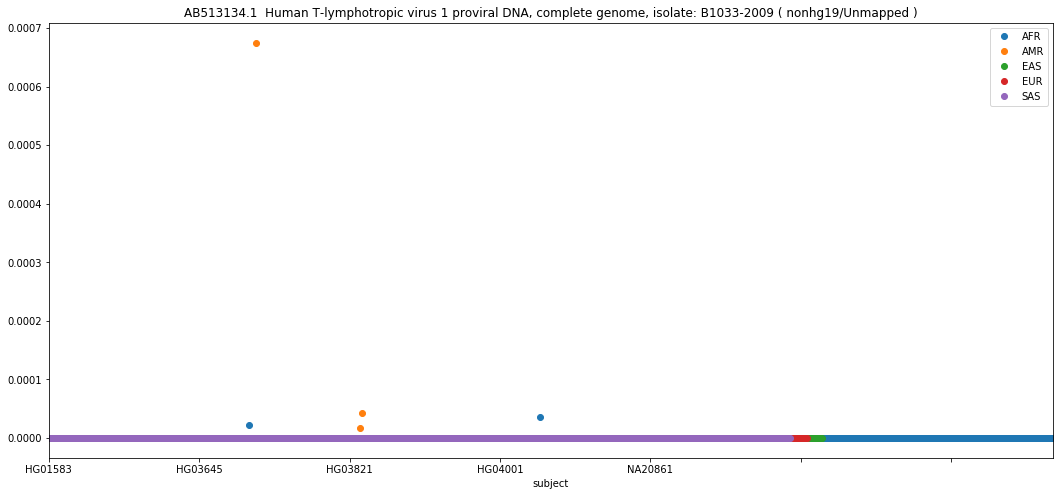

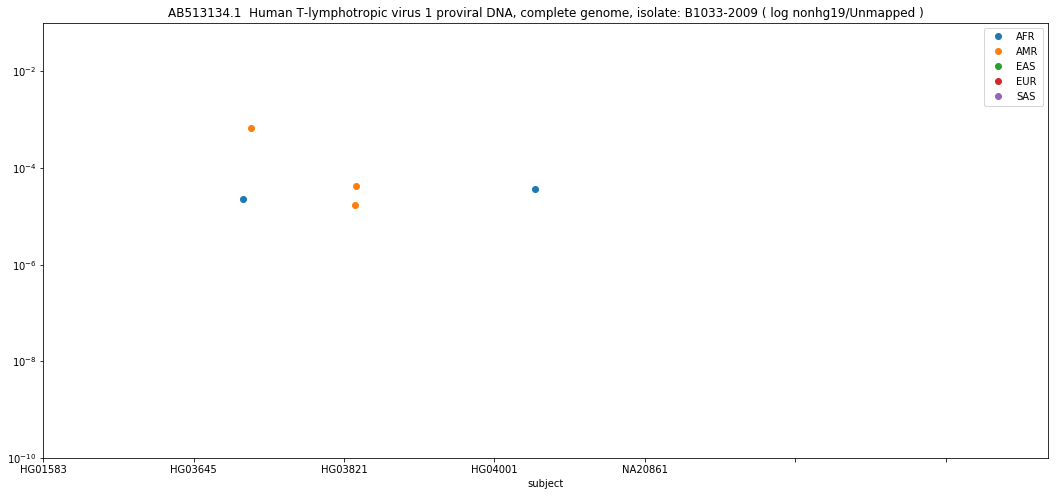

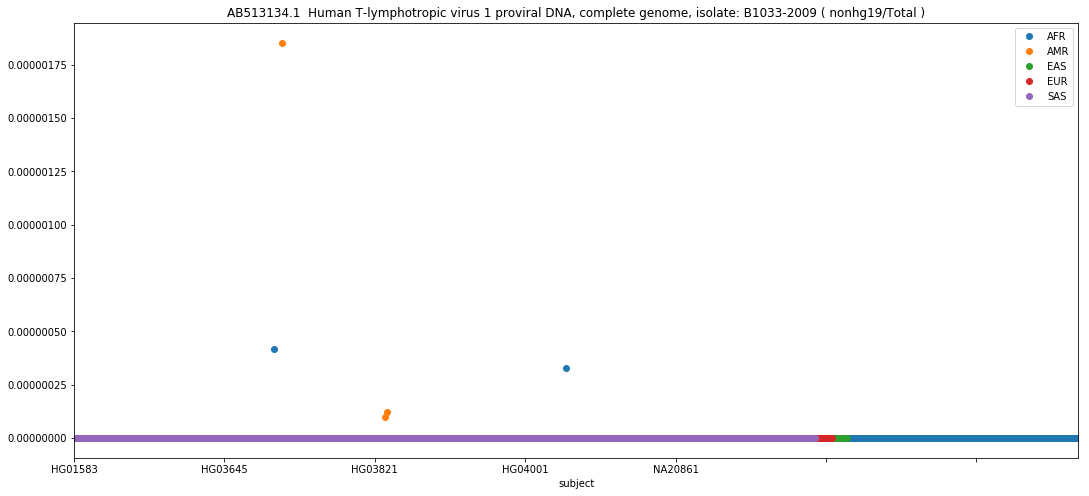

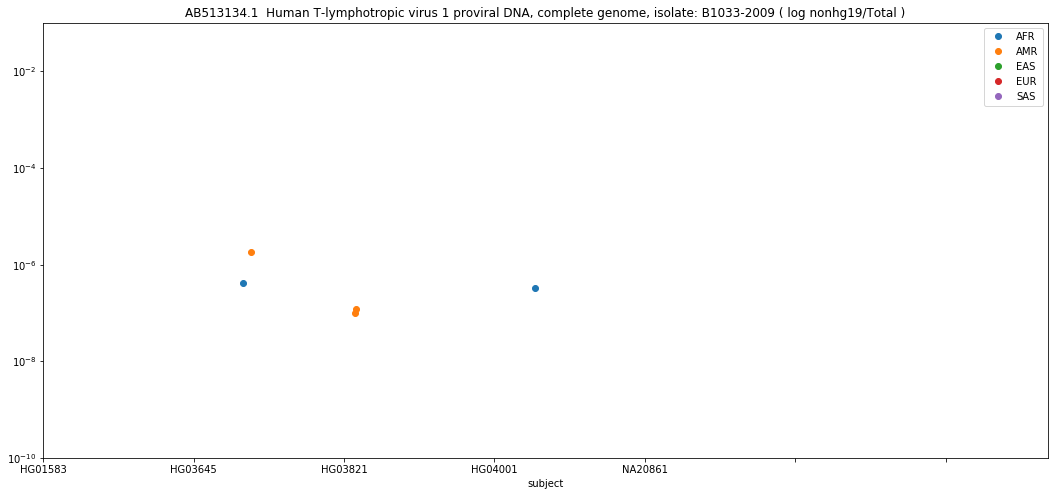

AB618031.1  Herpes simplex virus (type 1 /strain RH2) DNA, nearly complete genome


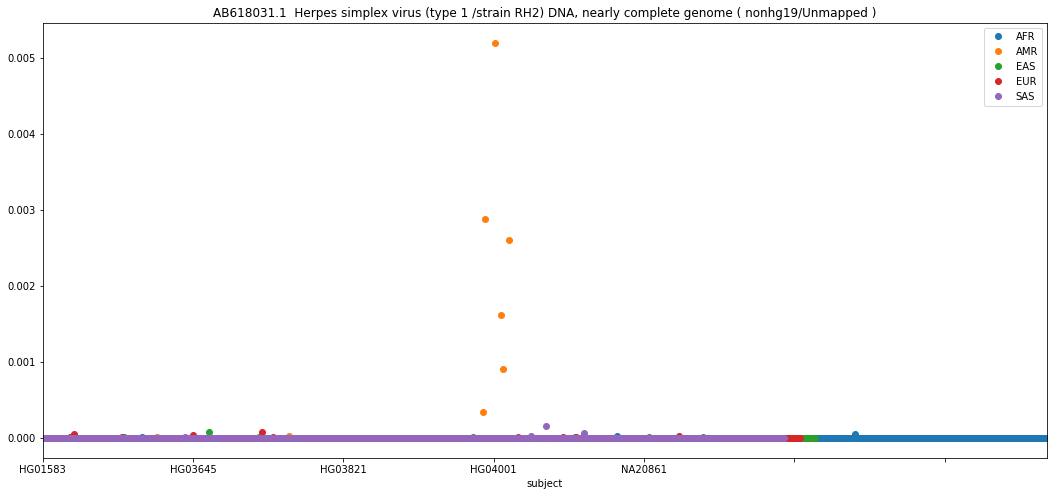

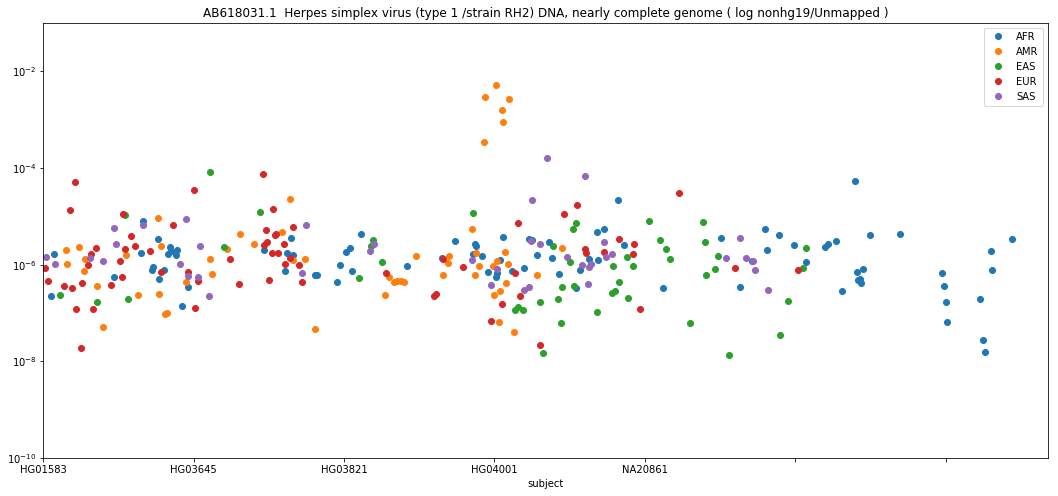

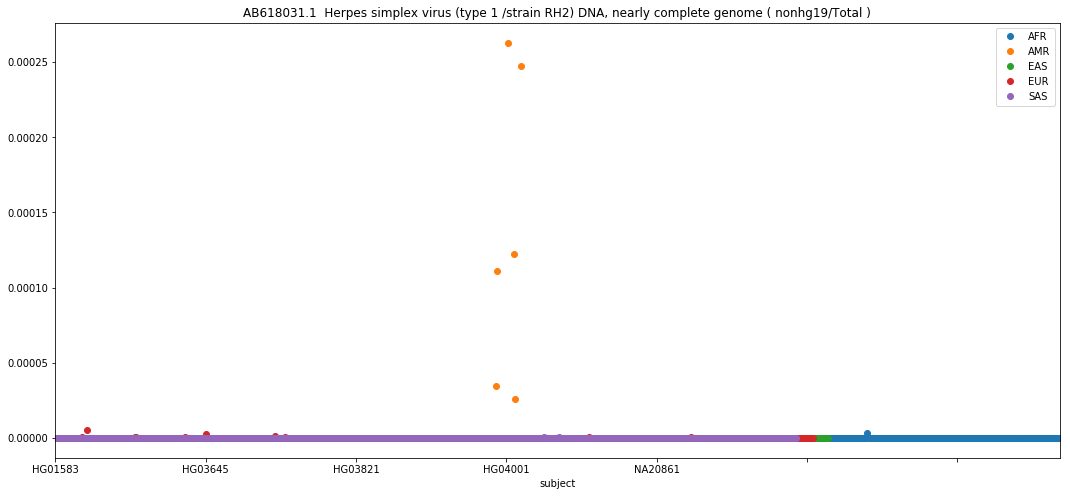

AF037218.1  Human herpesvirus 7 strain RK, complete genome


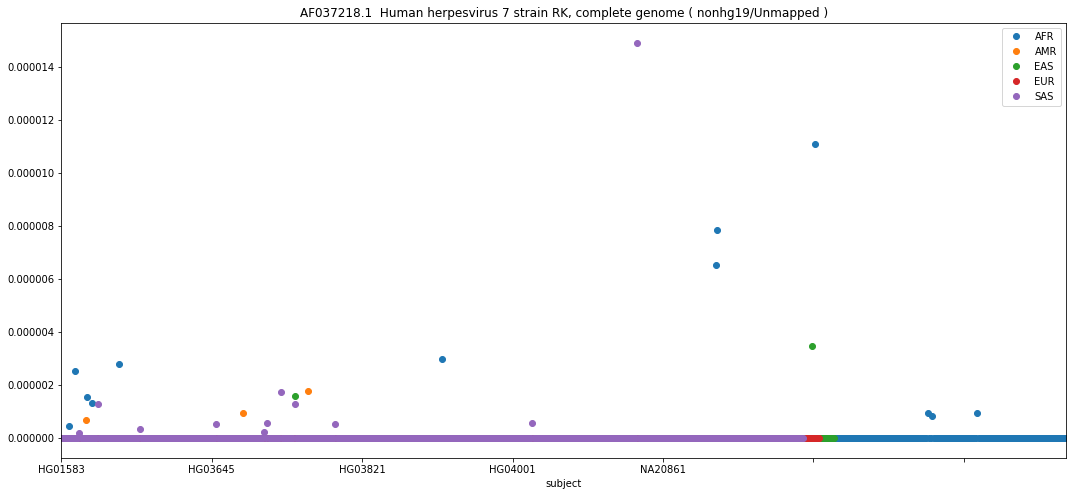

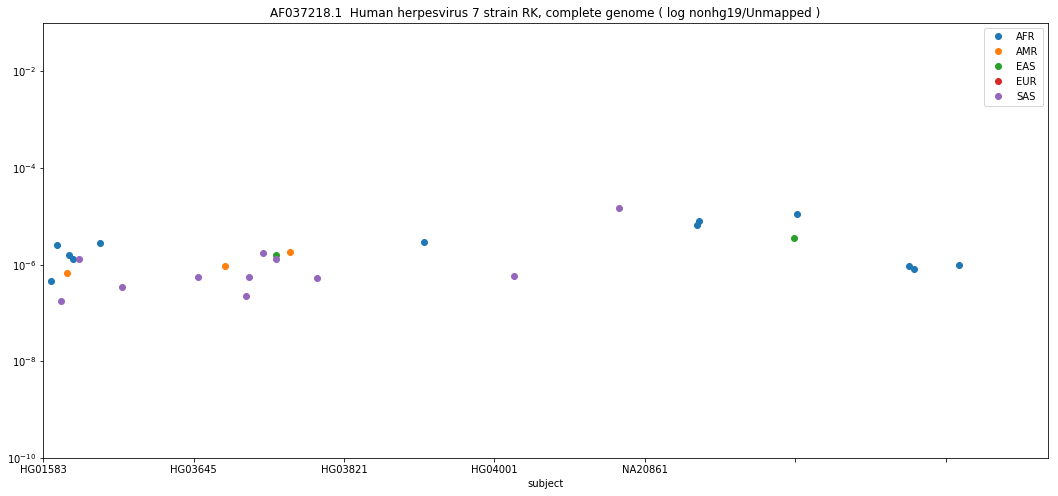

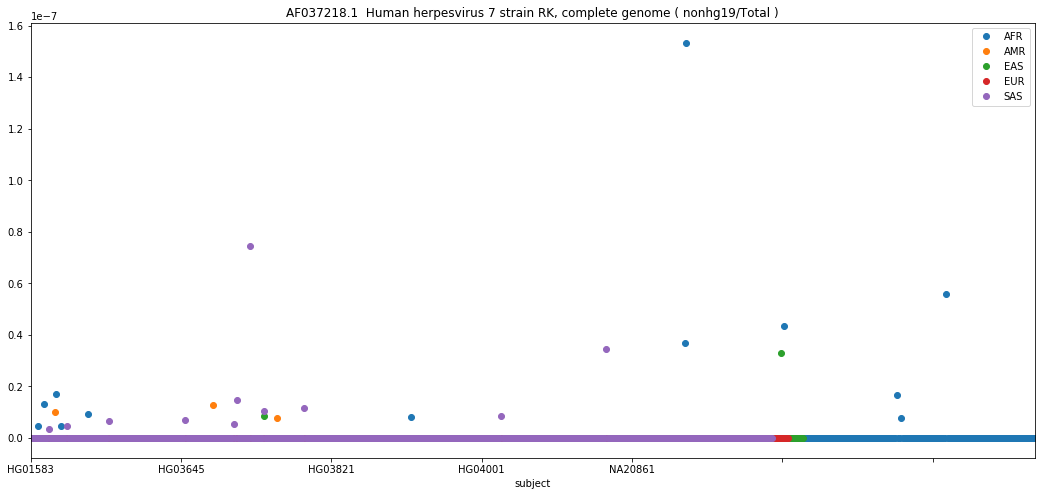

AF148805.2  Human herpesvirus 8 strain GK18, complete genome


/Users/jakewendt/Library/Python/3.6/lib/python/site-packages/matplotlib/ticker.py:2198: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


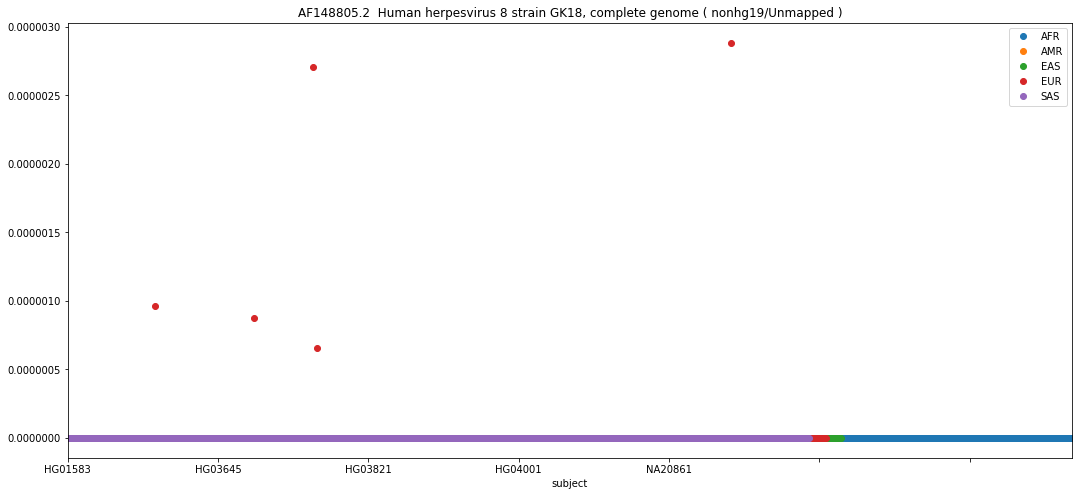

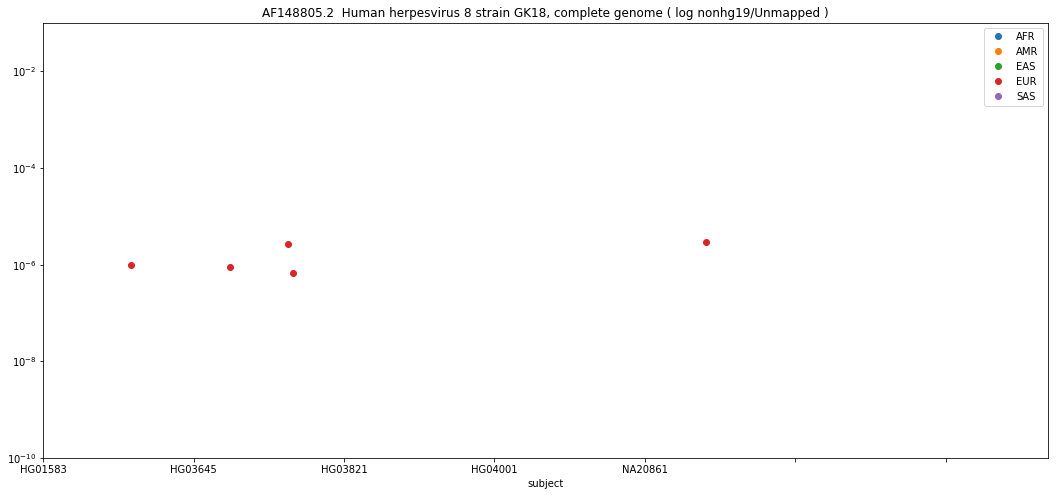

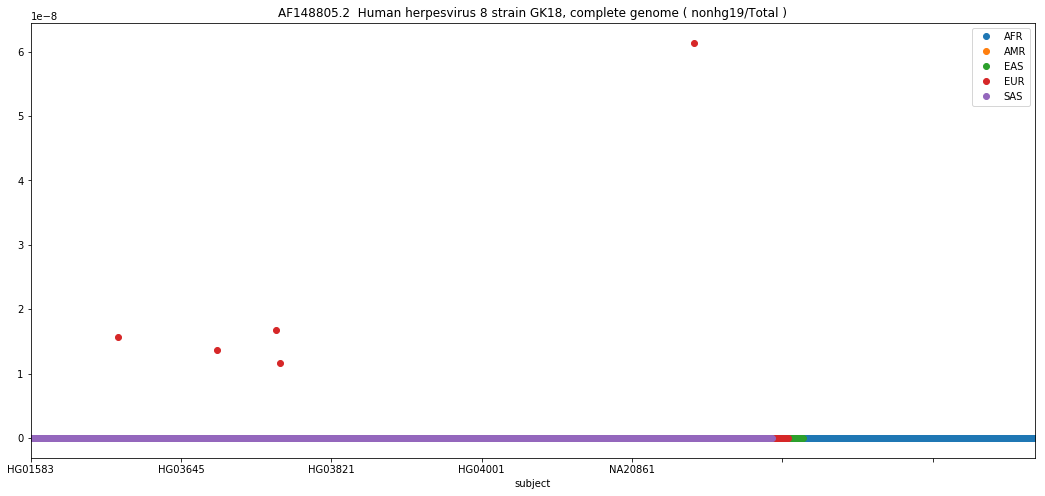

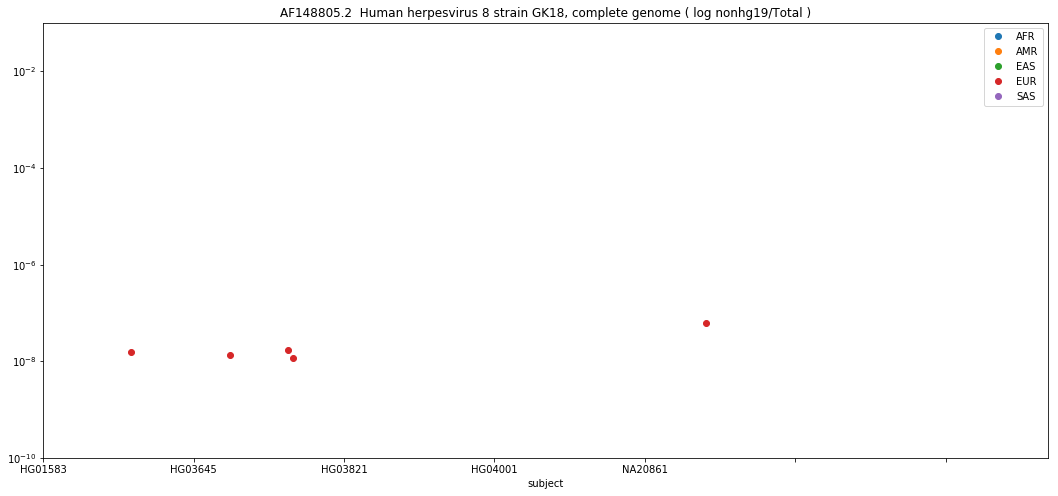

AP015015.1  Human herpesvirus 4 DNA, complete genome, strain: SNU-719


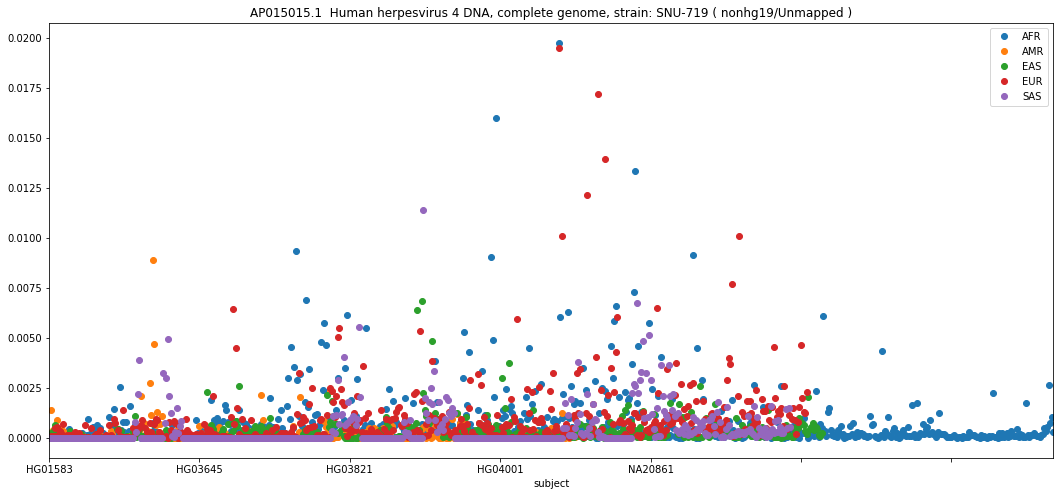

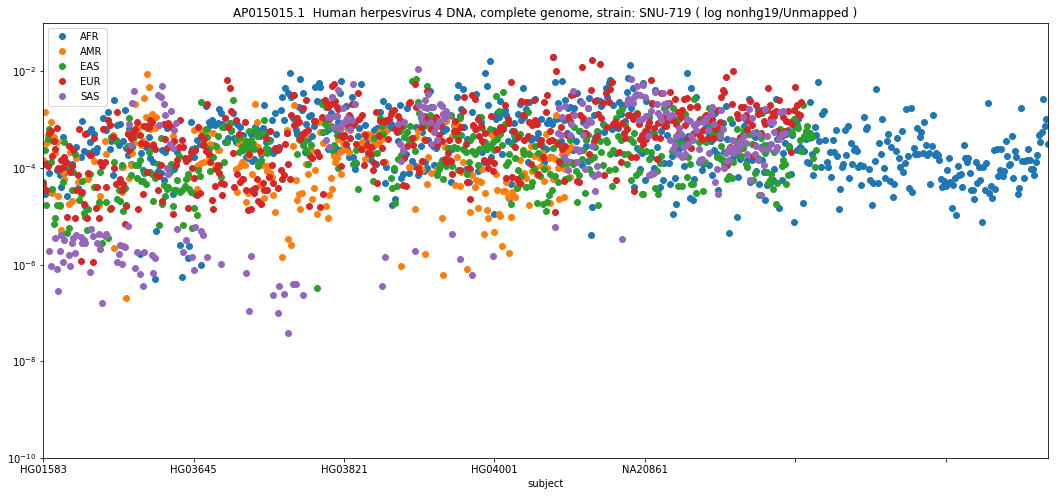

AP015016.1  Human herpesvirus 4 DNA, complete genome, strain: YCCEL1


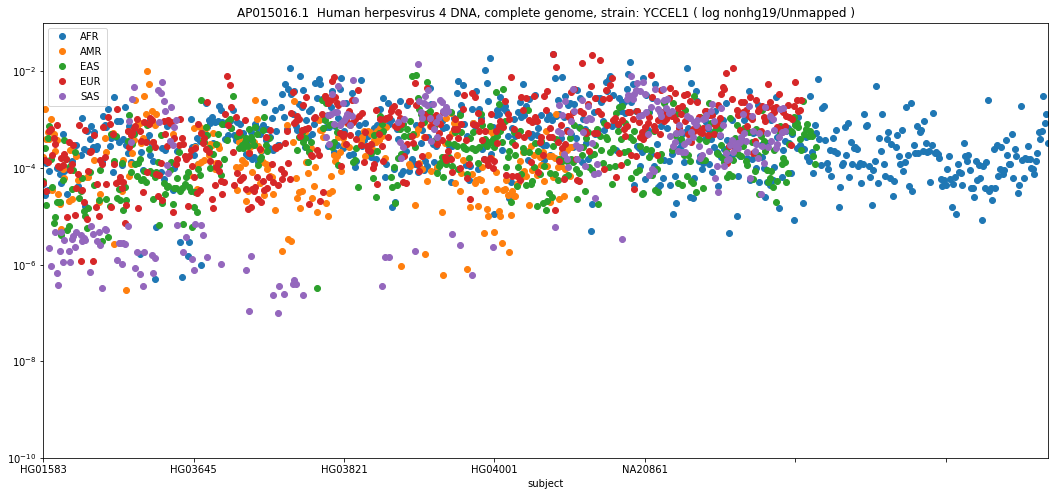

AP017458.1  Human herpesvirus 8 DNA, complete genome, strain: SPEL


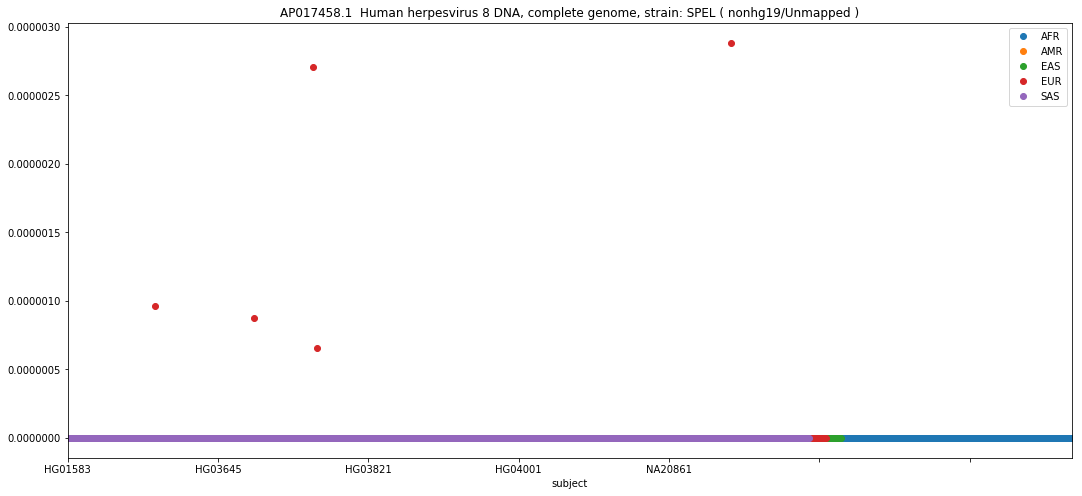

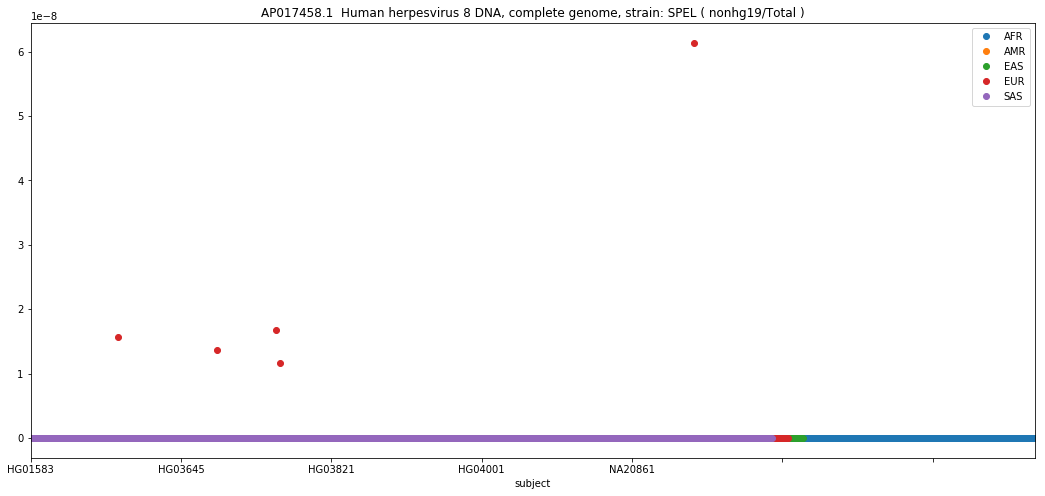

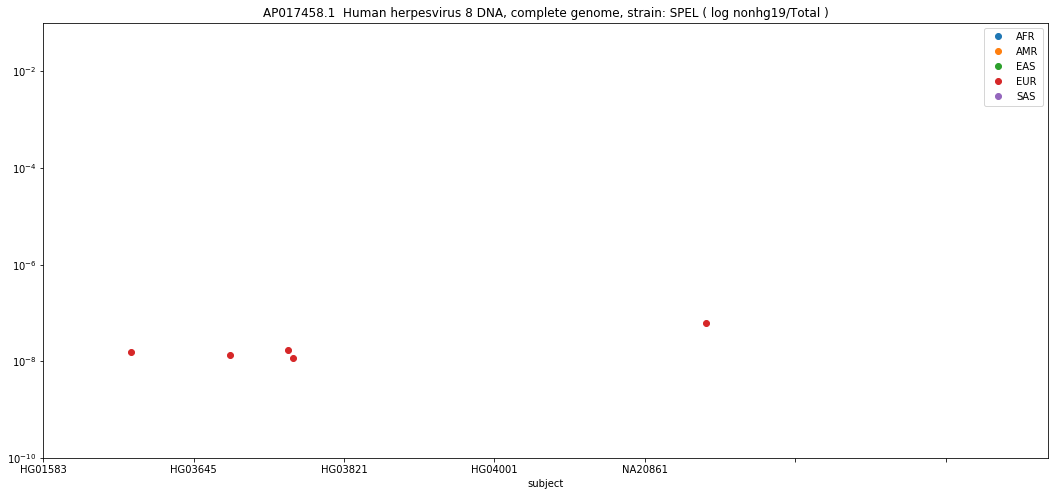

AY352275.1  HIV-1 isolate SF33 from USA, complete genome


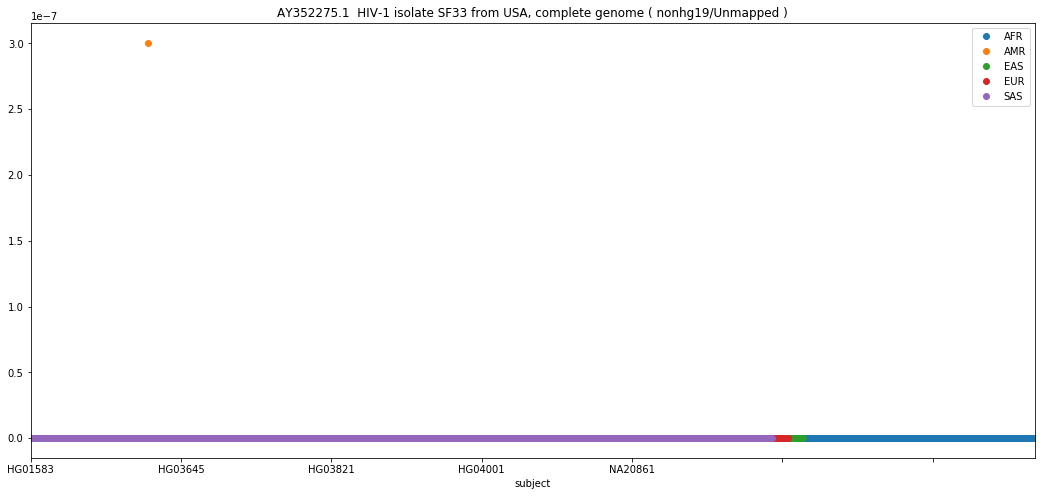

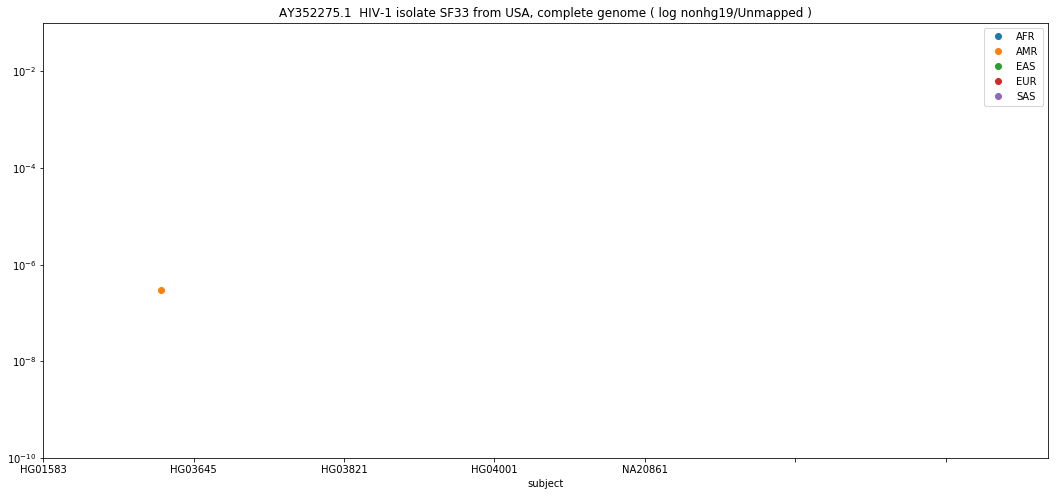

AY446894.2  Human herpesvirus 5 strain Merlin, complete genome


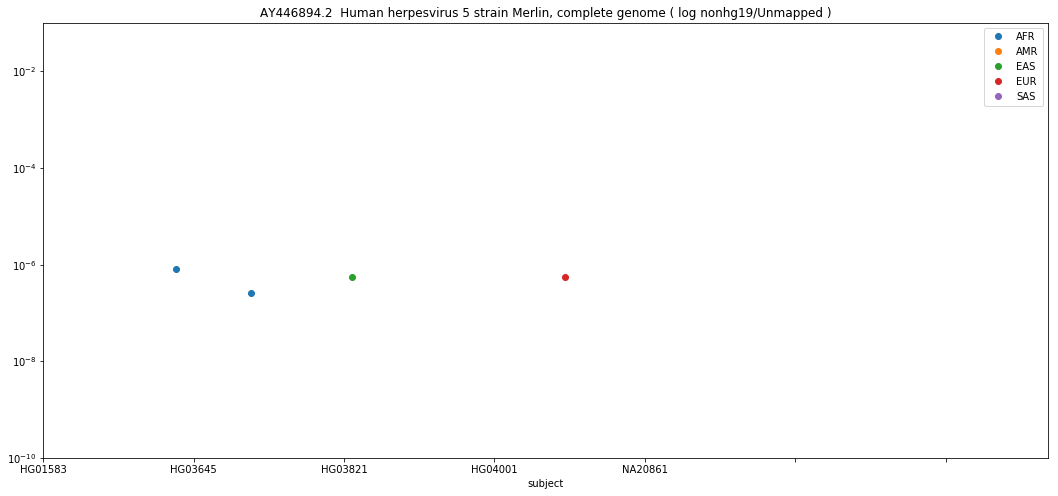

D13784.1  Human T-lymphotropic virus 1 proviral DNA, complete genome


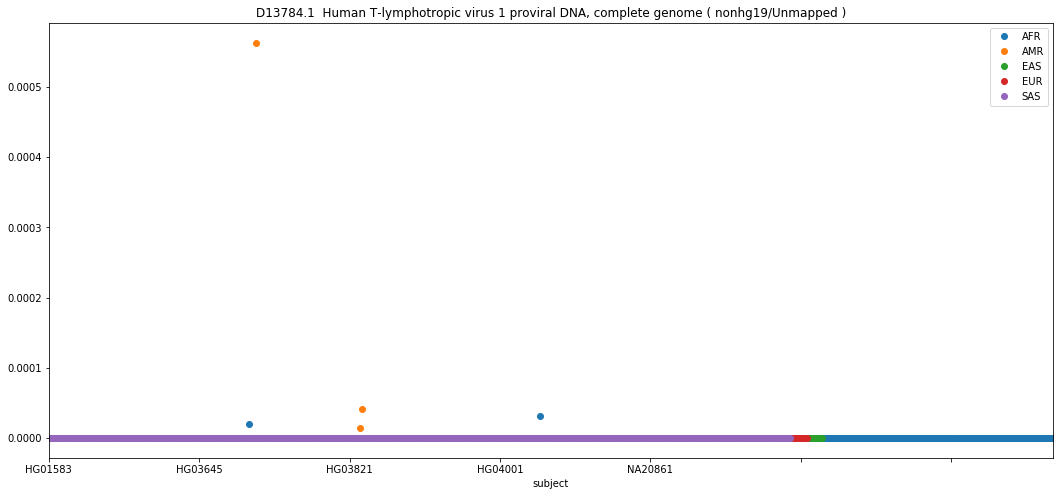

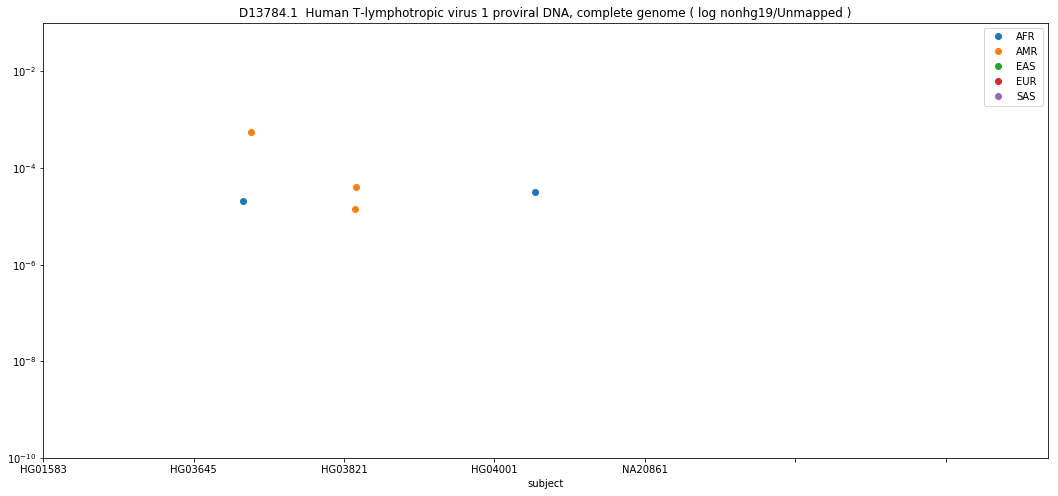

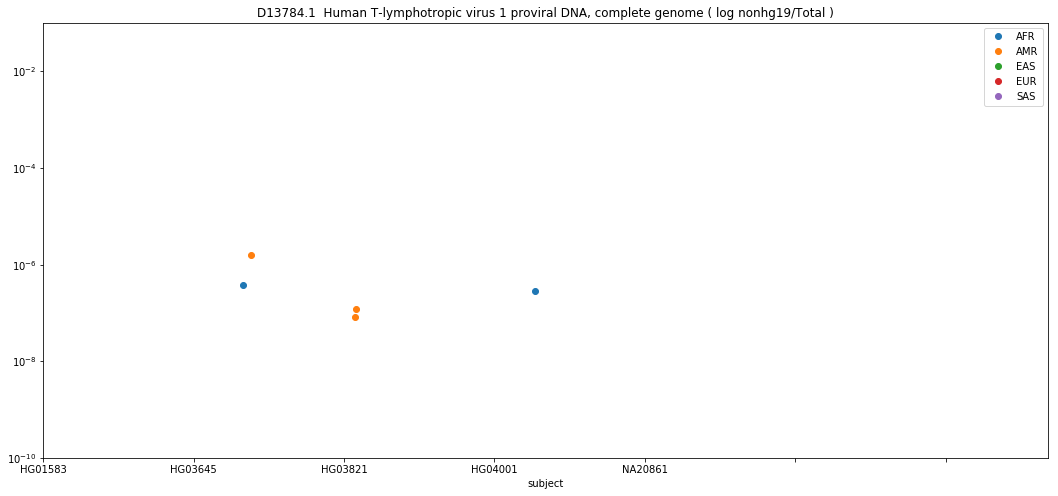

D26561.1  Human papillomavirus type 5b proviral genes for L1 protein, E6 protein, E7 protein, E1 protein, partial and complete cds


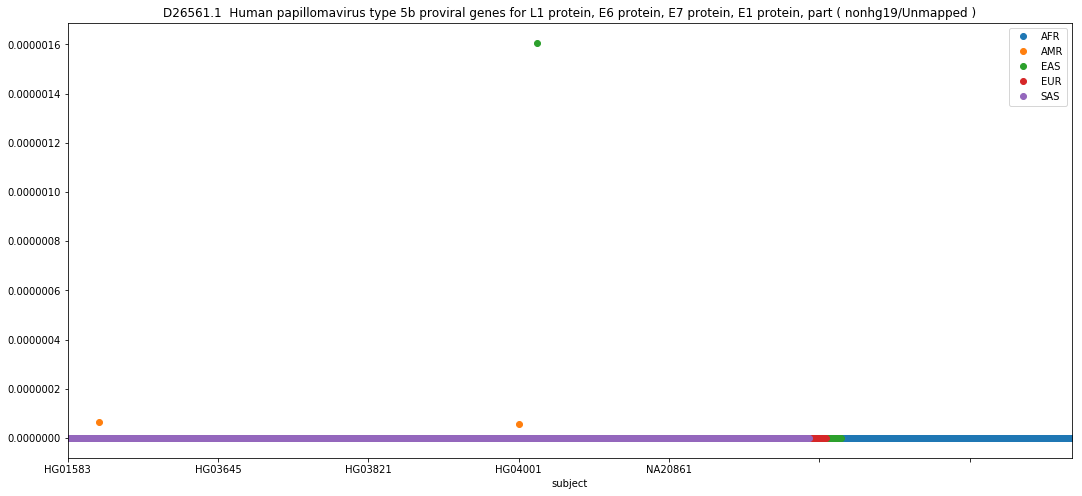

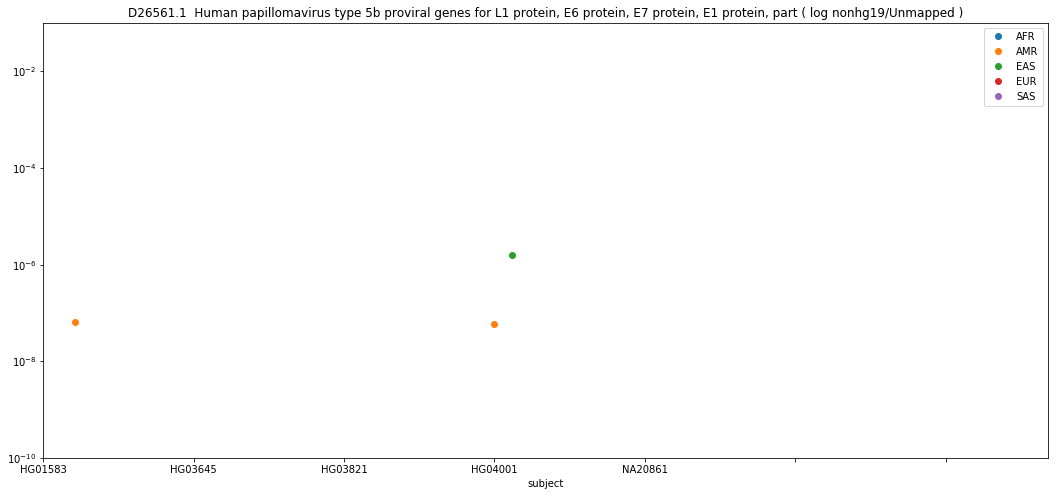

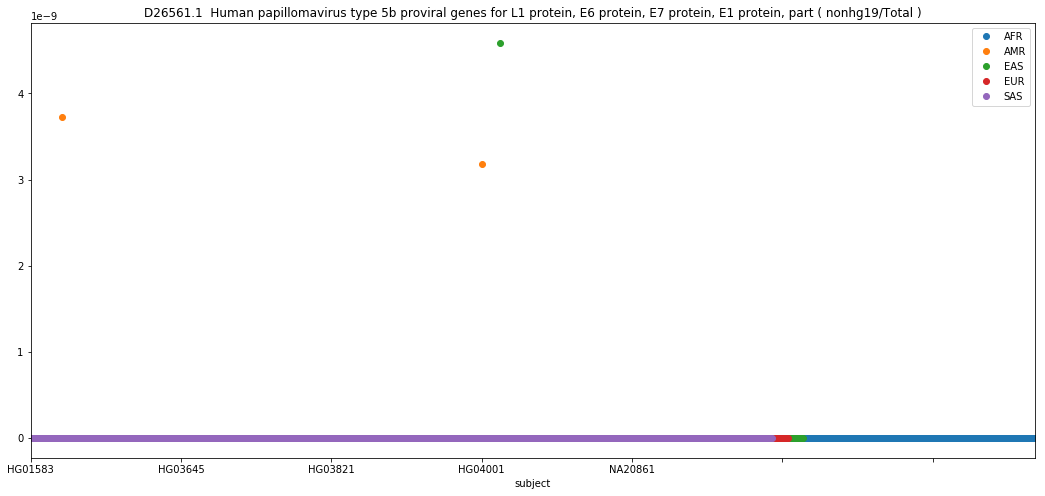

DQ093792.1  Human T-lymphotropic virus 3 strain 2026ND, complete genome


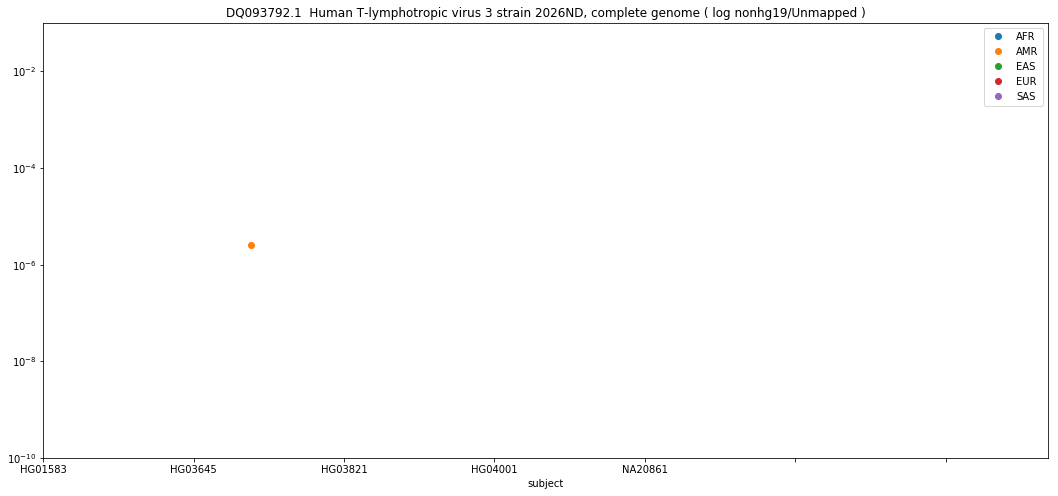

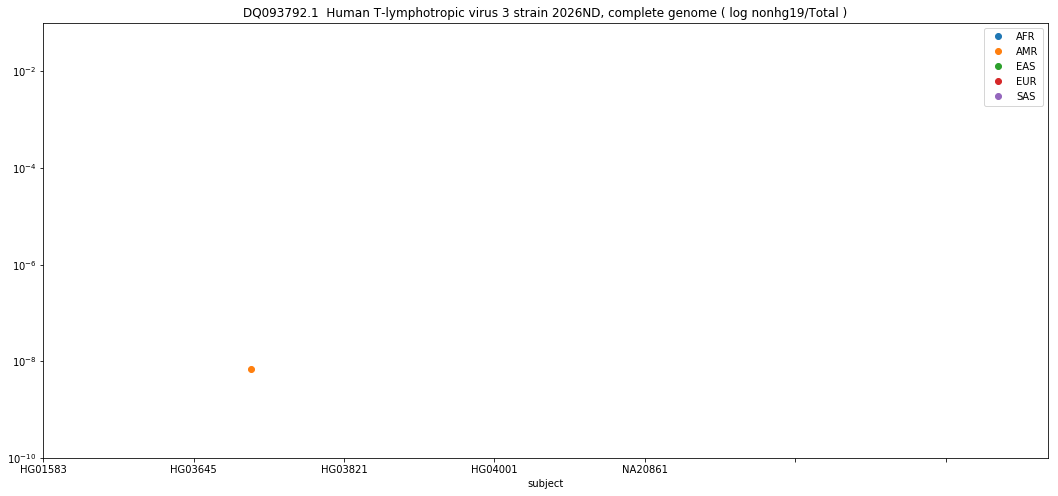

EF999921.1  Human herpesvirus 5 strain TB40/E clone TB40-BAC4, complete sequence


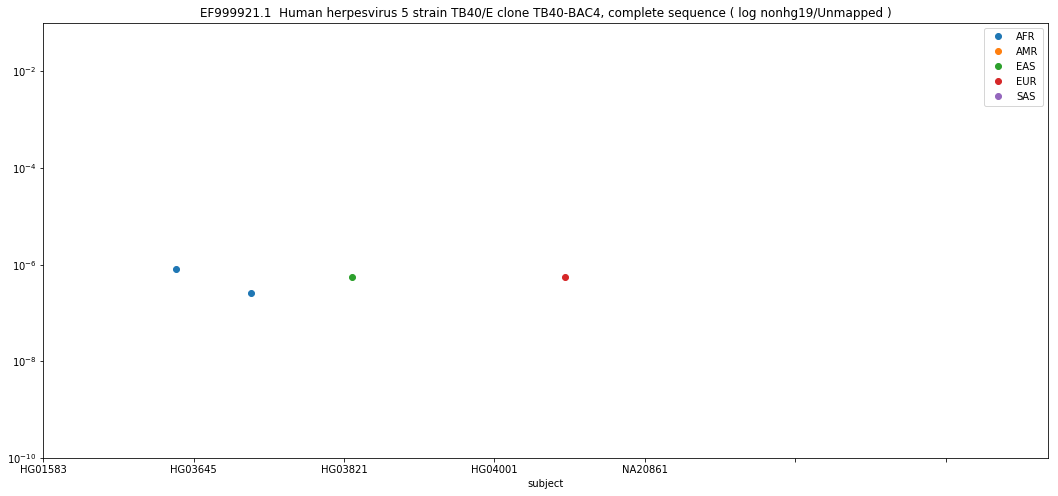

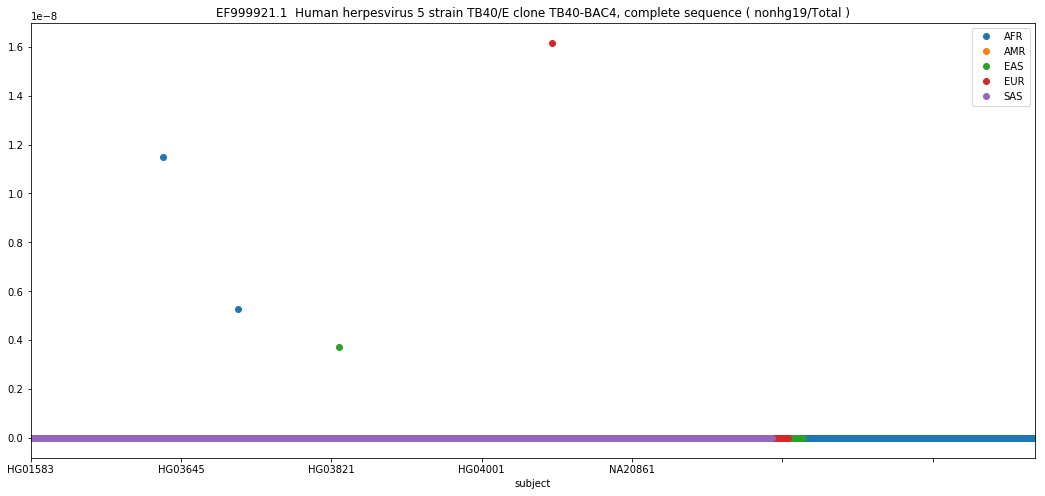

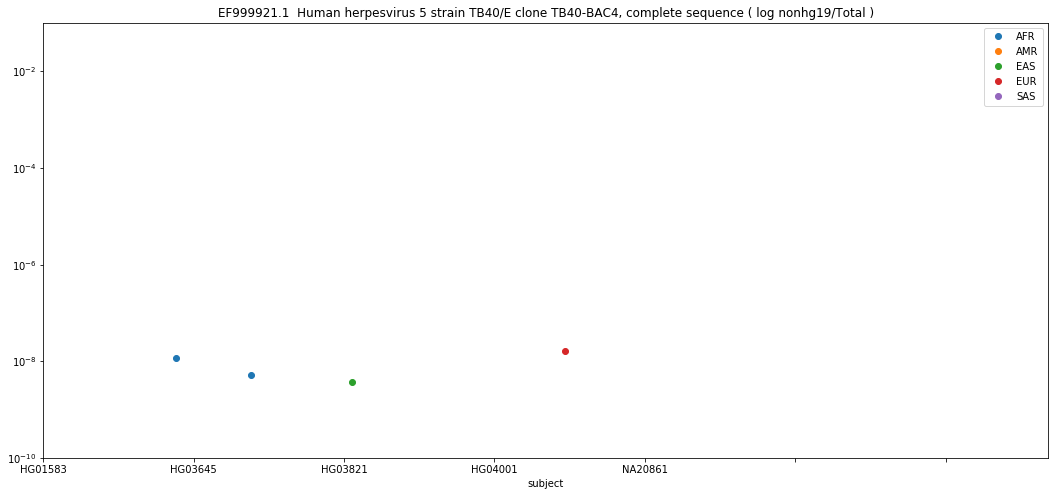

FJ527563.1  Human herpesvirus 5 strain AD169, complete genome


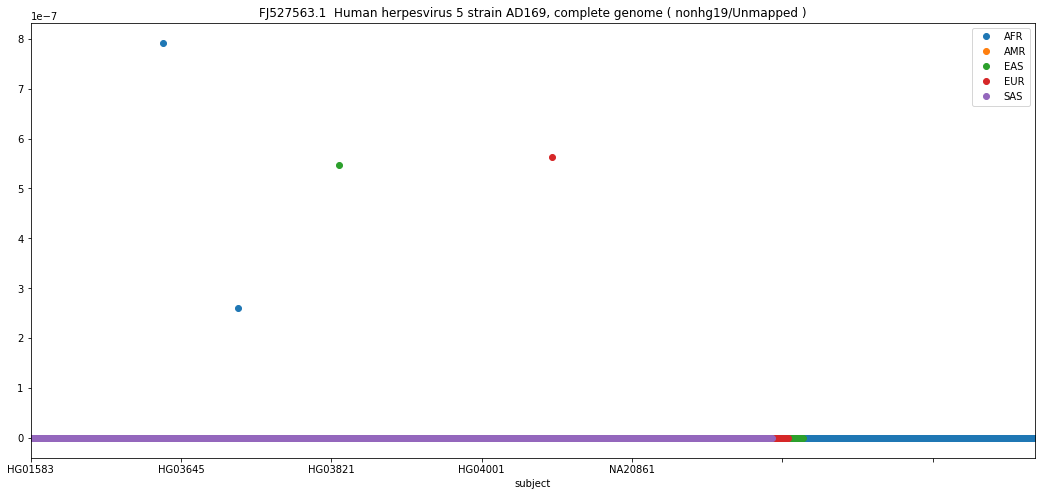

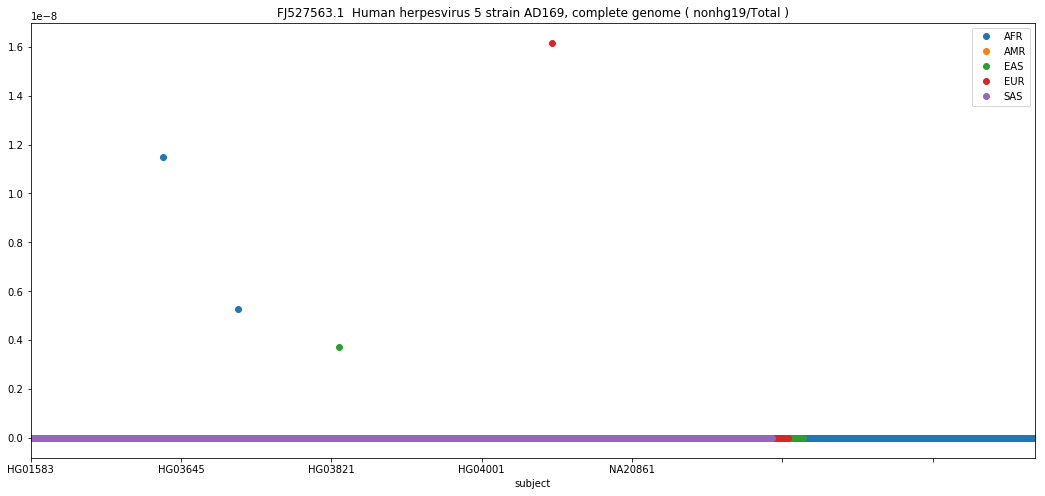

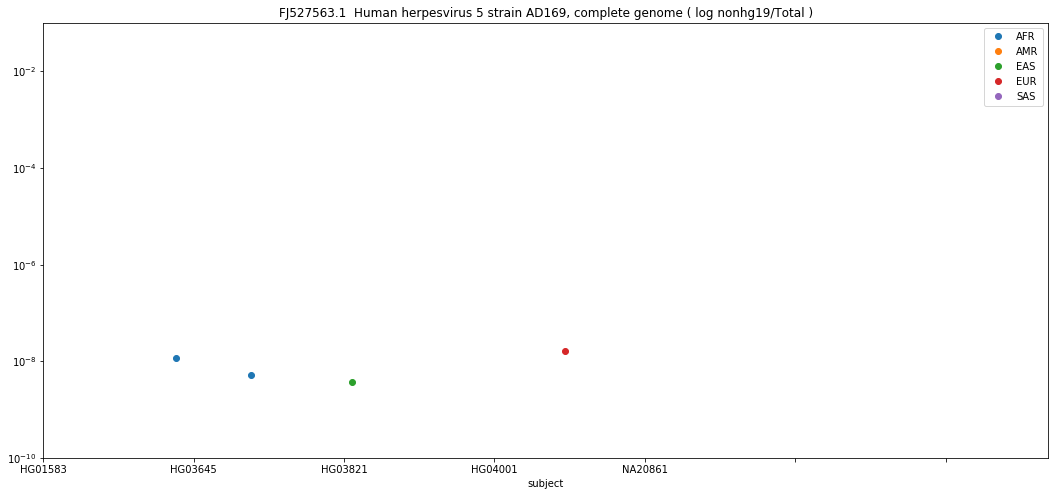

GQ221974.1  Human herpesvirus 5 strain 3157, complete genome


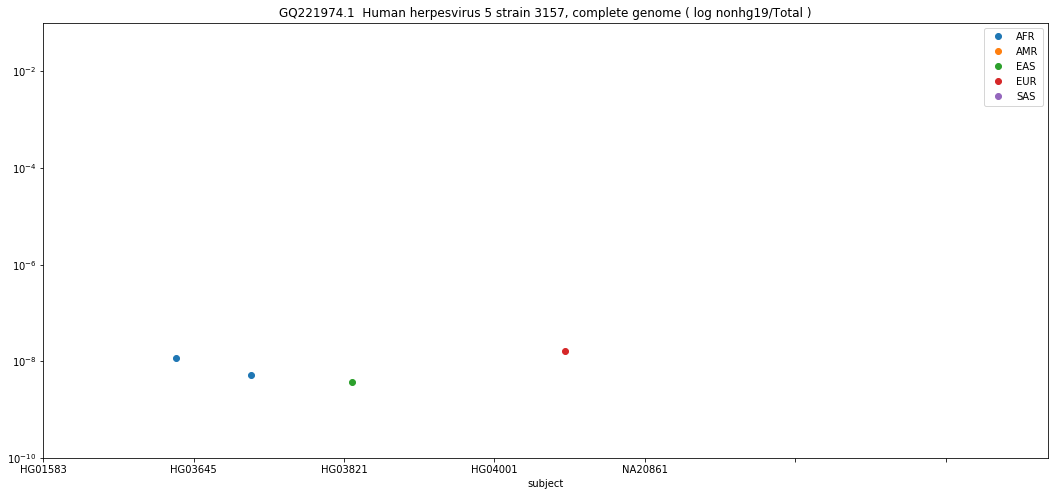

GQ396662.1  Human herpesvirus 5 strain HAN38, complete genome


GQ994935.1  Human herpesvirus 8 strain JSC-1 clone BAC16, complete genome


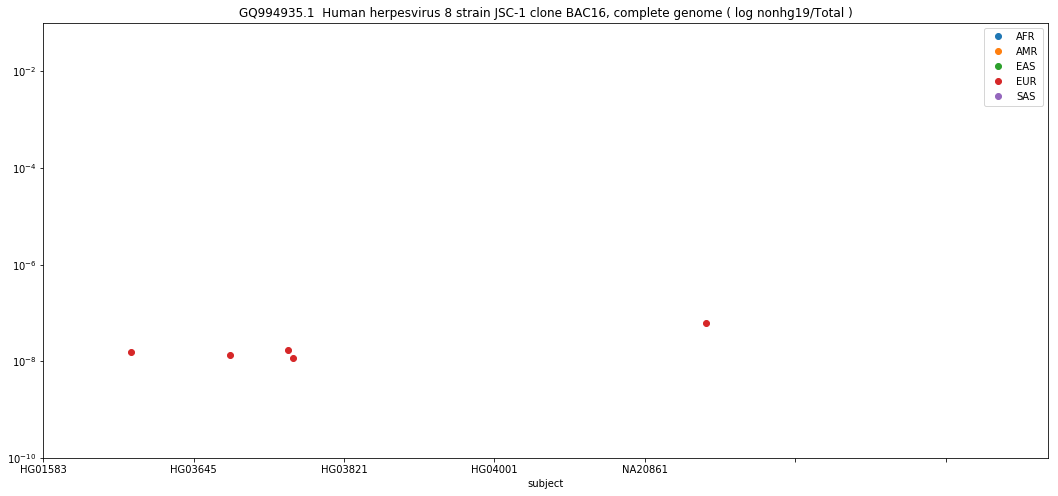

GU937742.2  Human herpesvirus 5 strain Toledo, complete genome


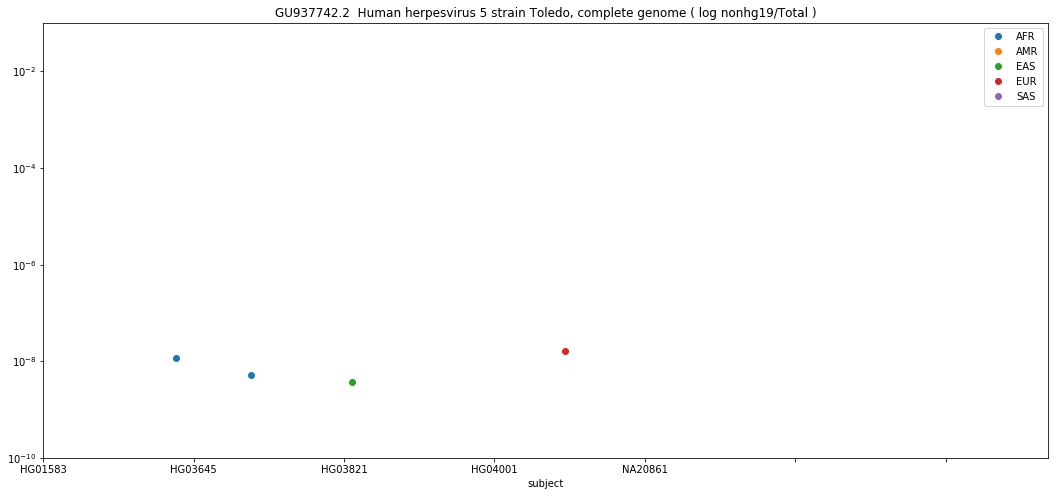

HQ646552.1  Hepatitis B virus clone 18.15, complete genome


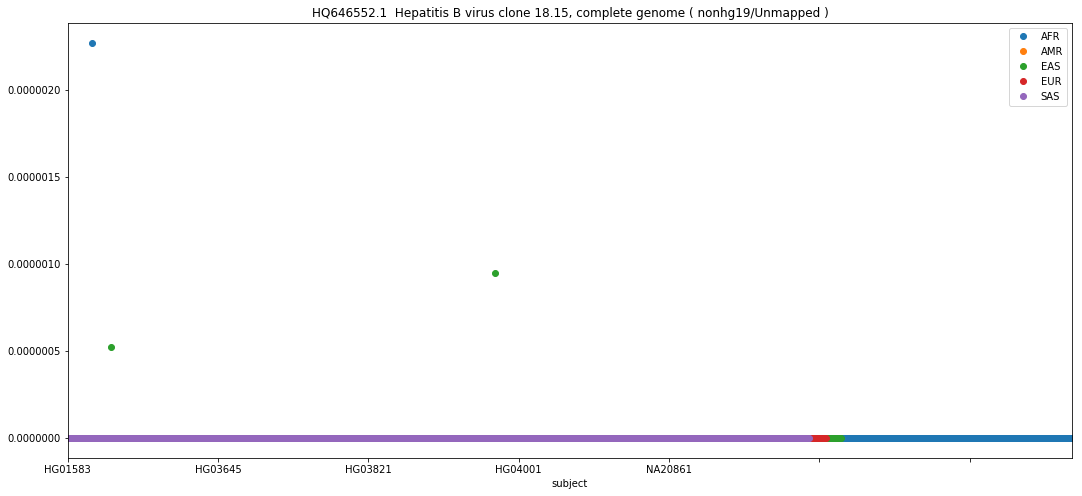

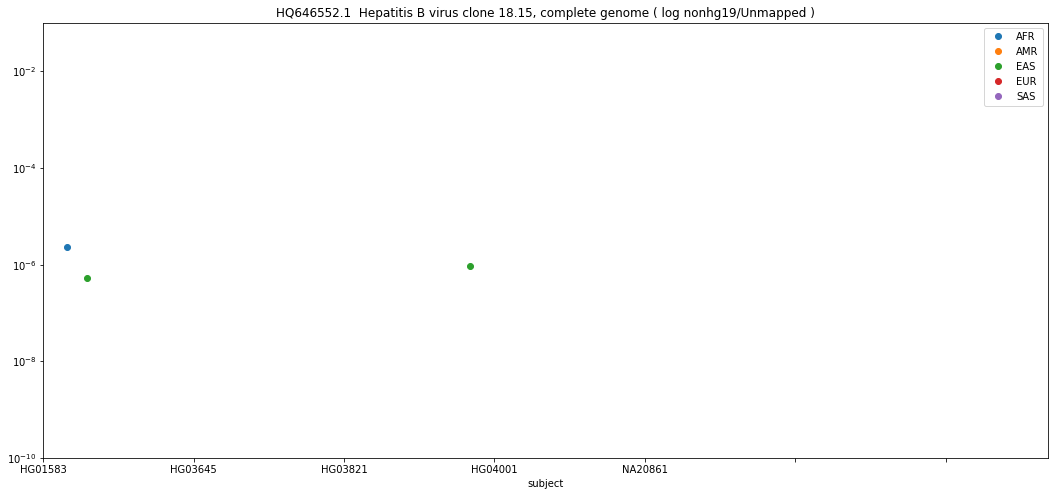

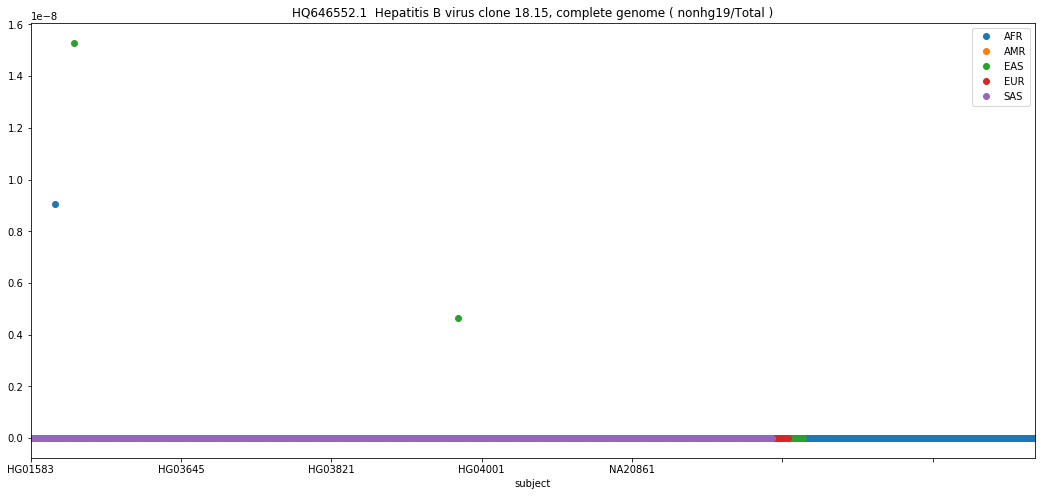

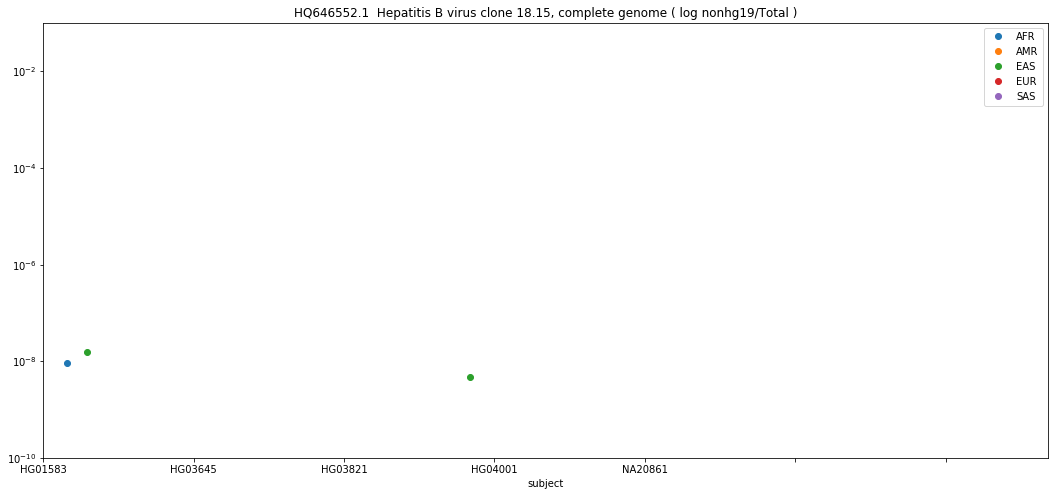

HQ646553.1  Hepatitis B virus clone 18.1, complete genome


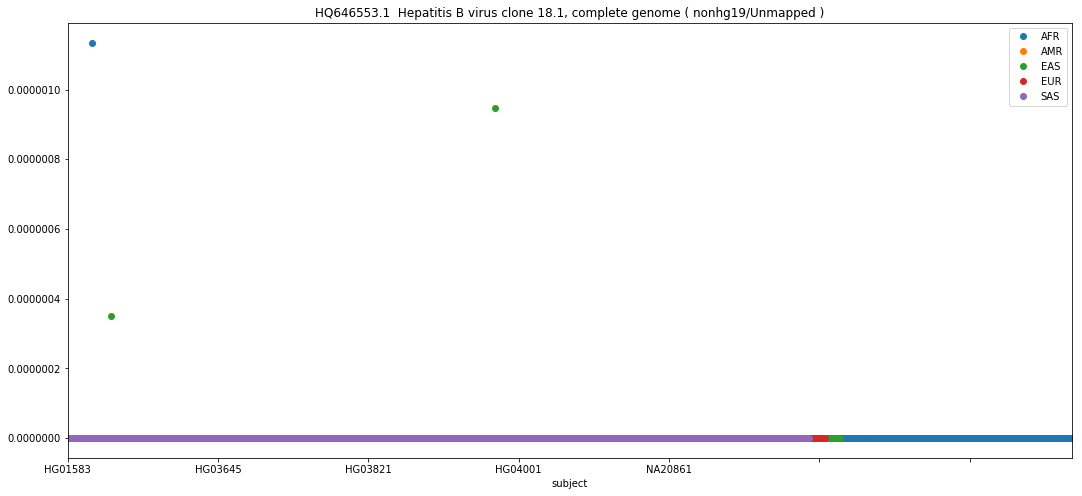

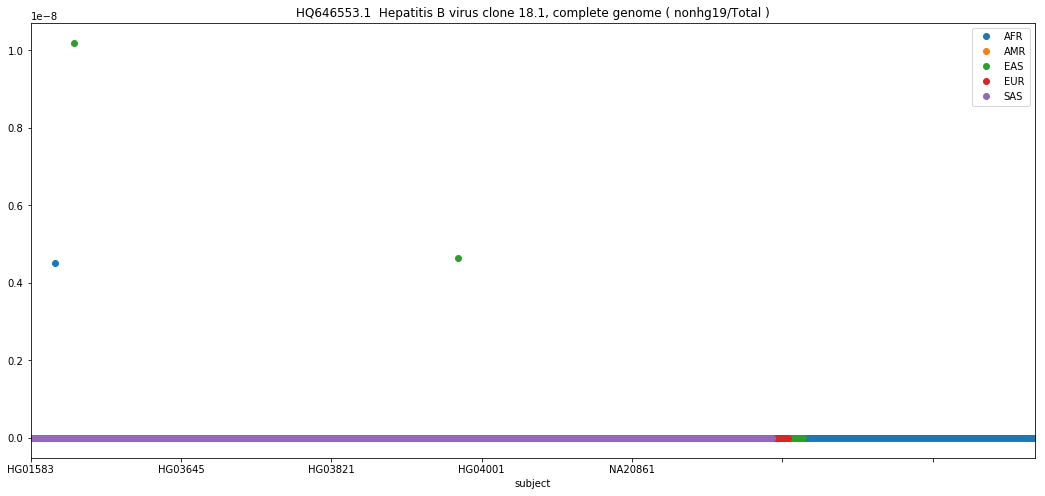

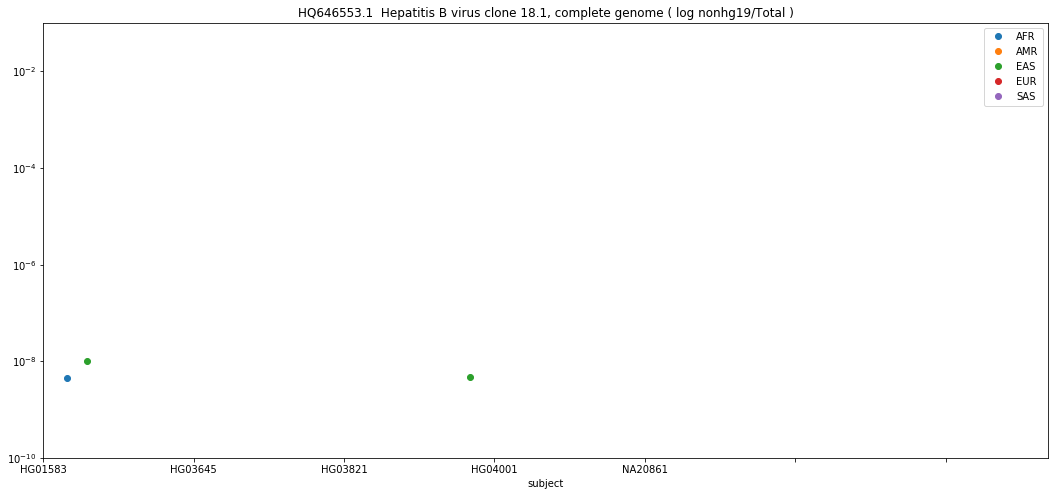

HQ646554.1  Hepatitis B virus clone 18.20, complete genome


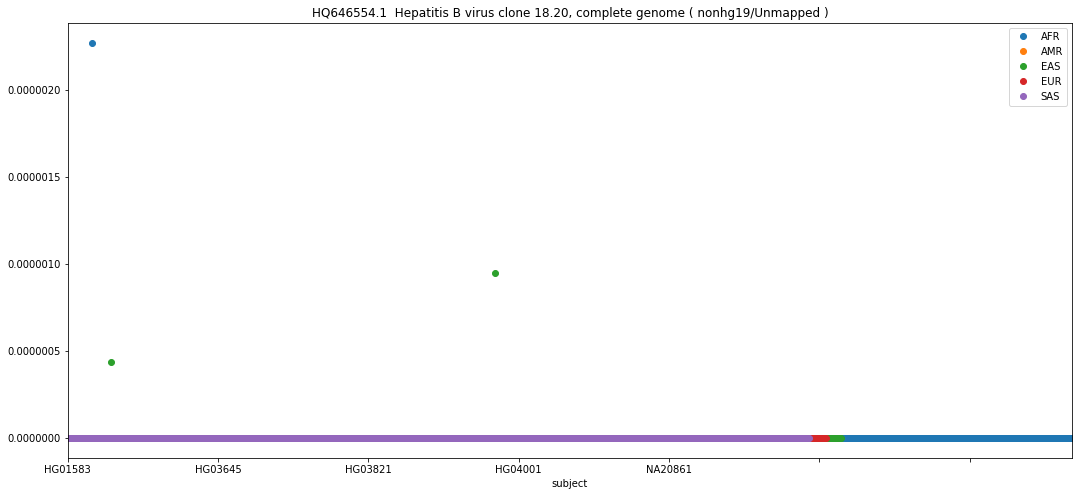

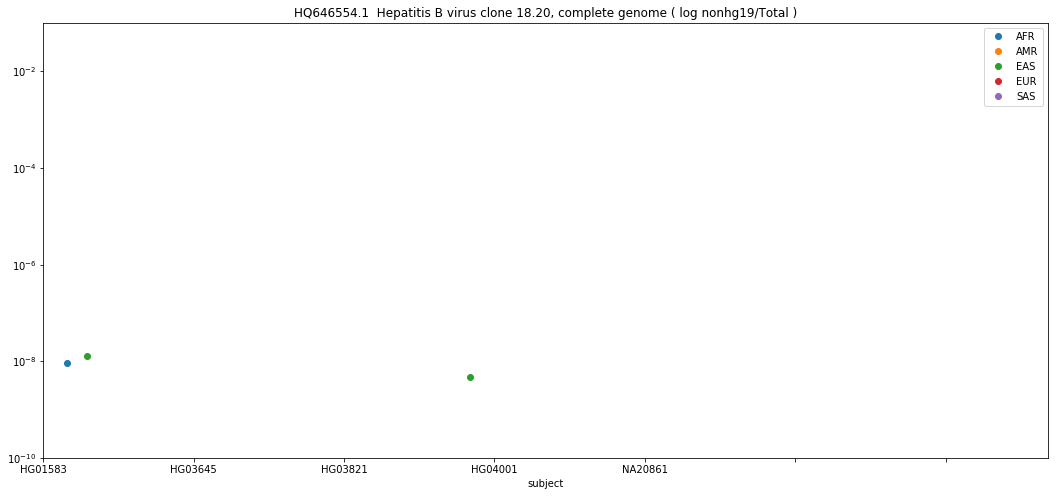

HQ646555.1  Hepatitis B virus clone 18.31, complete genome


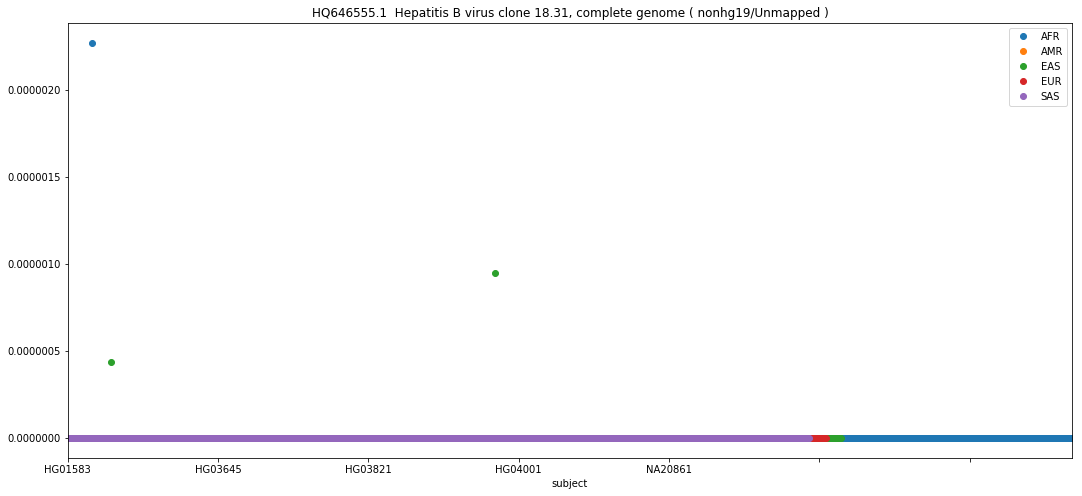

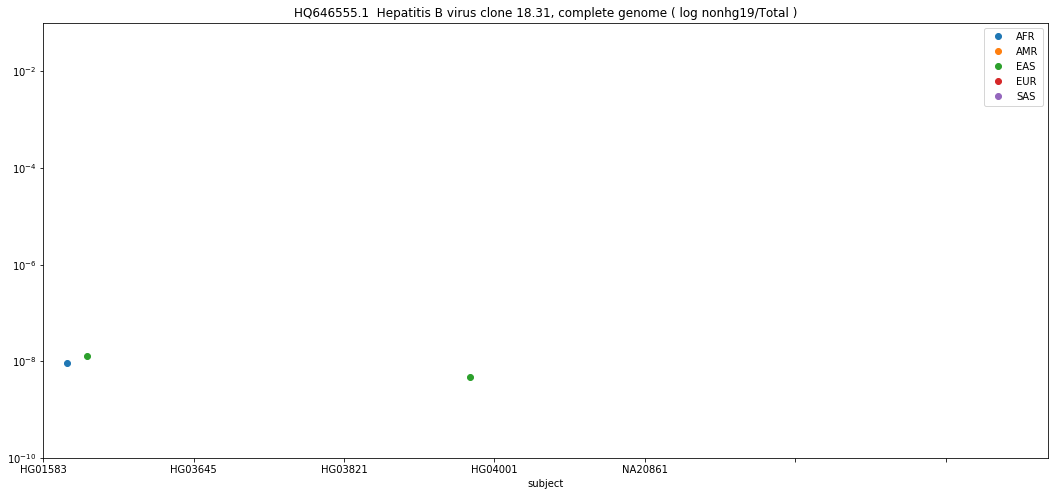

HQ646556.1  Hepatitis B virus clone 18.12, complete genome


JQ619843.1  Human herpesvirus 8 strain DG1, complete genome


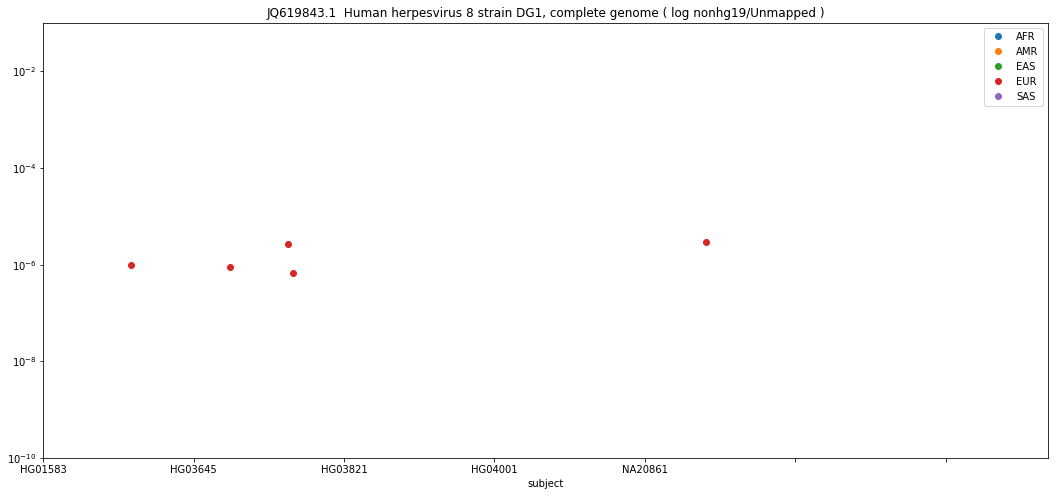

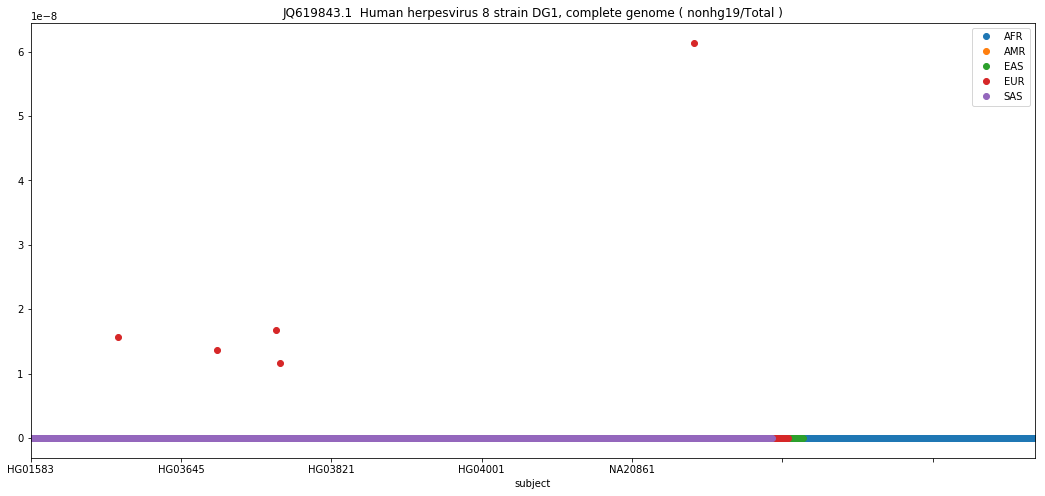

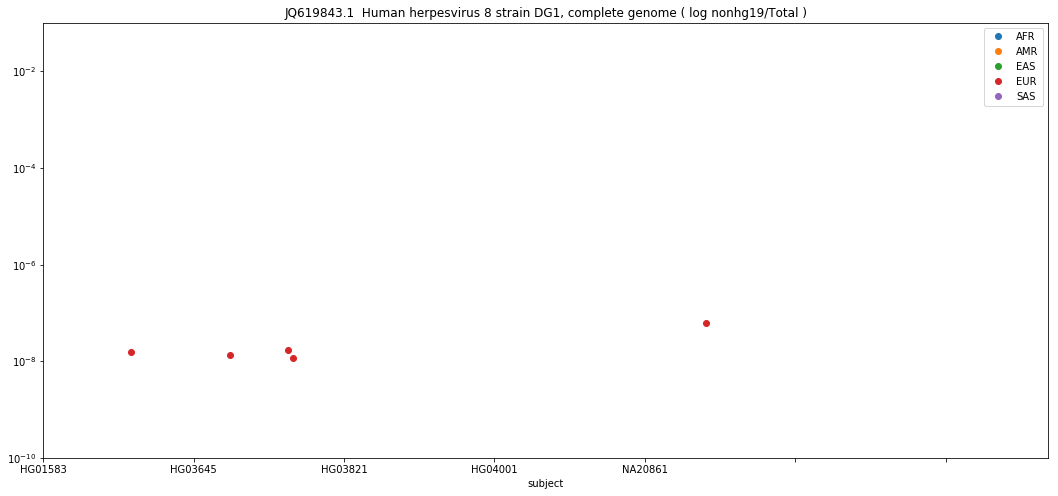

K02007.1  Human immunodeficiency virus type 1, isolate ARV-2/SF2, complete proviral genome


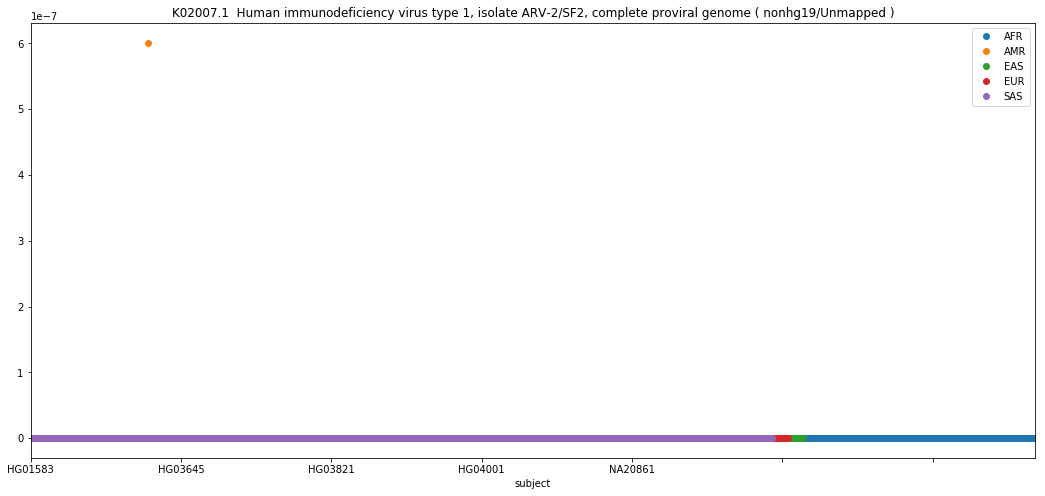

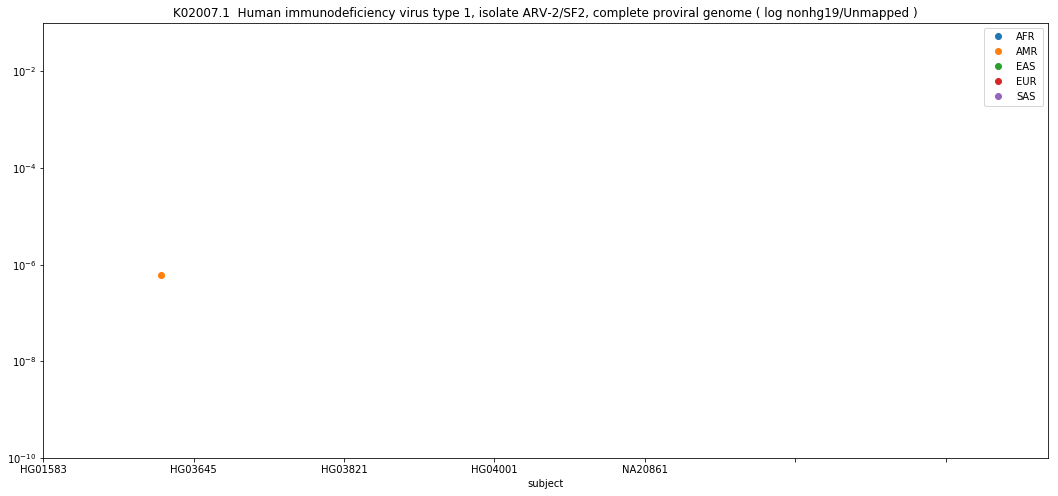

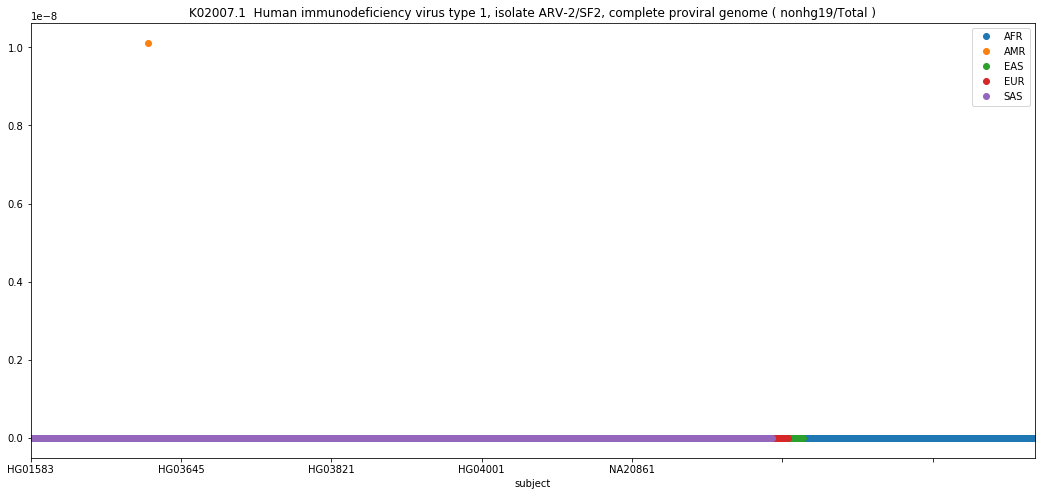

K03455.1  Human immunodeficiency virus type 1 (HXB2), complete genome; HIV1/HTLV-III/LAV reference genome


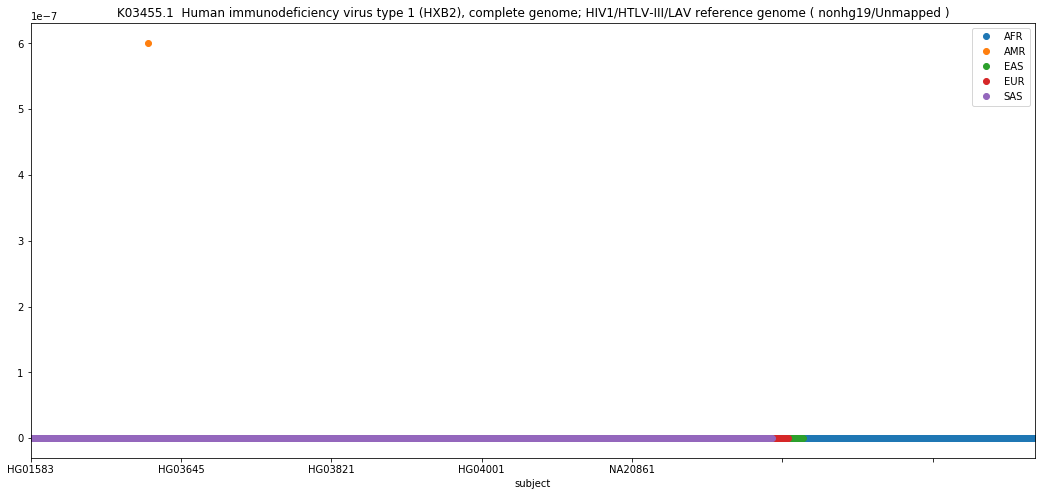

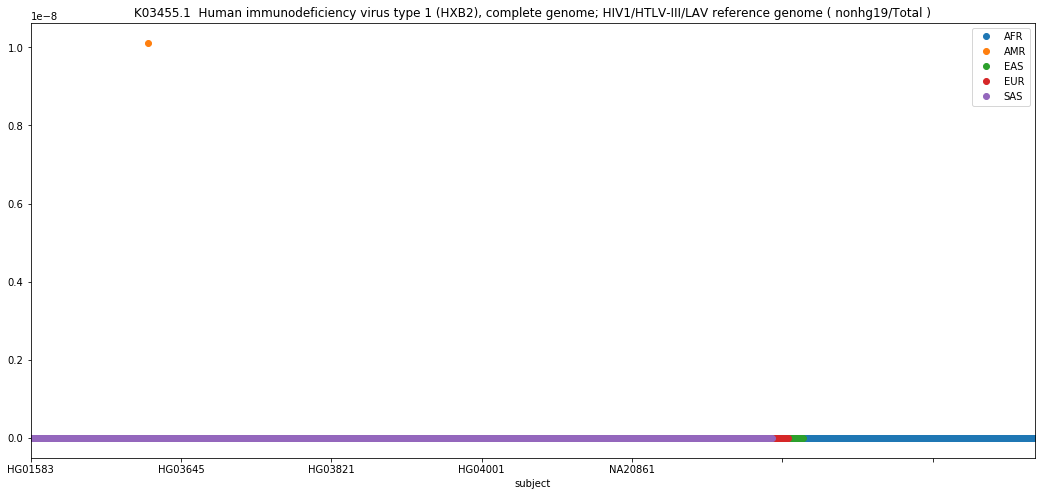

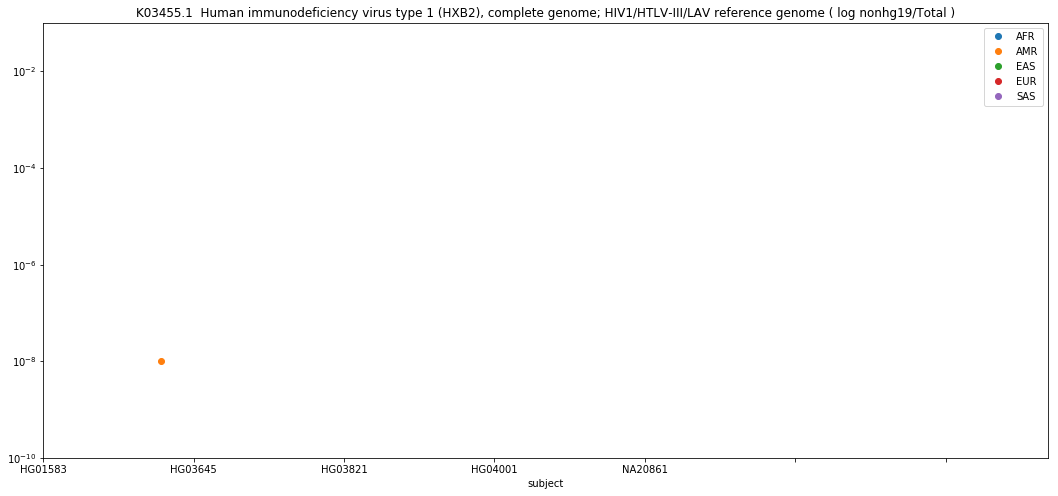

KF021605.1  Human herpesvirus 5 strain TR, complete genome


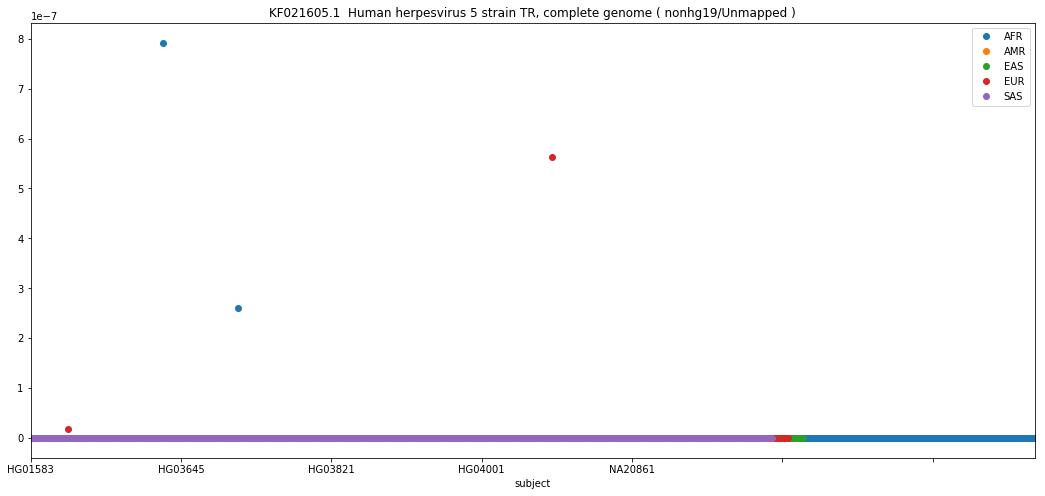

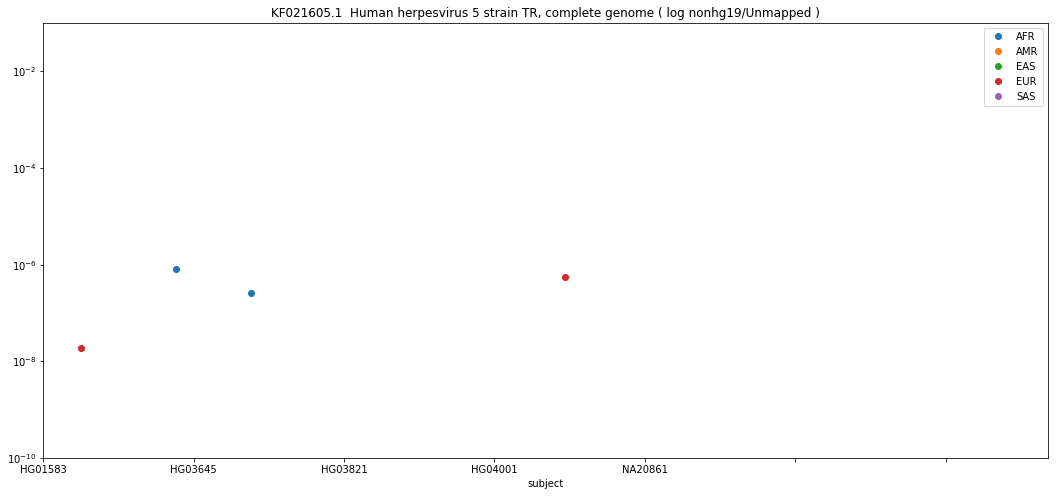

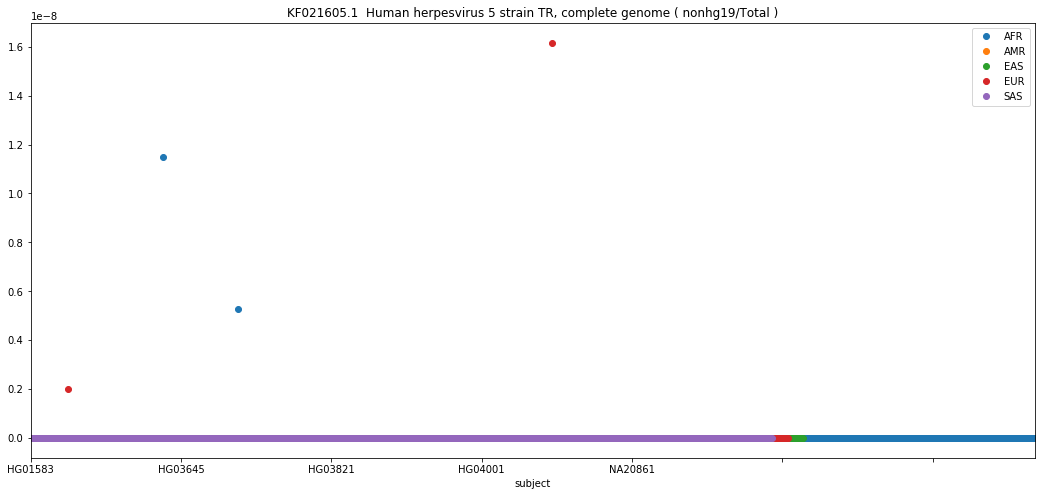

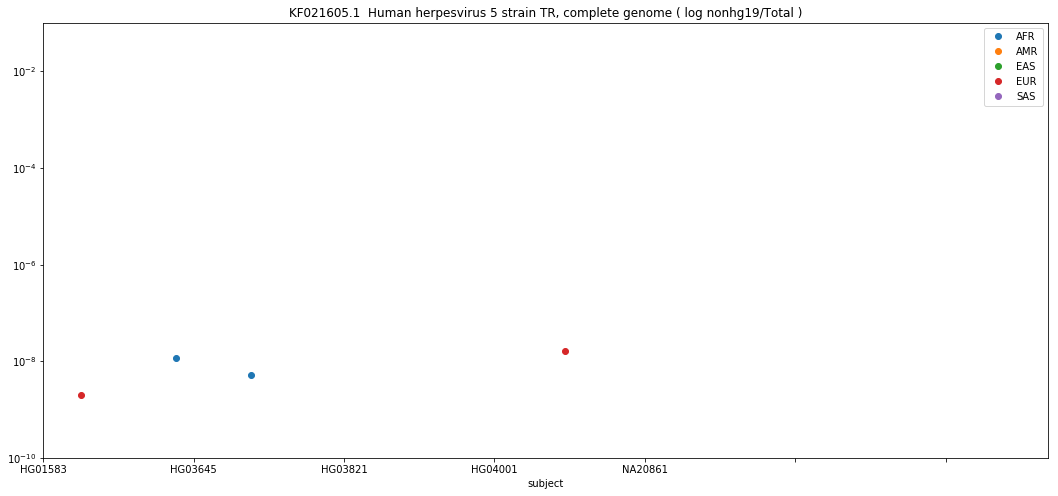

KF297339.1  Human herpesvirus 5 strain TB40/E clone Lisa, complete genome


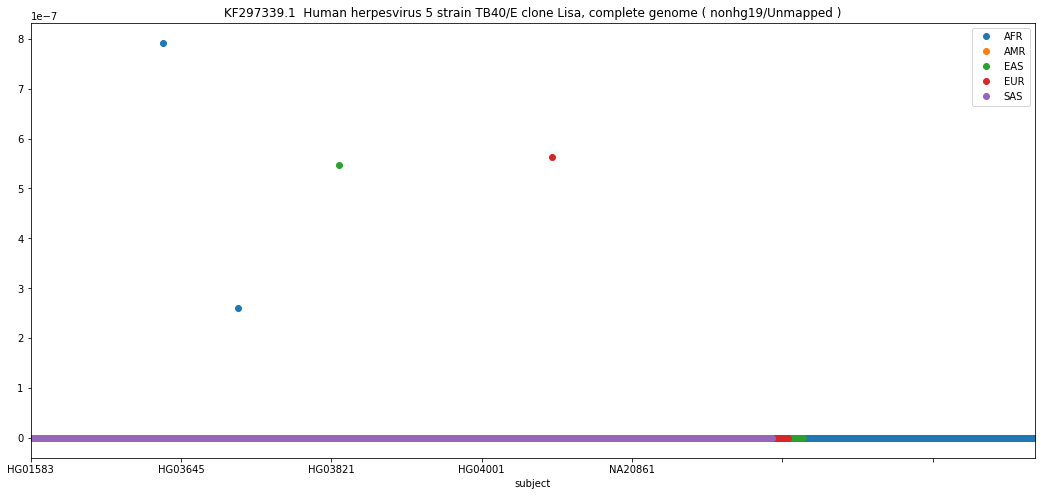

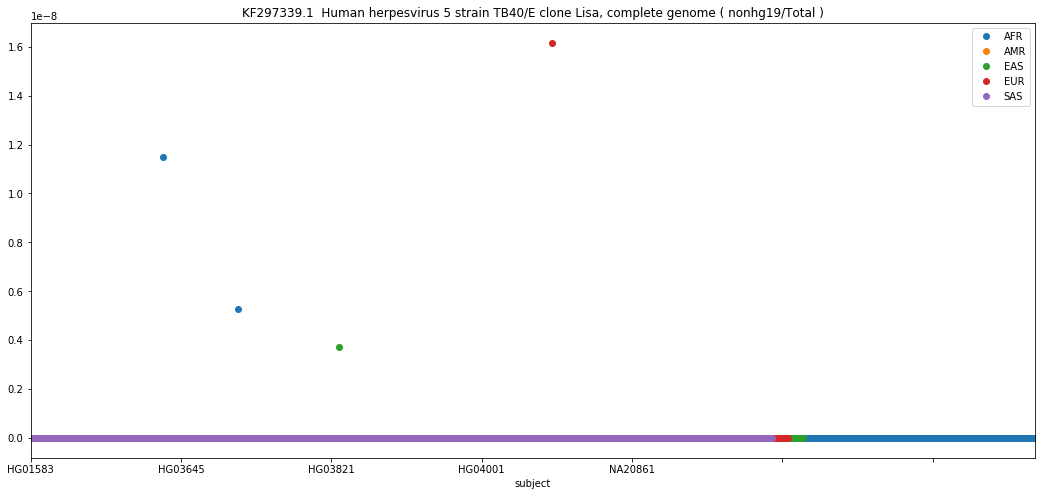

KF588566.1  Human herpesvirus 8 clone BrK.219#1_4, complete genome


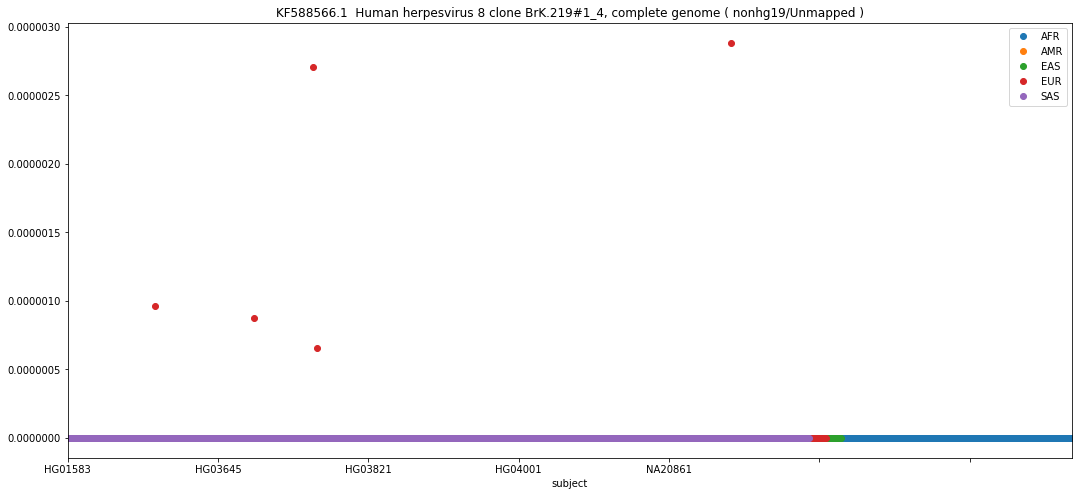

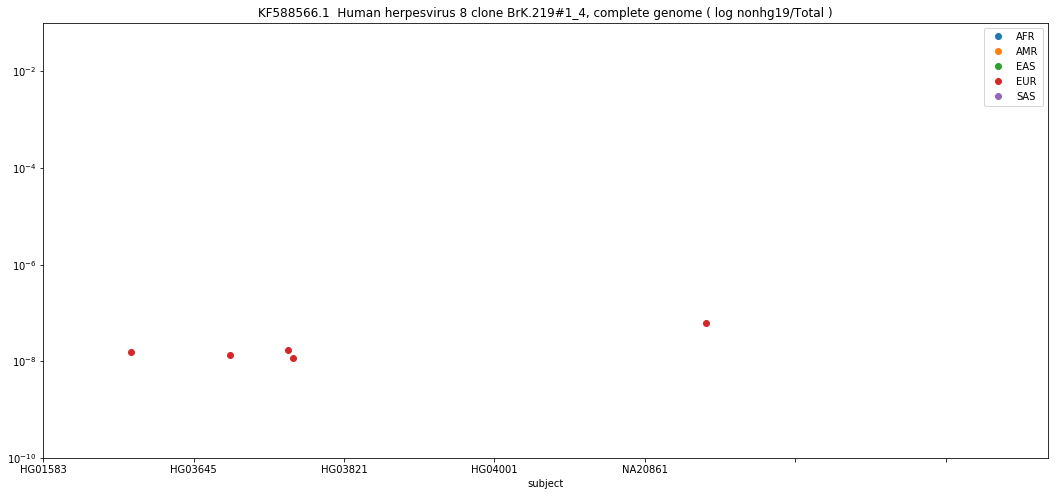

KM111555.2  Human immunodeficiency virus isolate JS2011001 from China gag polyprotein (gag) gene, complete cds; pol polyprotein (pol) gene, partial cds; vif protein (vif), vpr protein (vpr), tat protein (tat), rev protein (rev), and vpu protein (vpu) genes, complete cds; and nef protein (nef) gene, partial cds


KP257584.1  Human herpesvirus 6A isolate AJ, complete genome


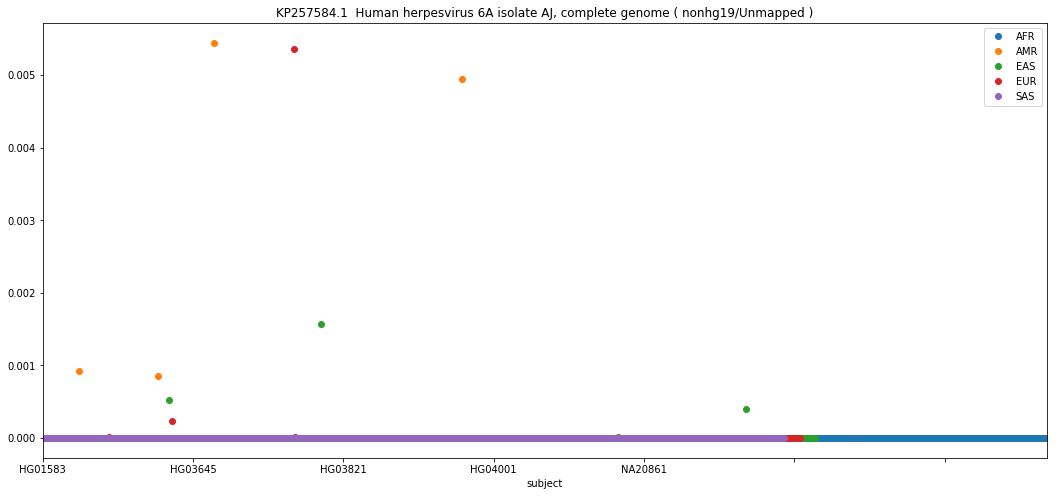

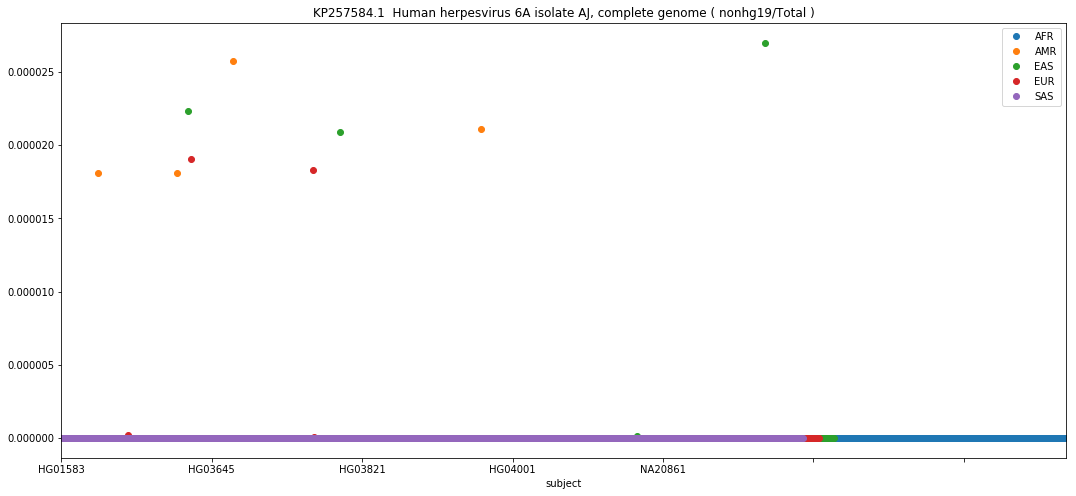

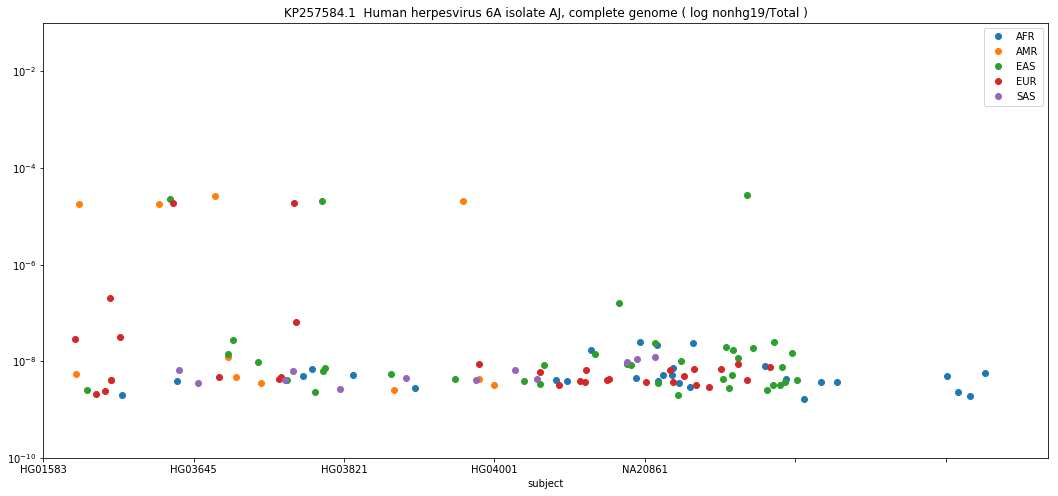

KX905202.1  Human T-lymphotropic virus 1 isolate VAN-EM5, complete genome


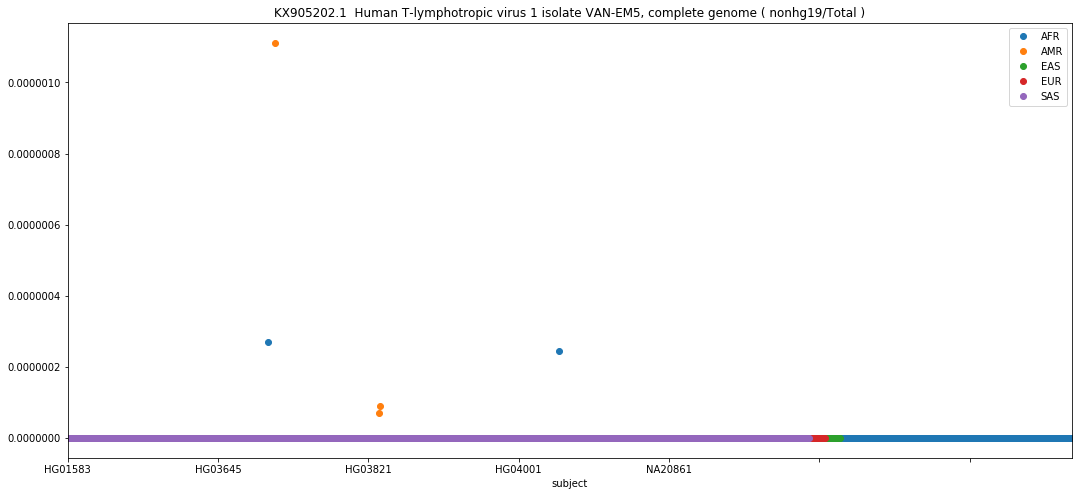

KY002685.1  Human adenovirus isolate Yunnan/KM04/2016, complete genome


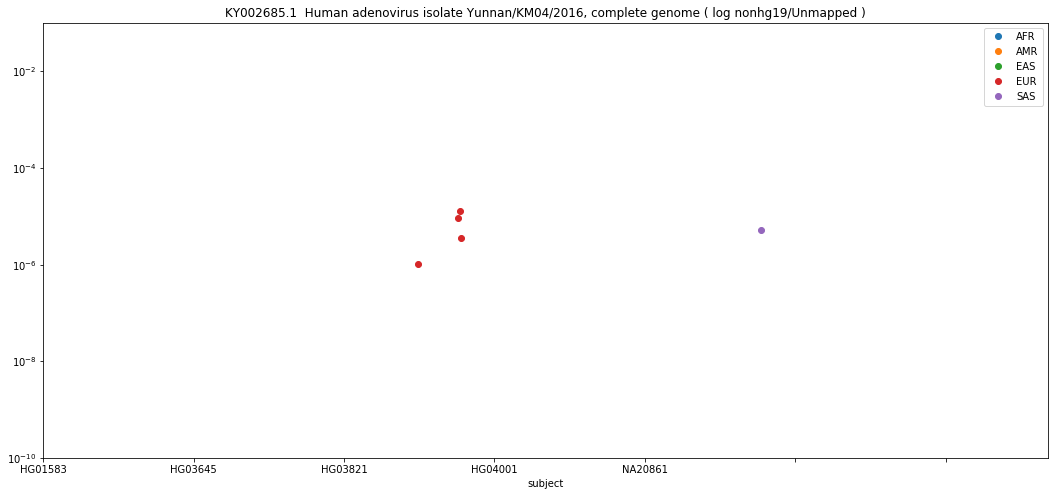

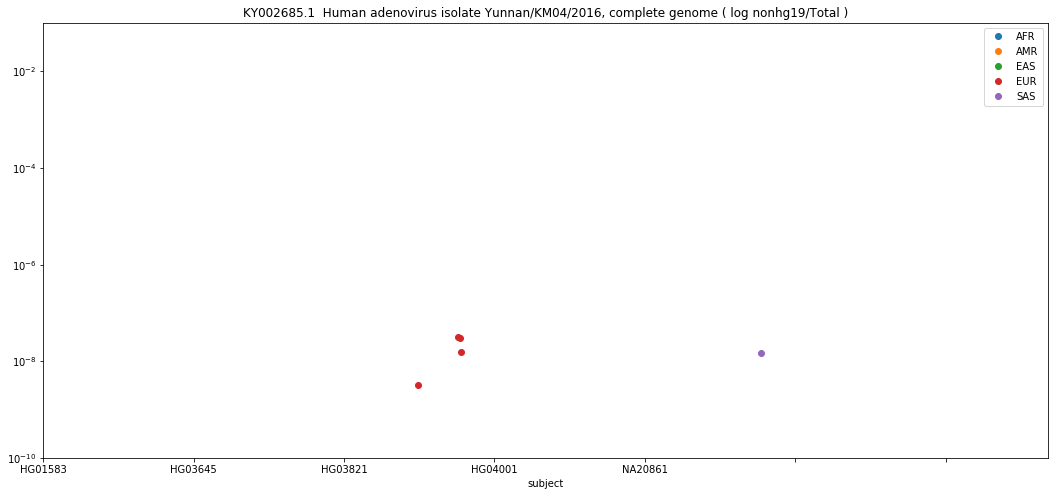

KY094066.1  BeAn 58058 virus, complete genome


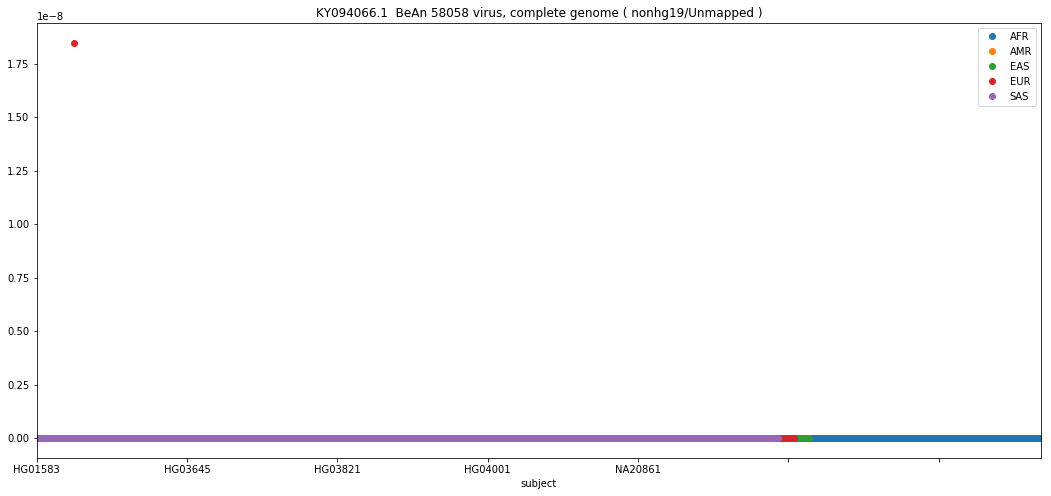

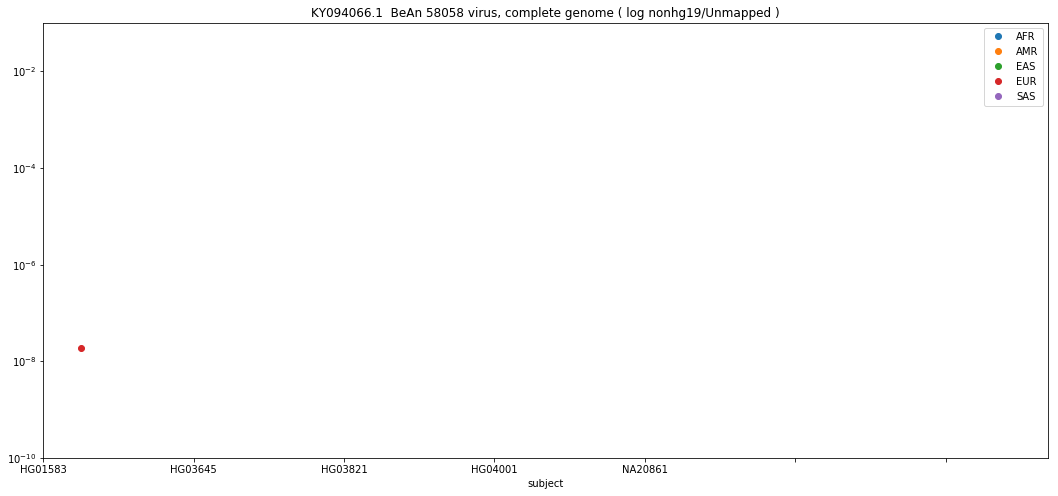

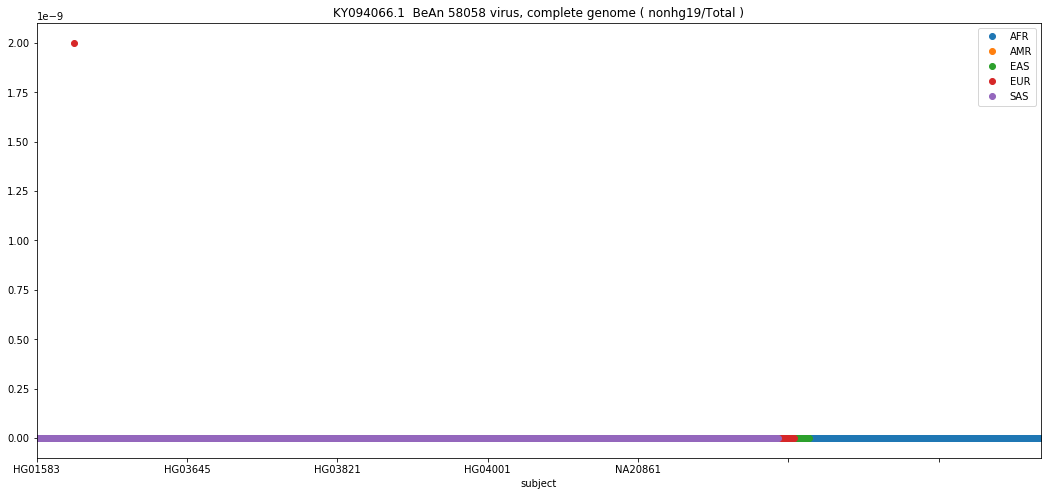

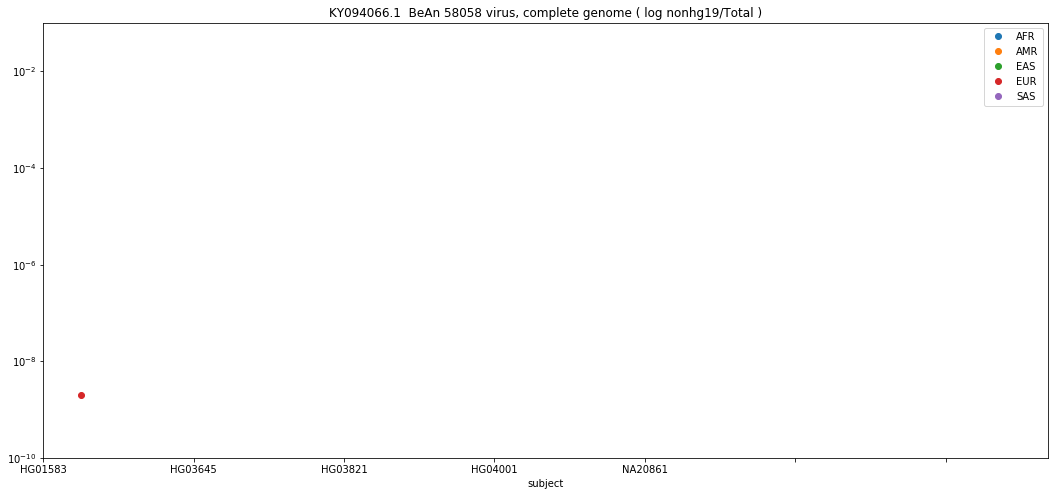

LC215429.1  Human adenovirus DNA, complete genome, strain: case67_20121578


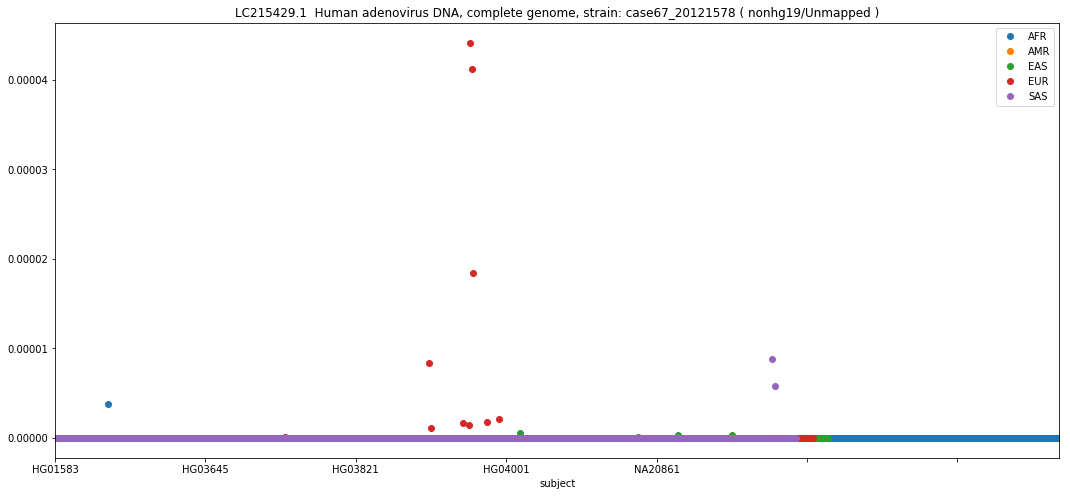

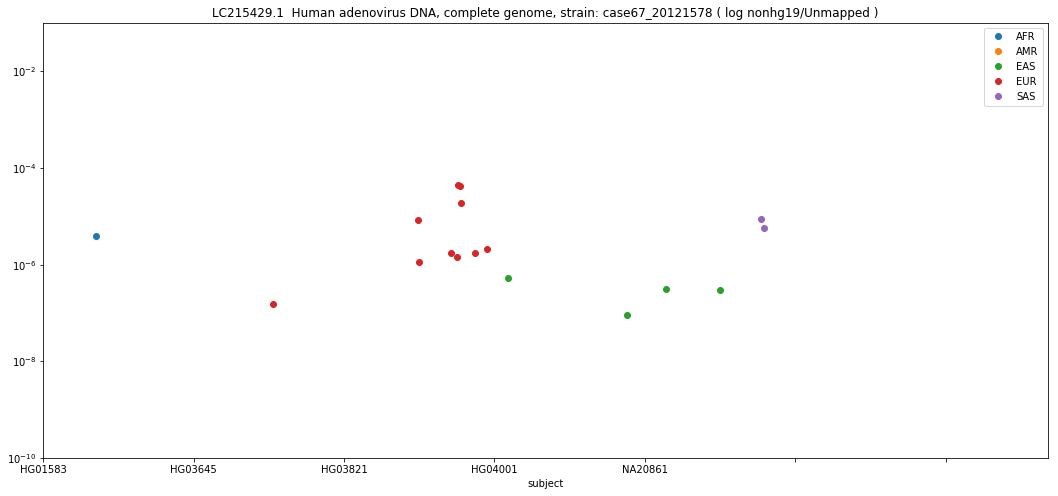

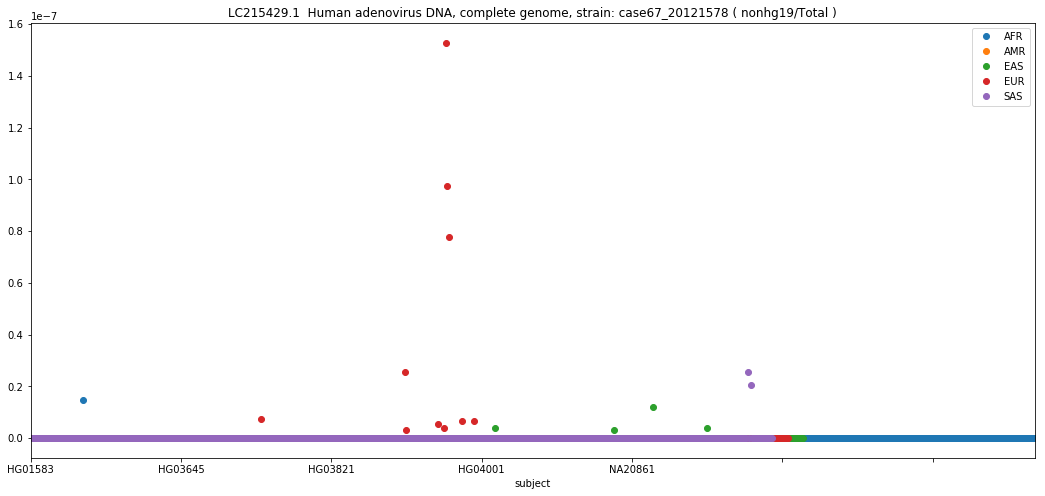

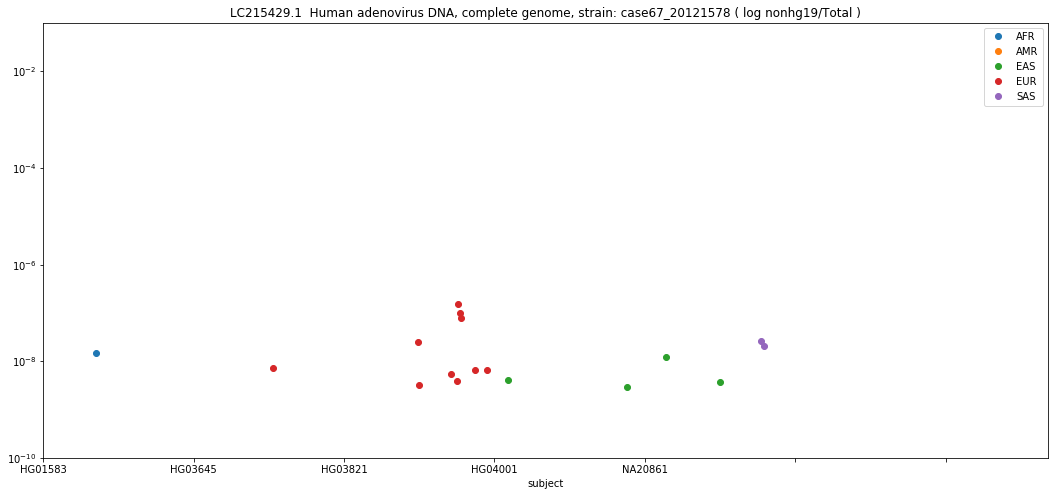

LC215433.1  Human adenovirus DNA, complete genome, strain: case110_20131573


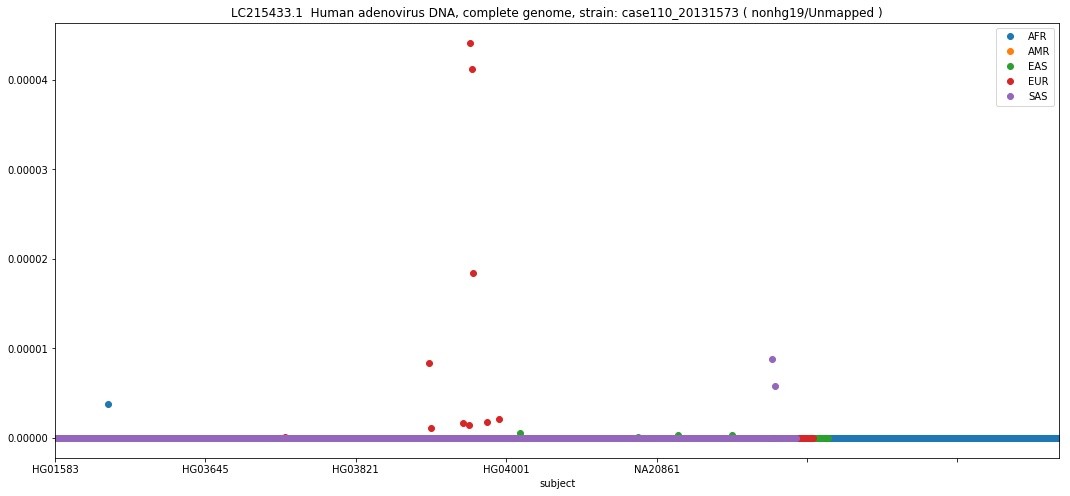

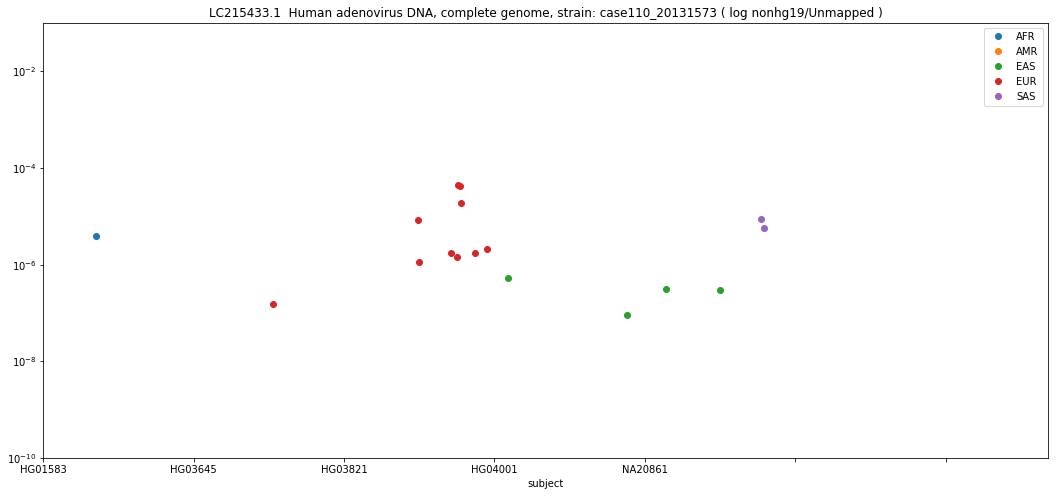

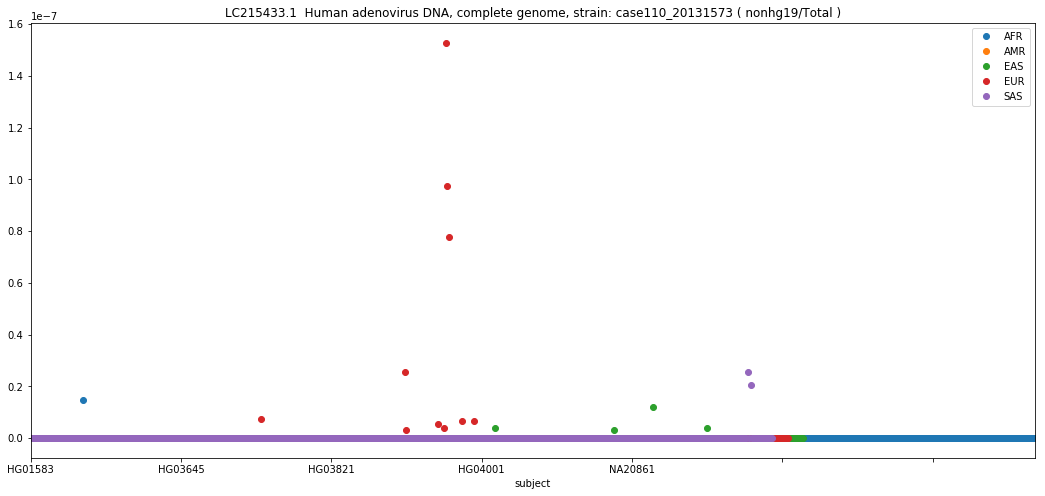

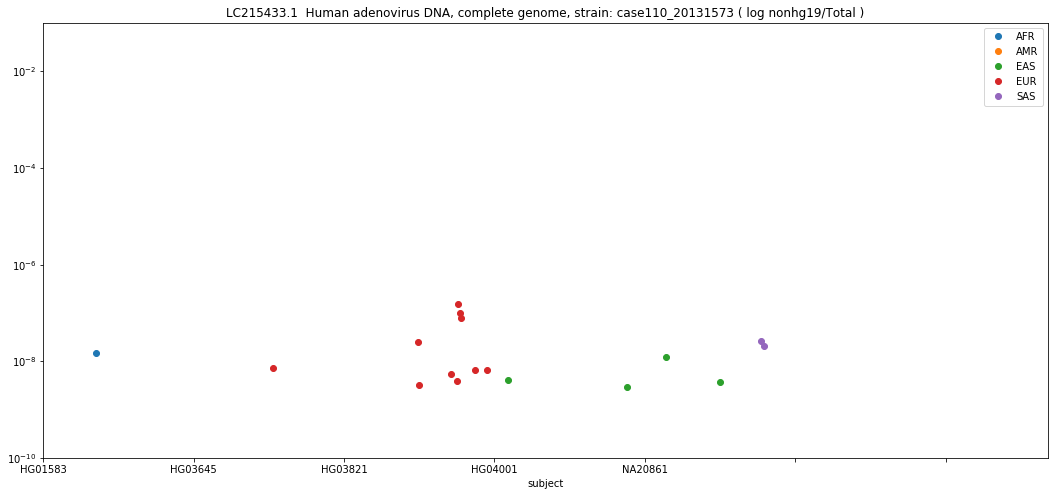

LC215434.1  Human adenovirus DNA, complete genome, strain: case111_20131575


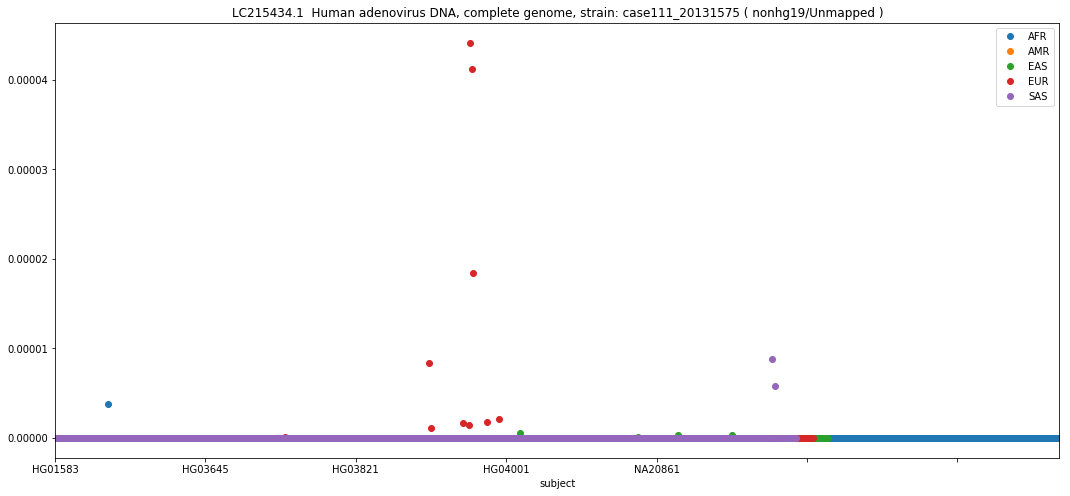

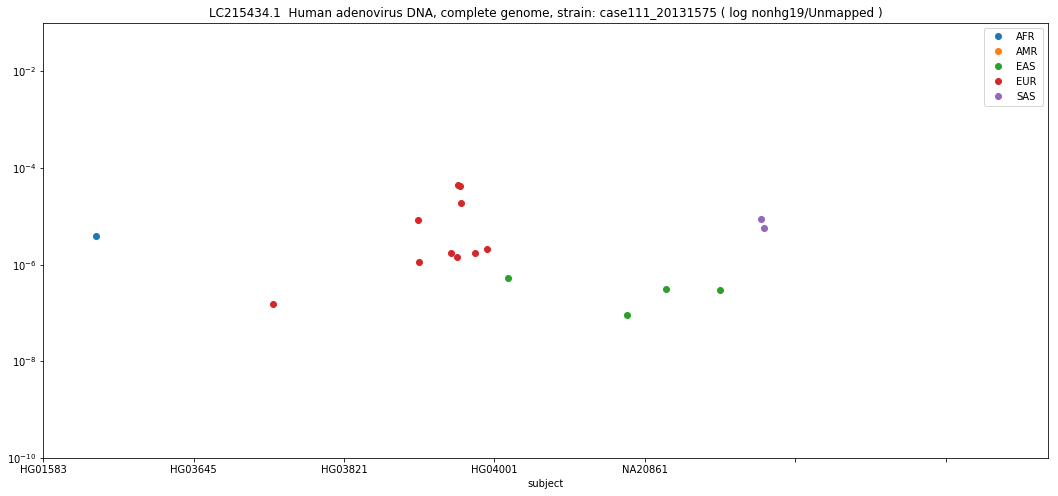

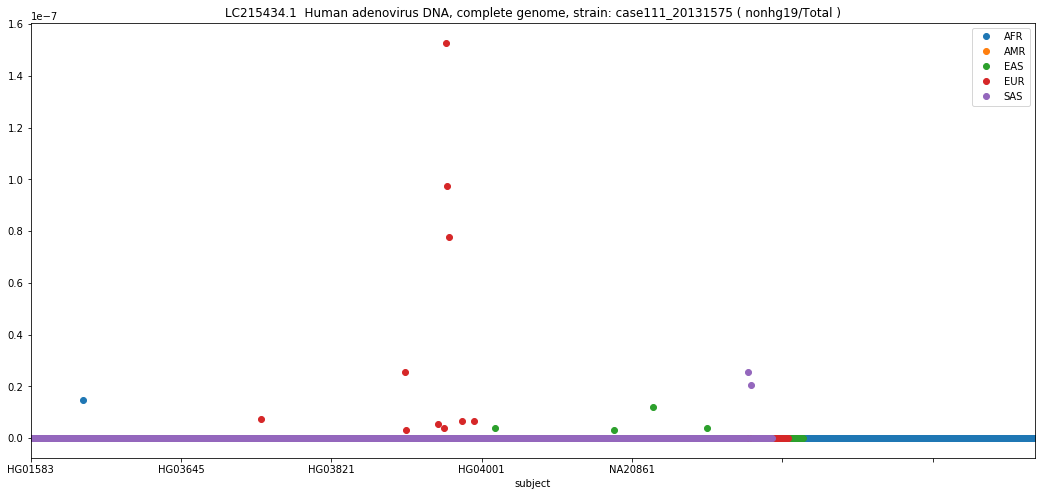

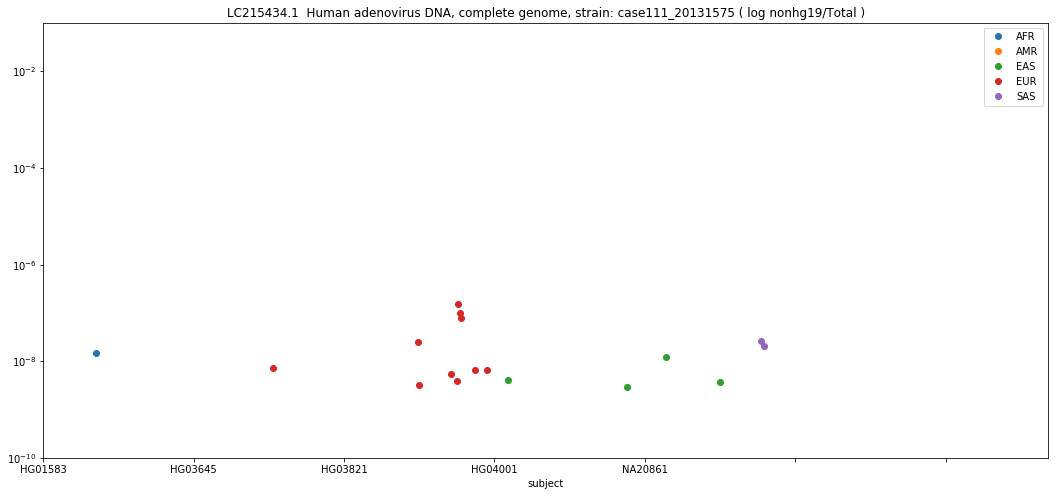

LC215435.1  Human adenovirus DNA, complete genome, strain: case112_20131578


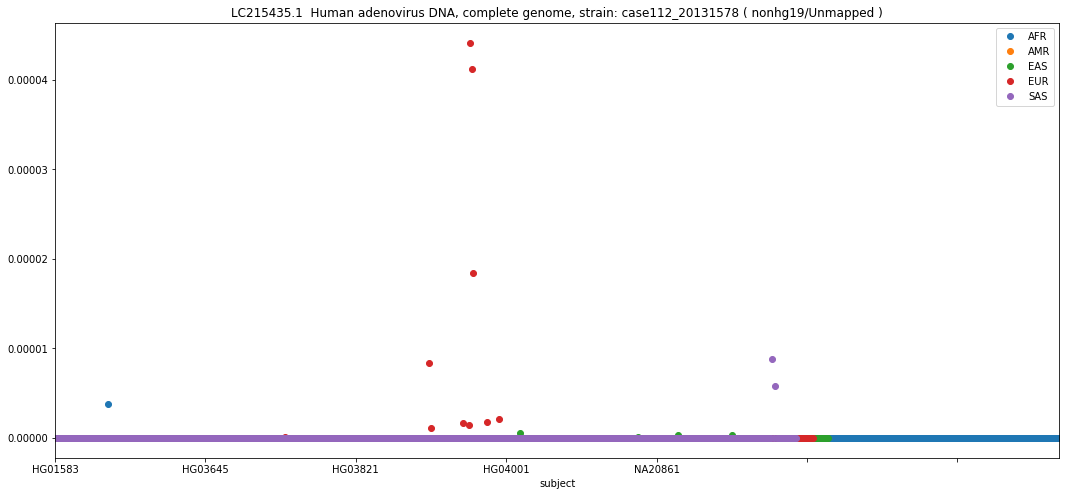

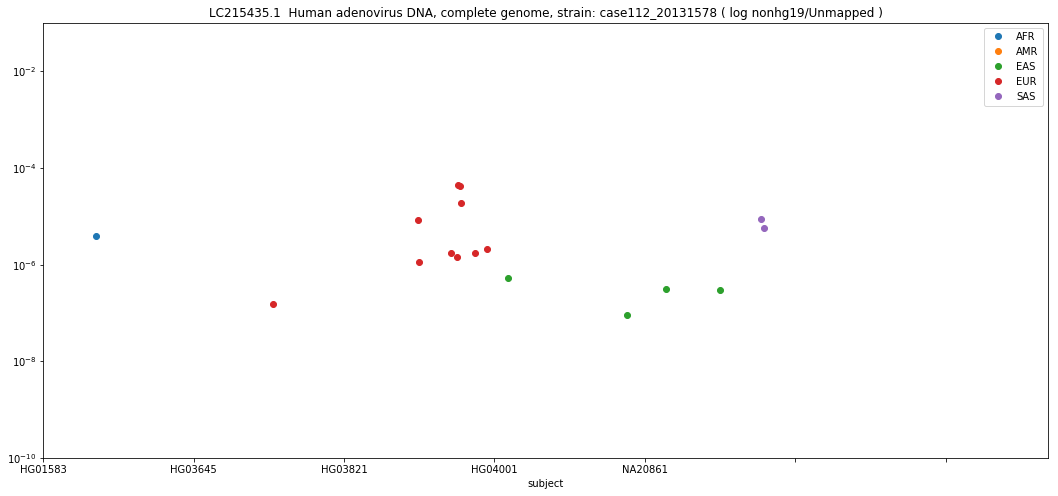

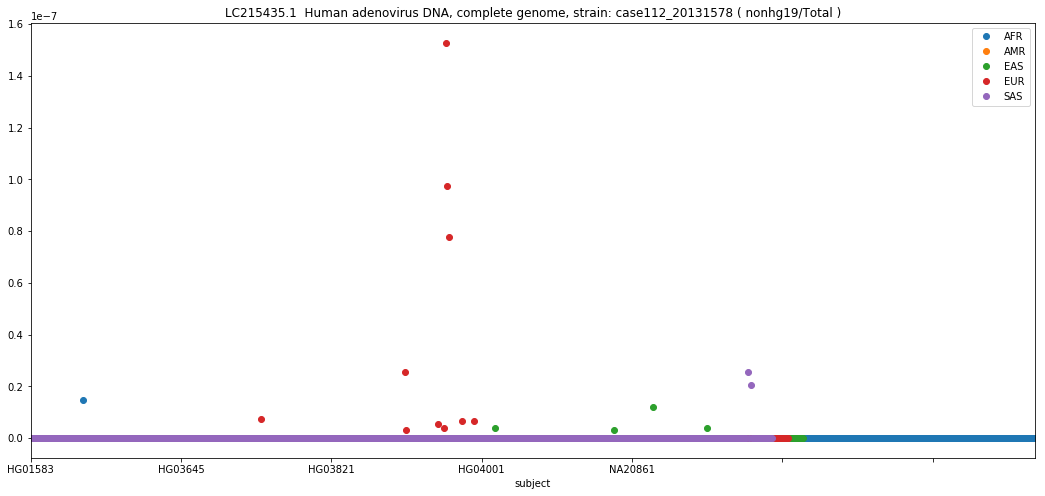

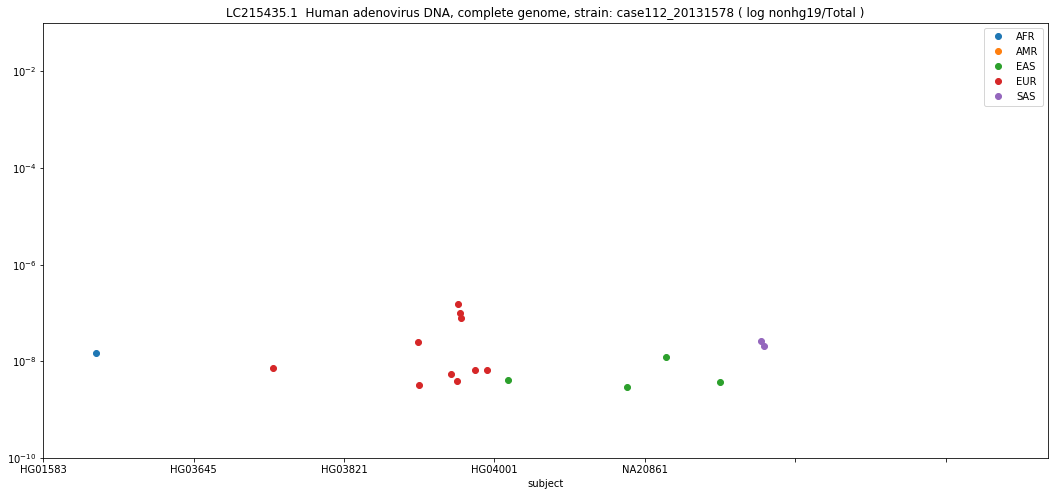

LC215436.1  Human adenovirus DNA, complete genome, strain: case113_20131581


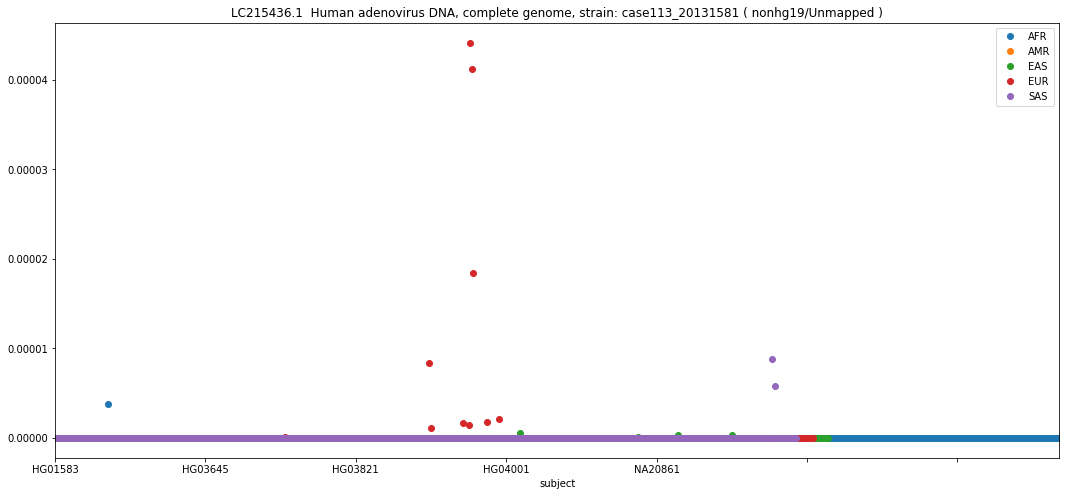

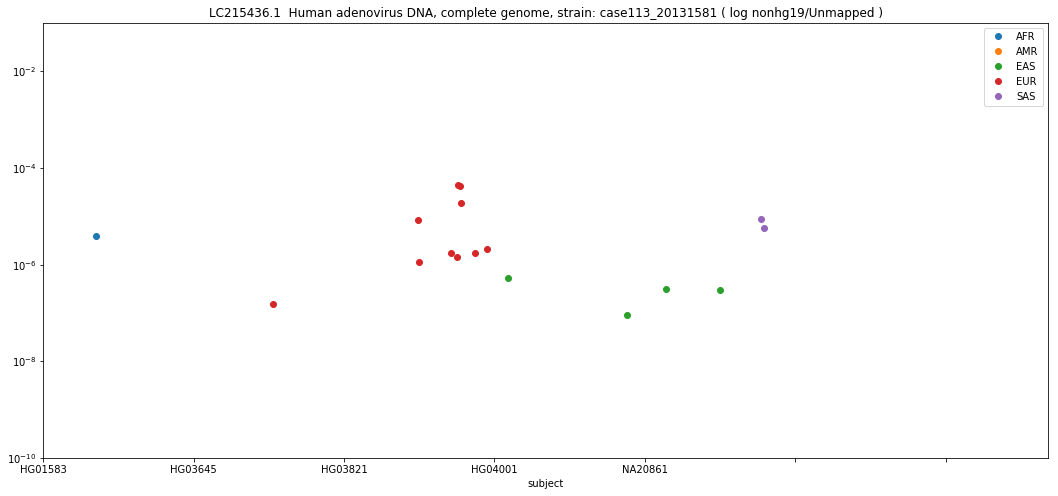

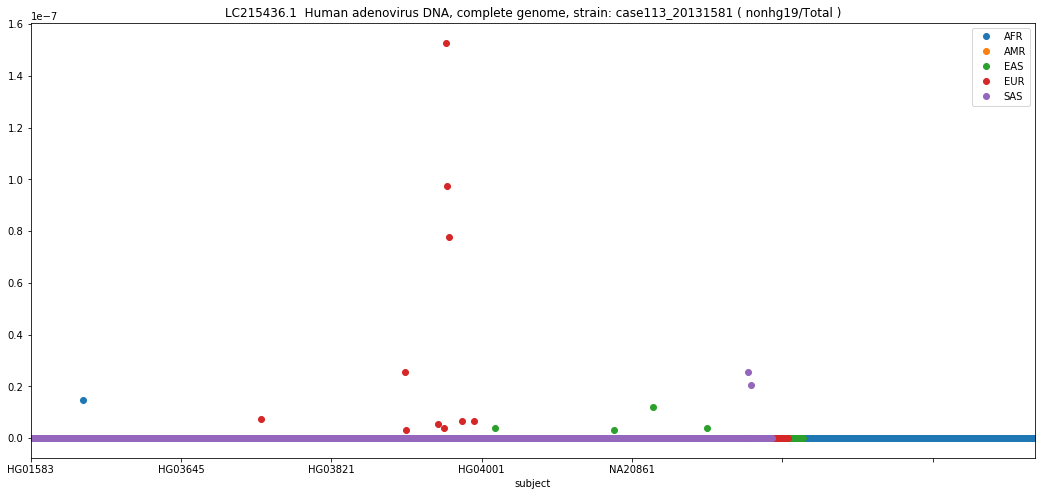

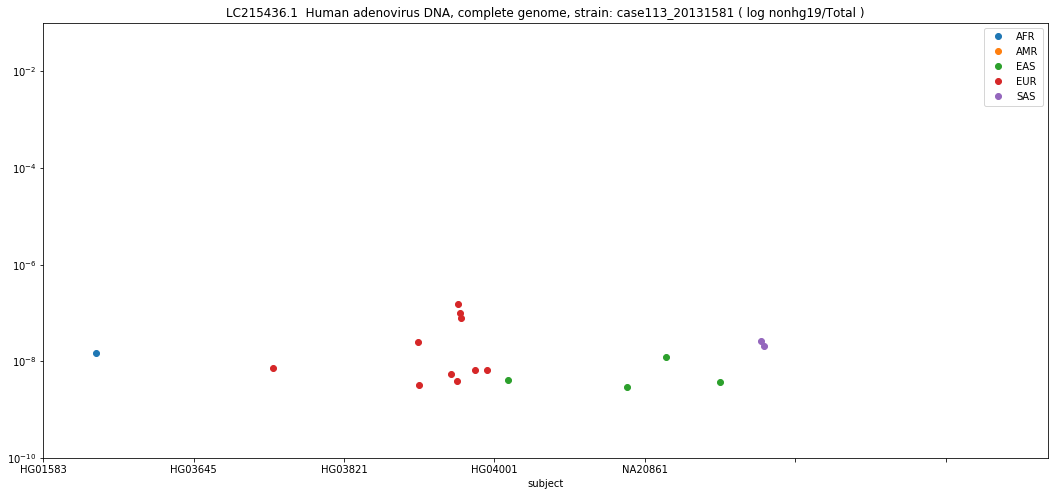

LC215437.1  Human adenovirus DNA, complete genome, strain: case118_20131587


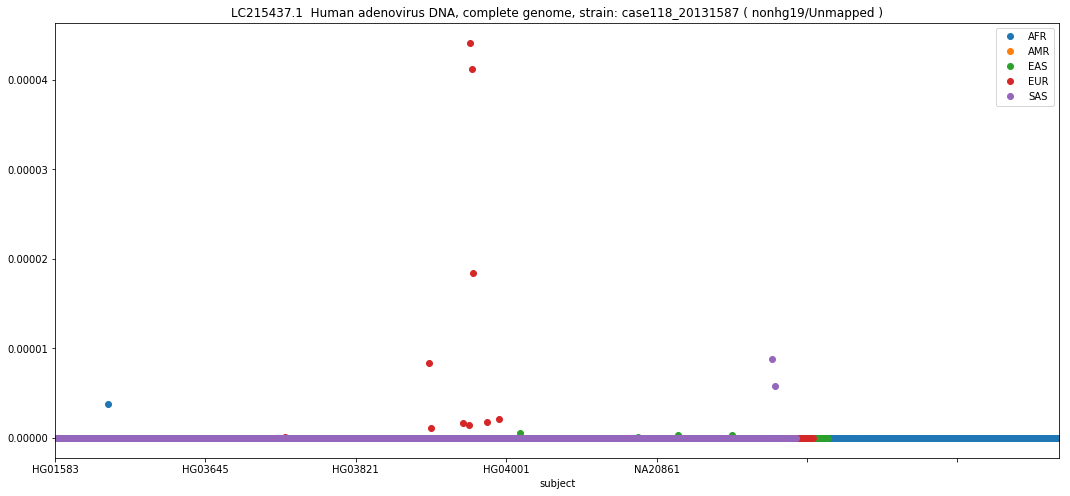

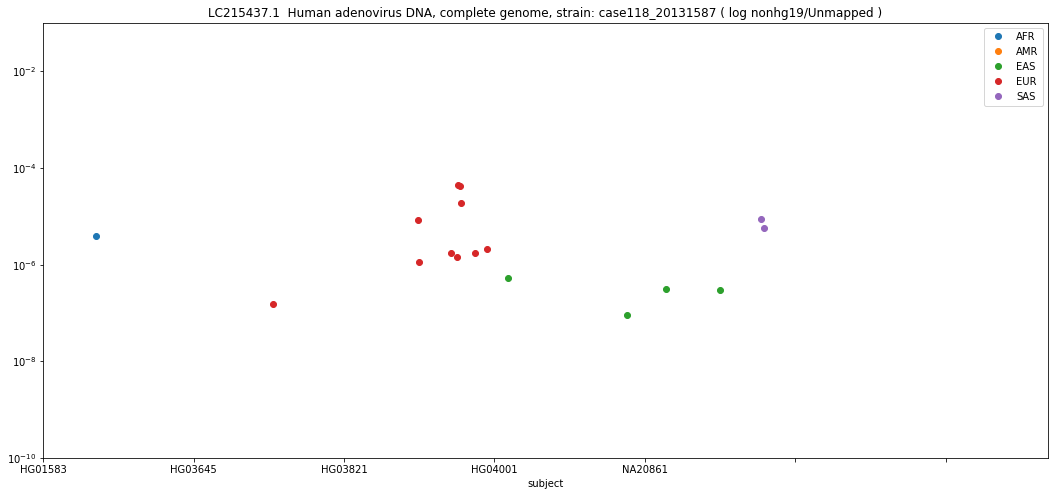

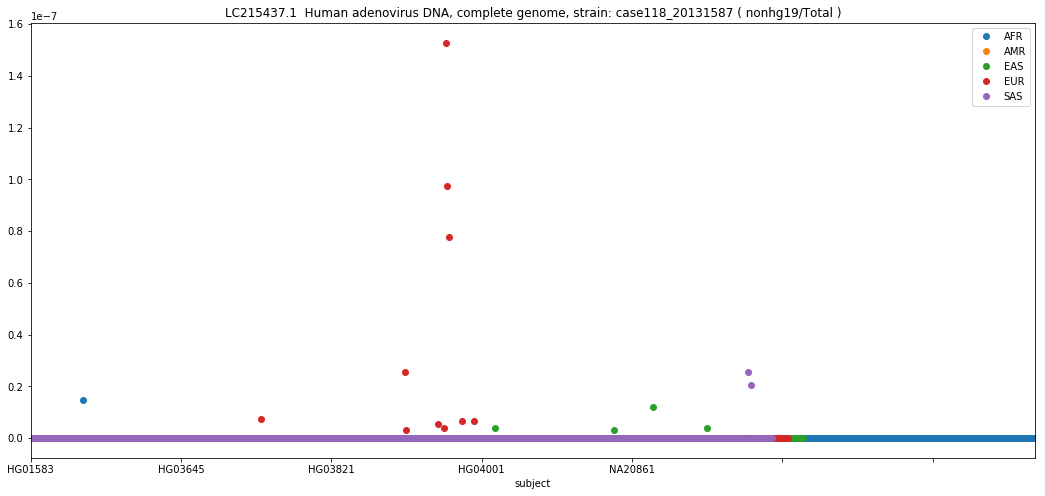

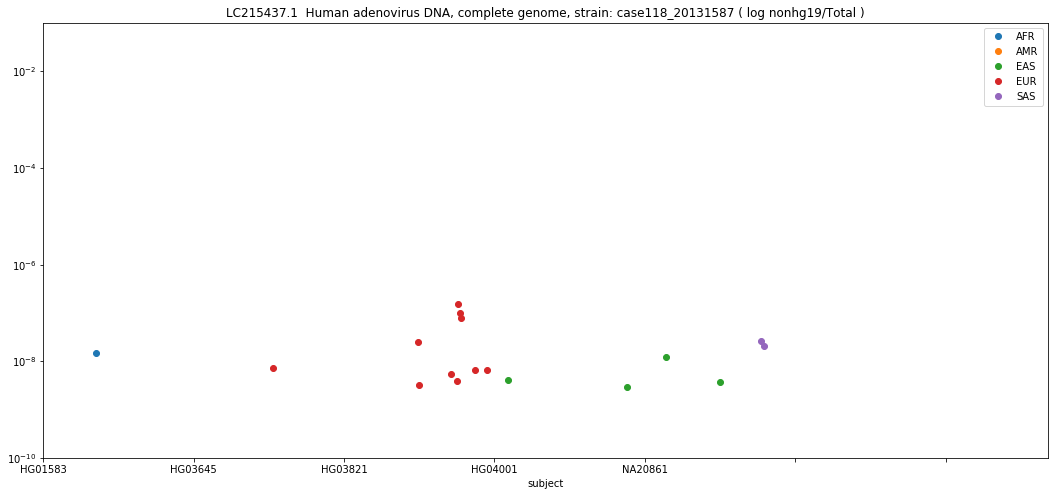

M17451.1  Human immunodeficiency virus type 1, isolate RF (HAT-3), complete genome


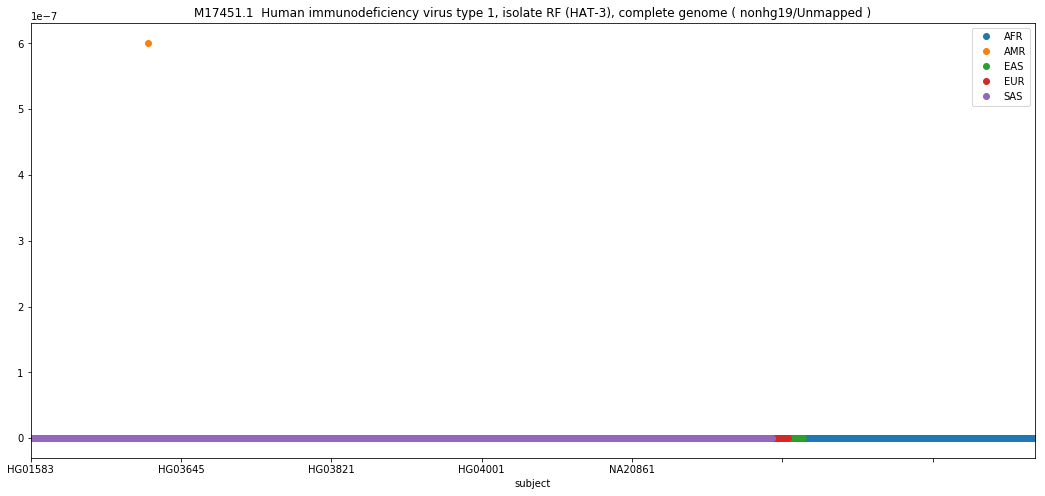

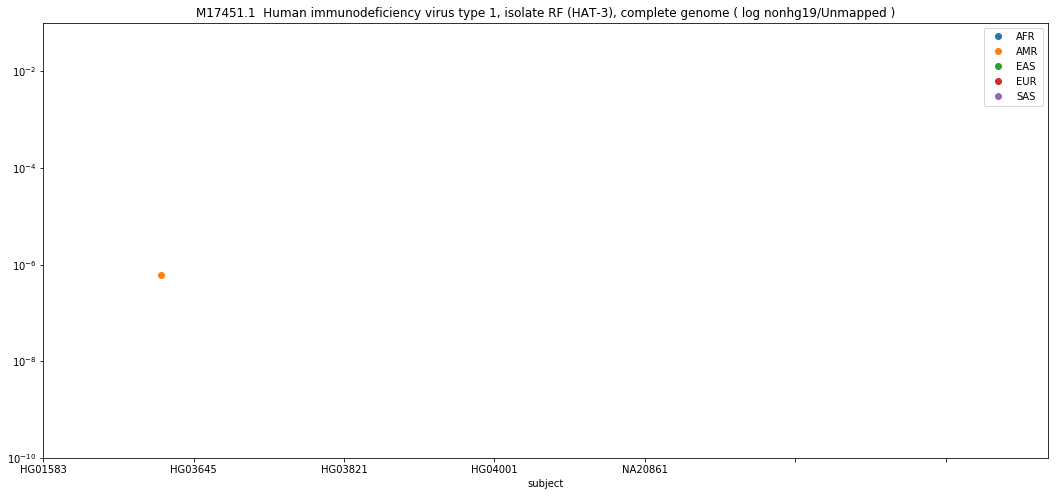

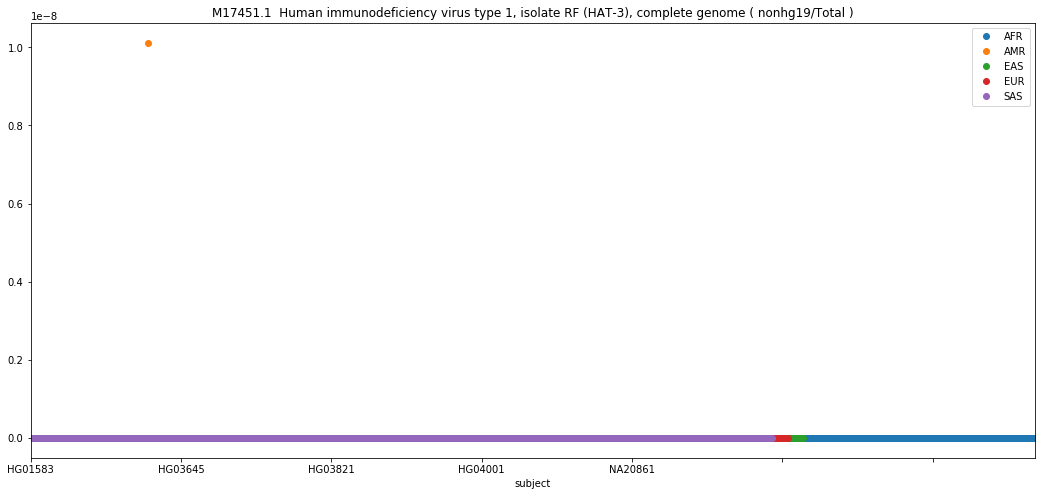

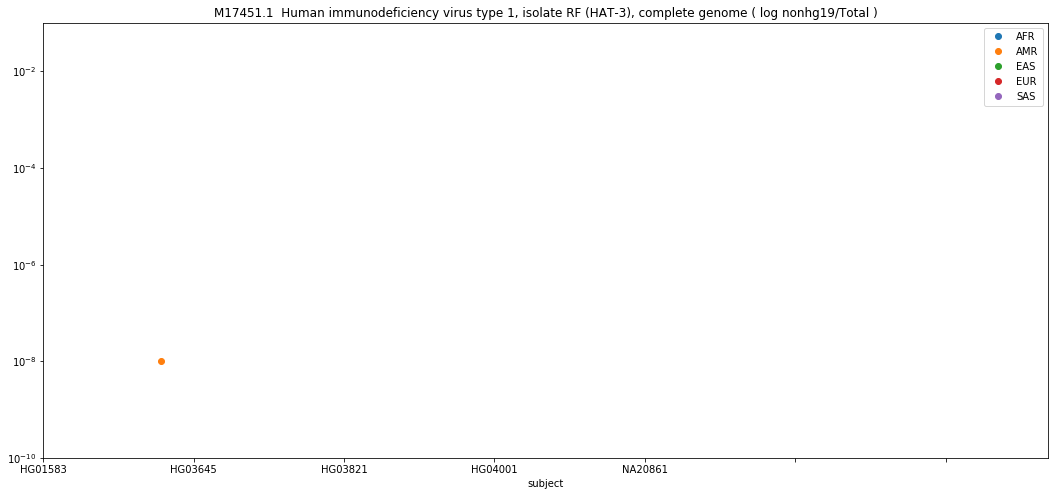

M26727.1  Human immunodeficiency virus type 1 (HIV-1) proviral DNA, complete genome


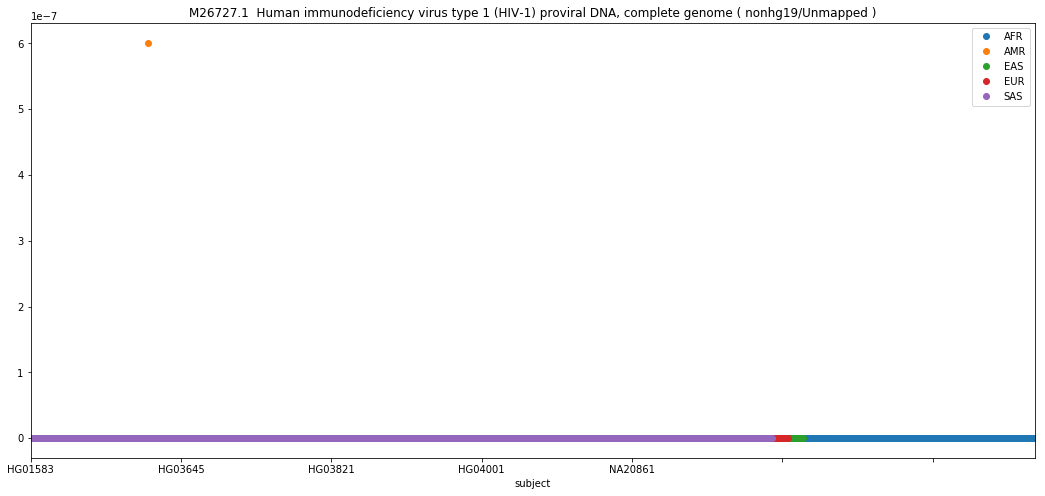

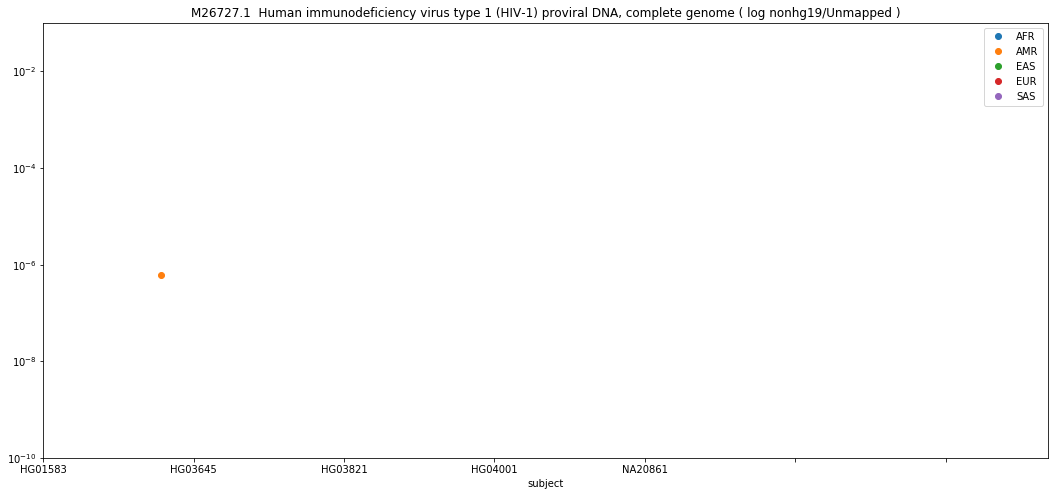

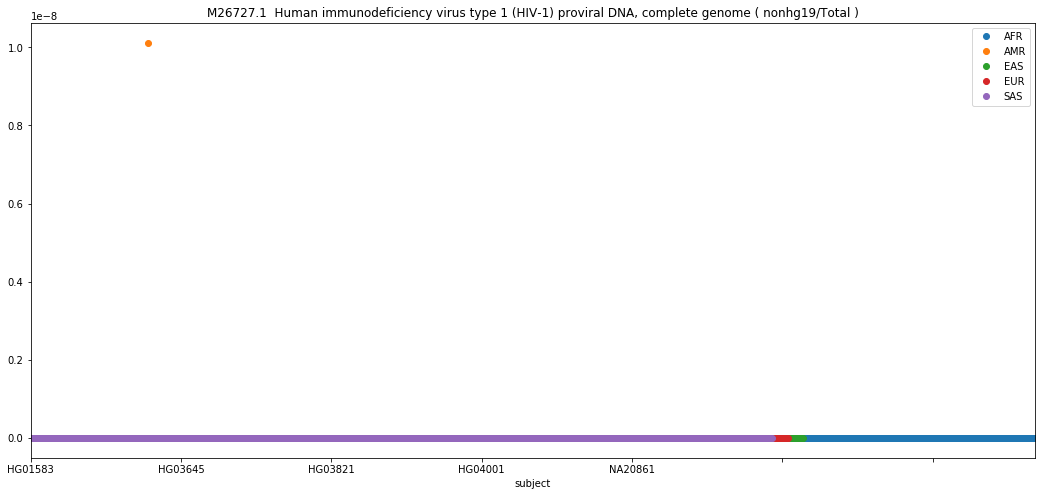

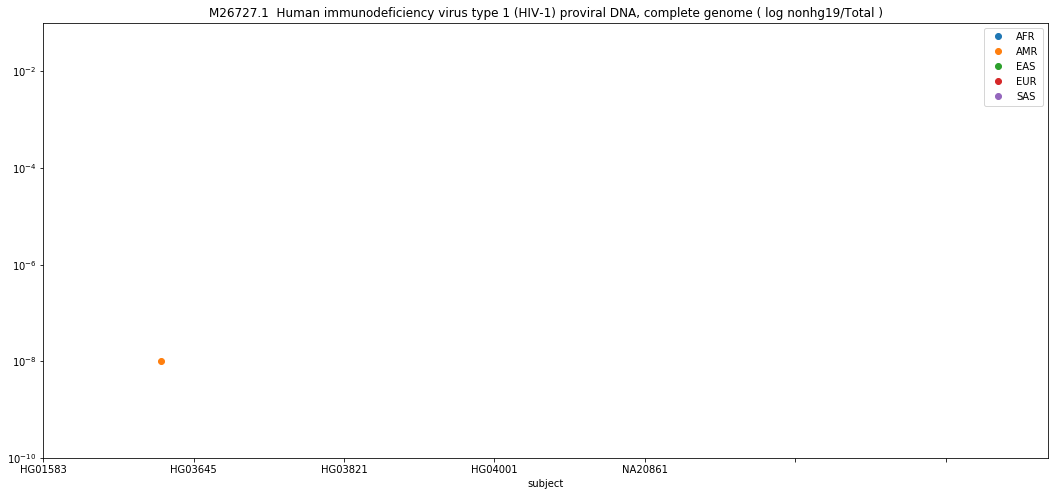

M27323.1  Human immunodeficiency virus type 1 (HIV-1) proviral complete genome


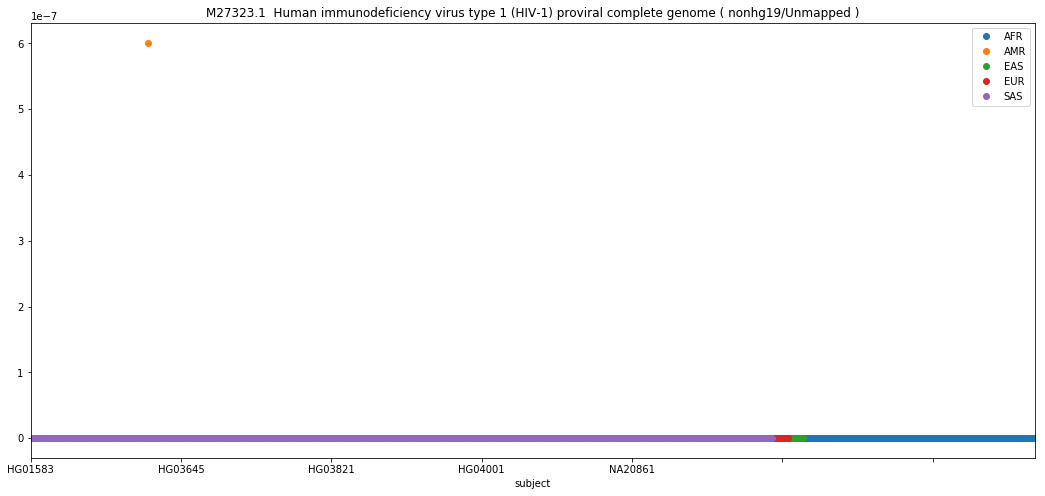

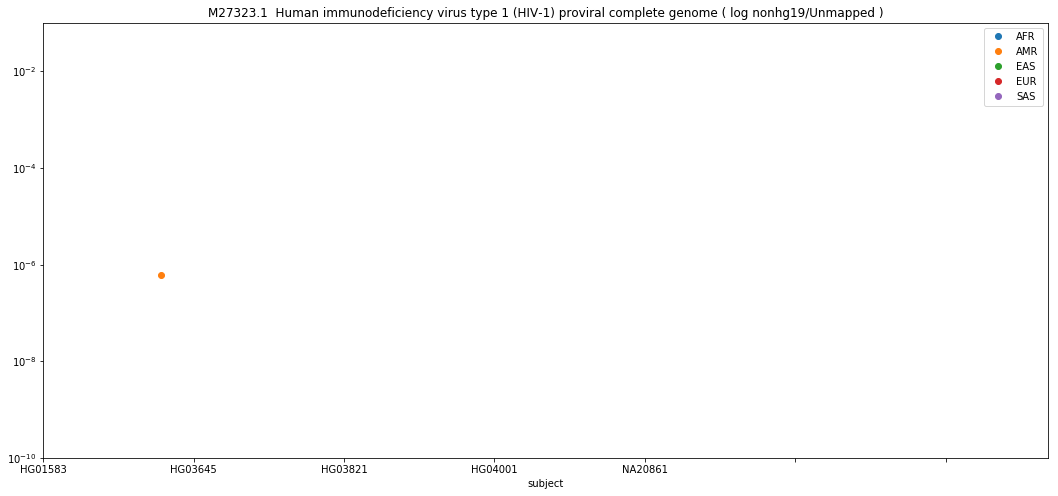

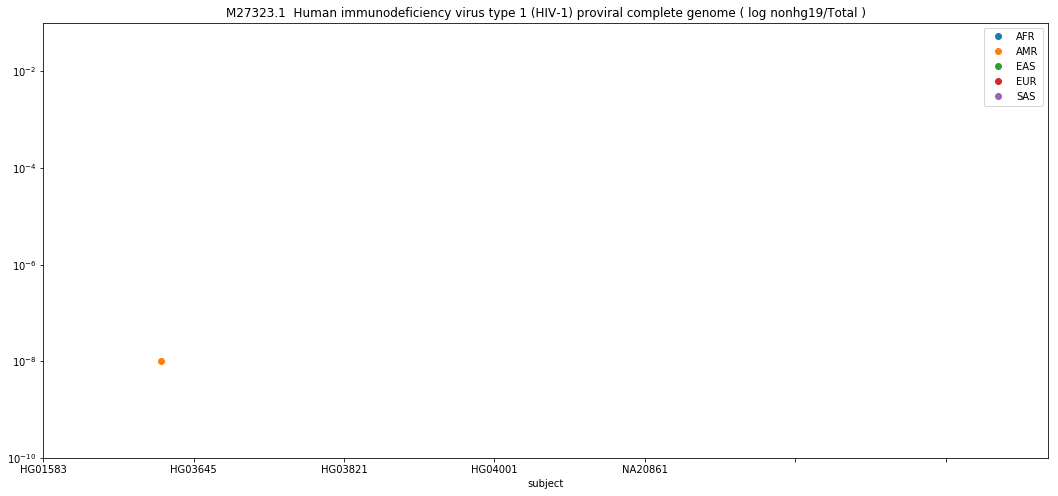

NC_000898.1  Human herpesvirus 6B, complete genome


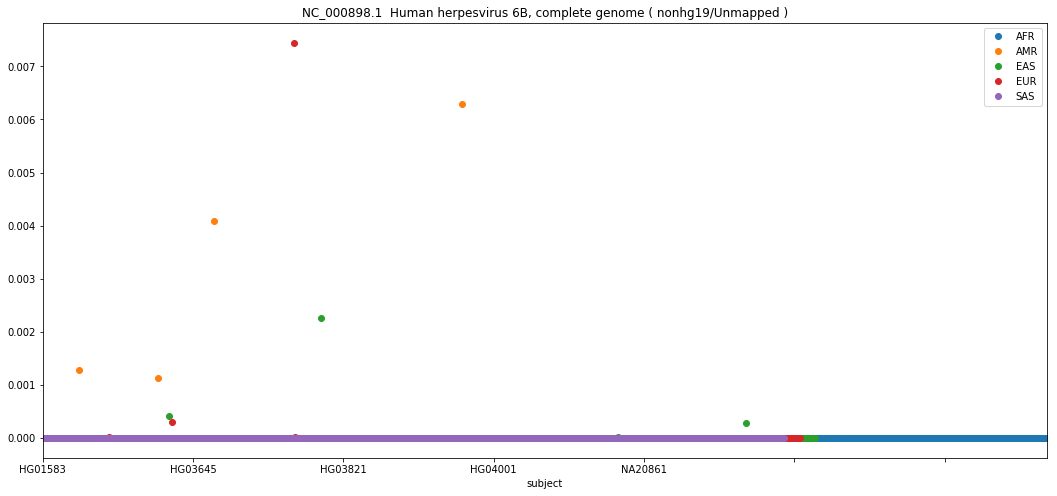

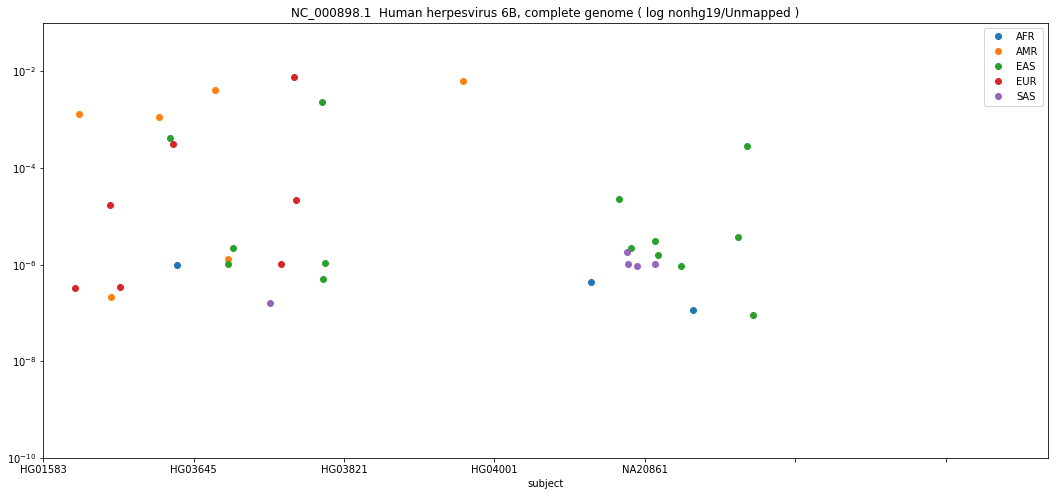

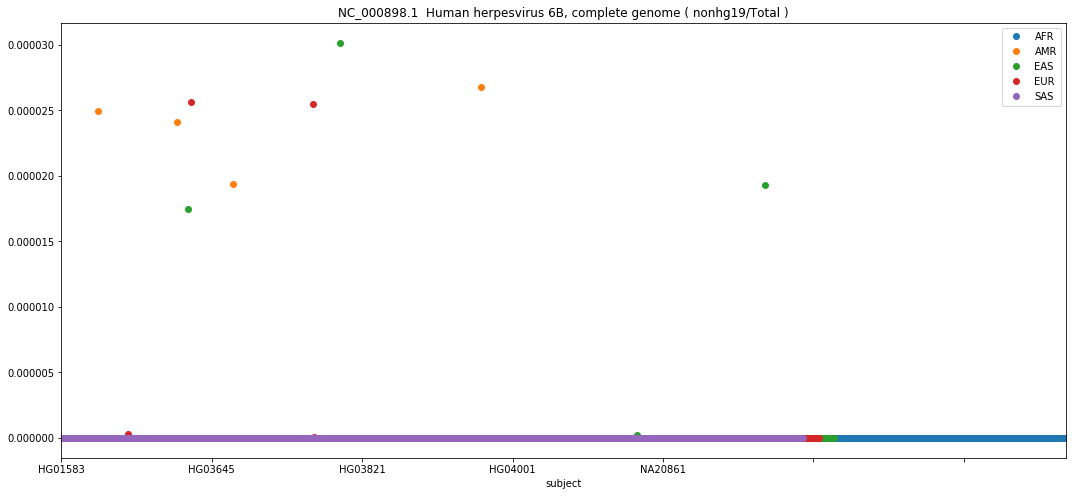

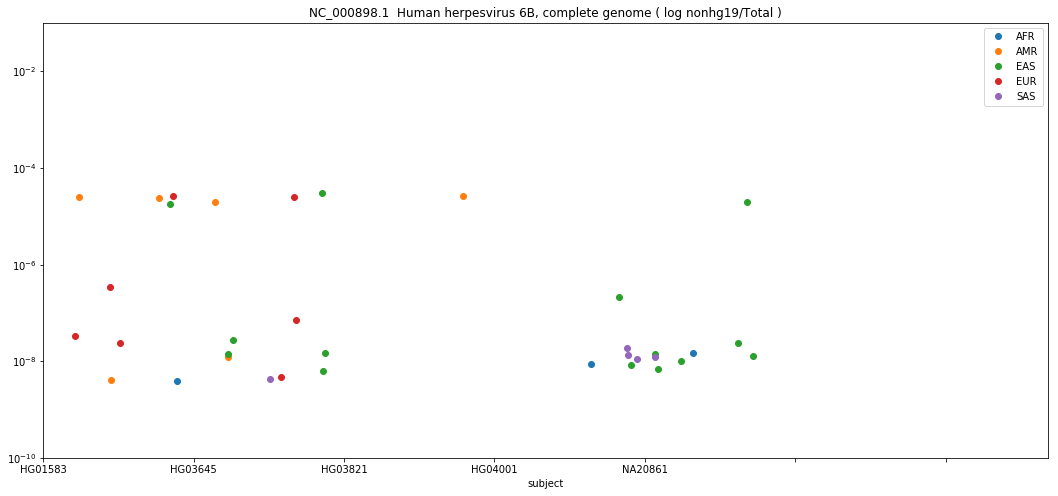

NC_001526.4  Human papillomavirus type 16, complete genome


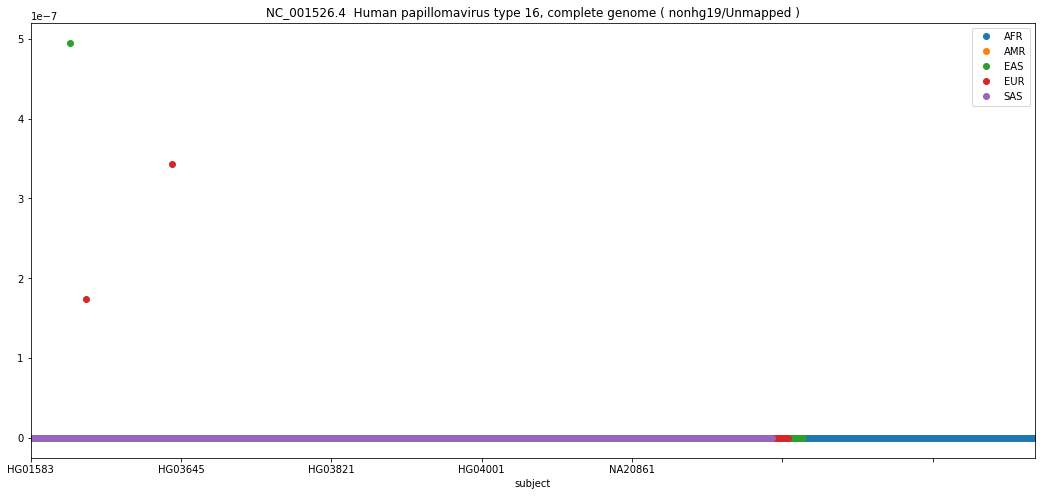

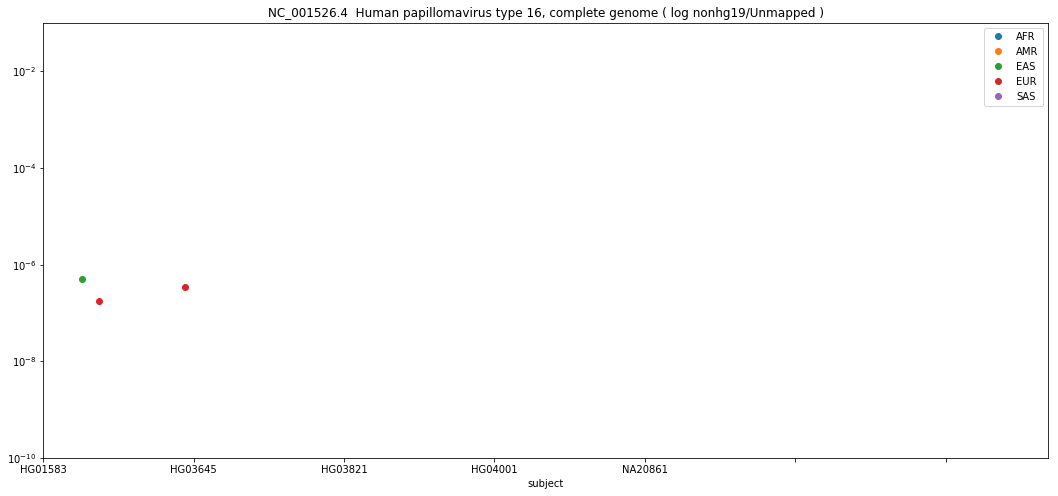

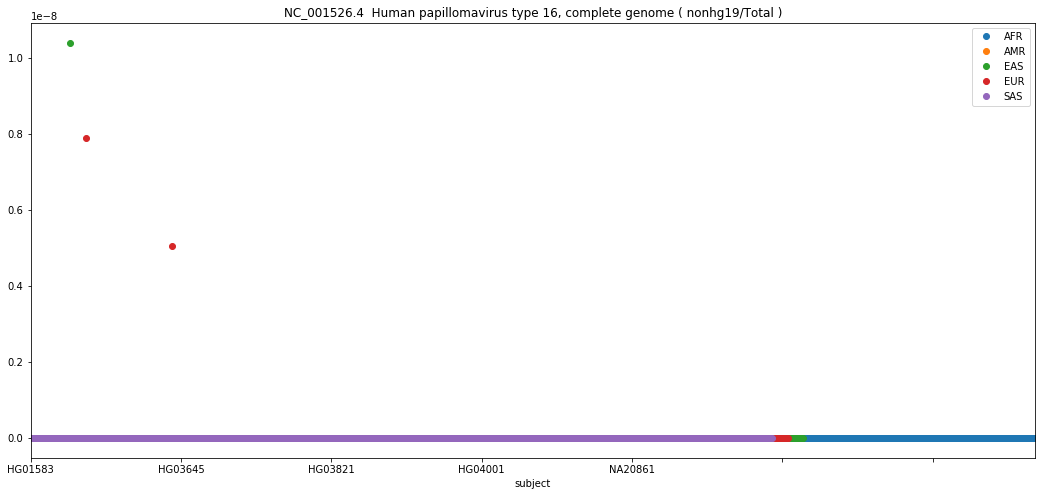

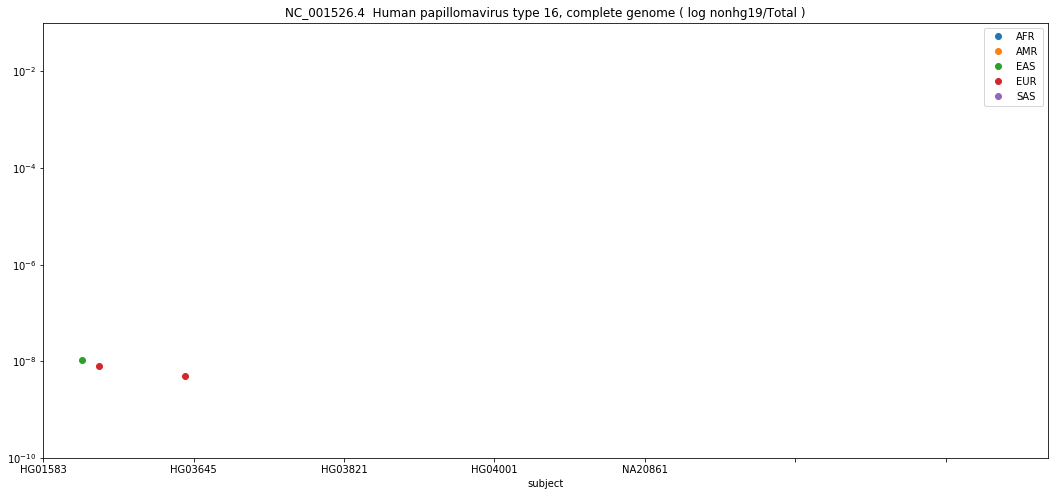

NC_001664.4  Human betaherpesvirus 6A, variant A DNA, complete virion genome, isolate U1102


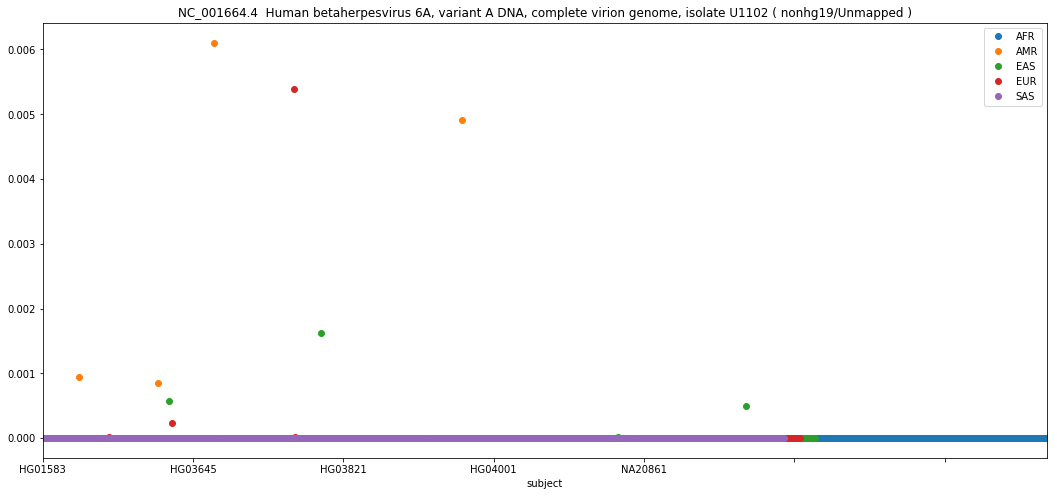

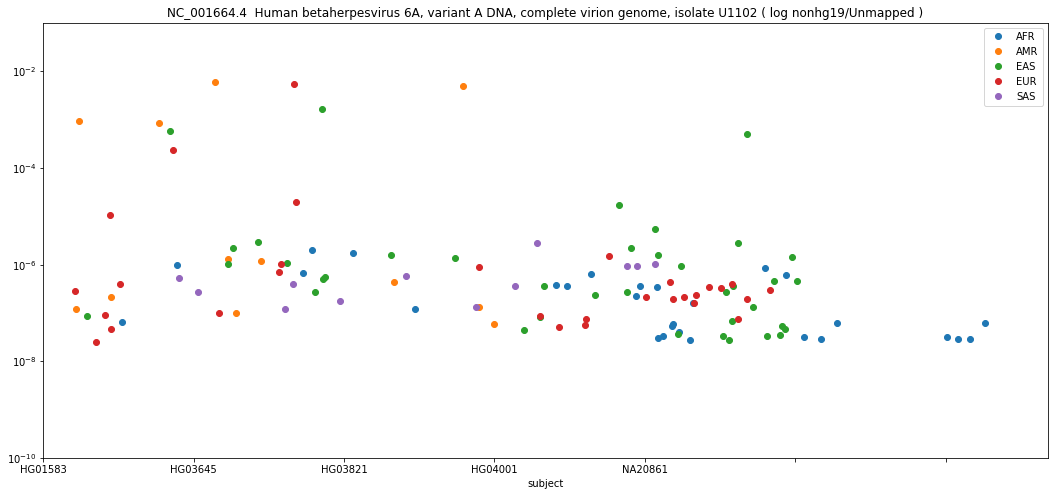

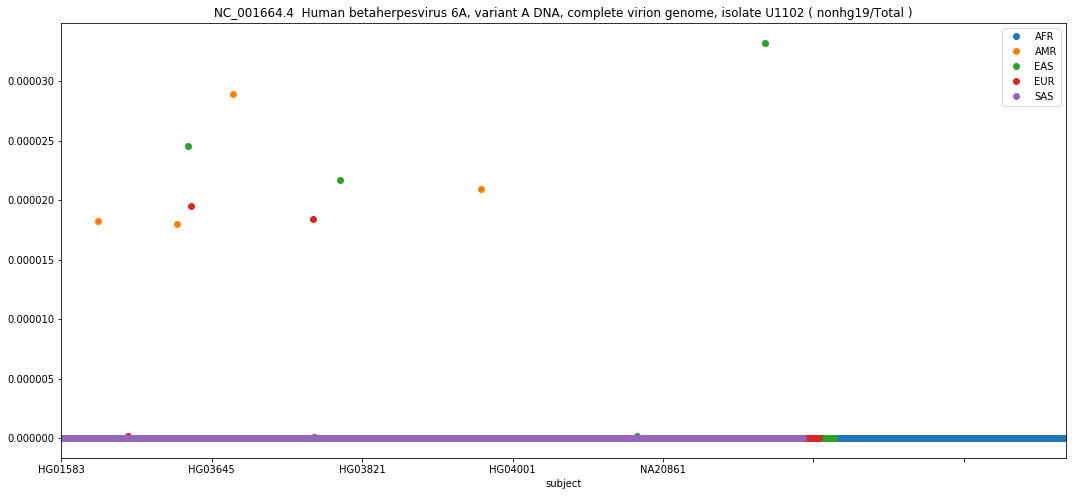

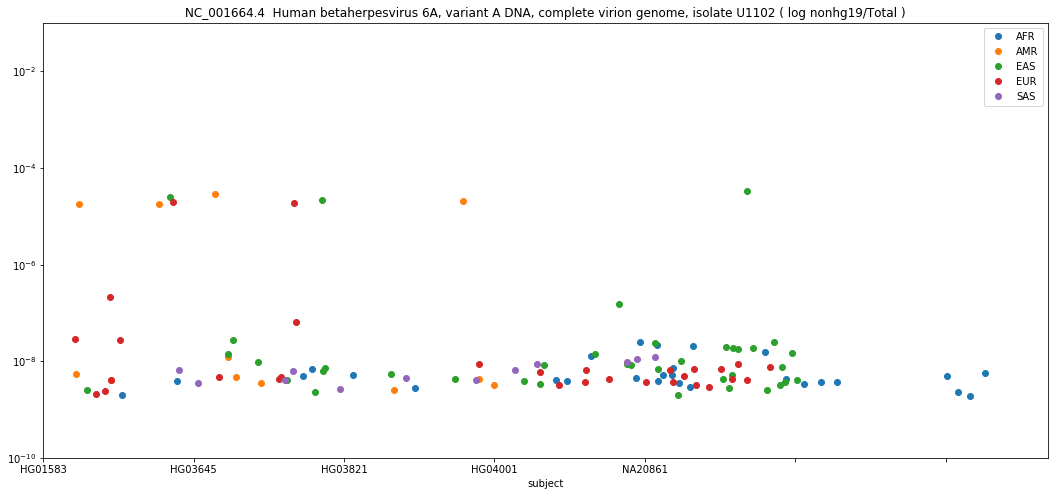

NC_001716.2  Human herpesvirus 7, complete genome


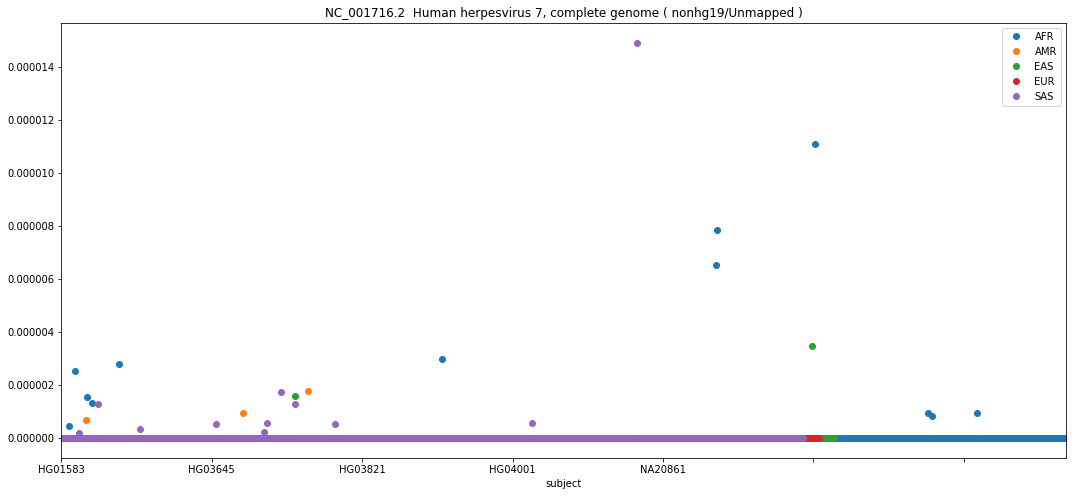

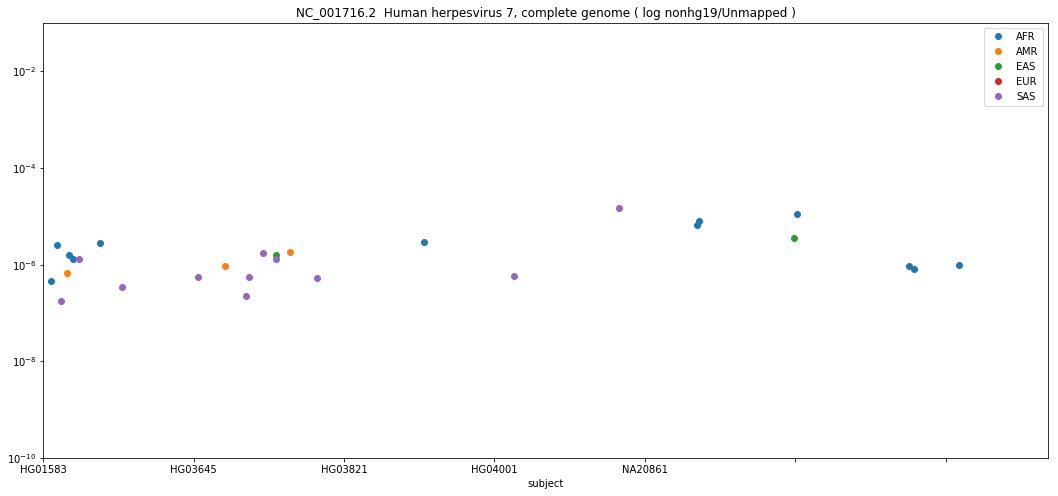

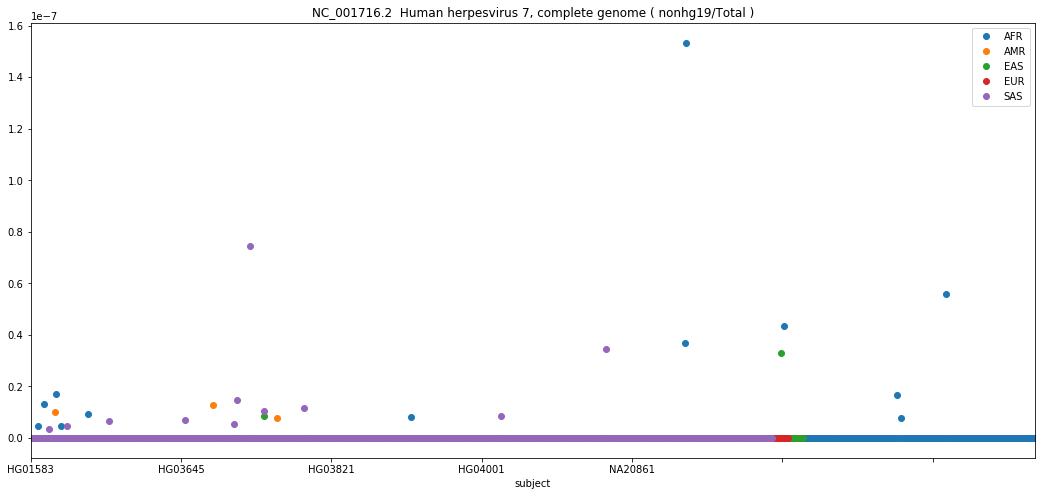

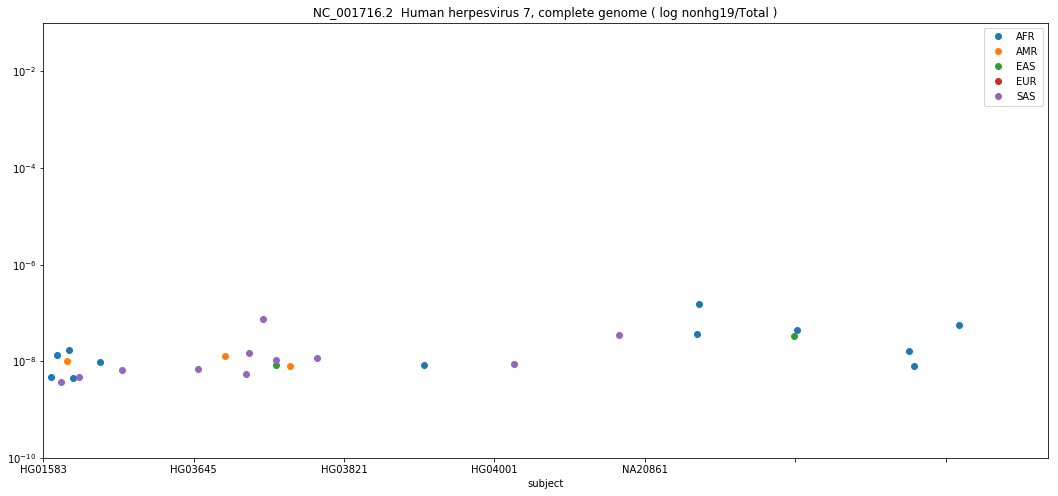

NC_006273.2  Human herpesvirus 5 strain Merlin, complete genome


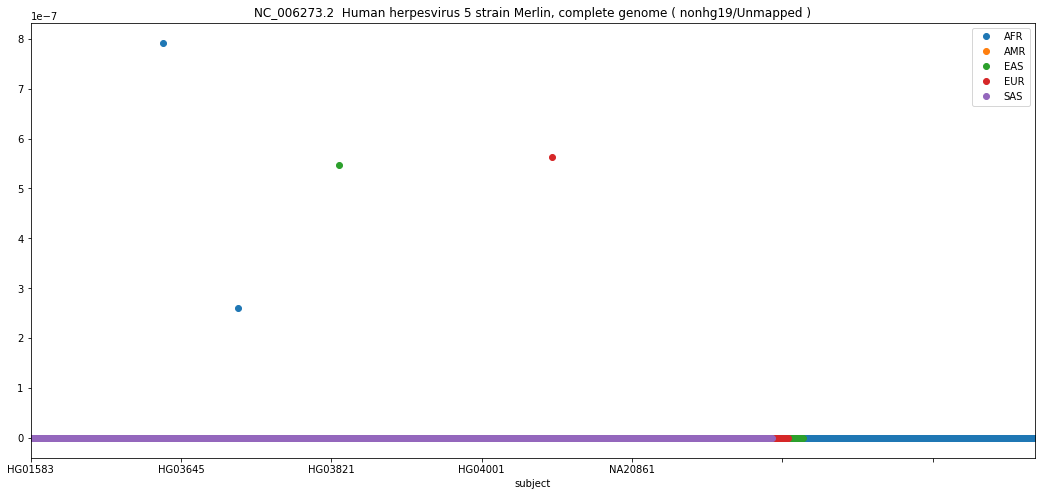

NC_007605.1  Human gammaherpesvirus 4, complete genome


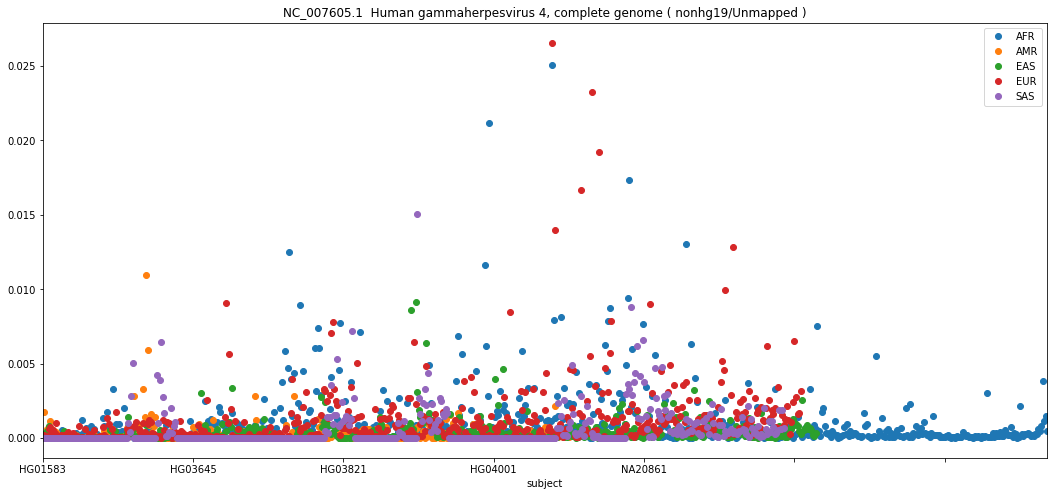

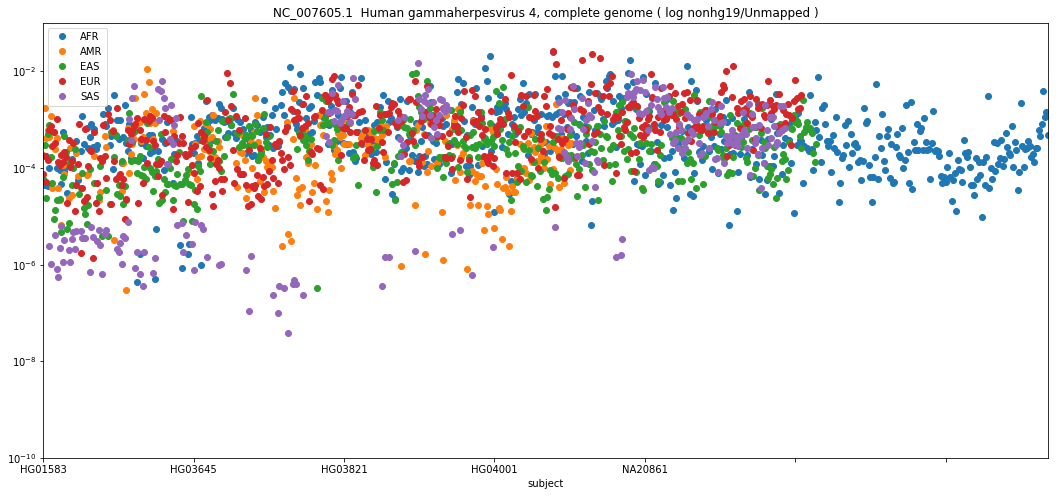

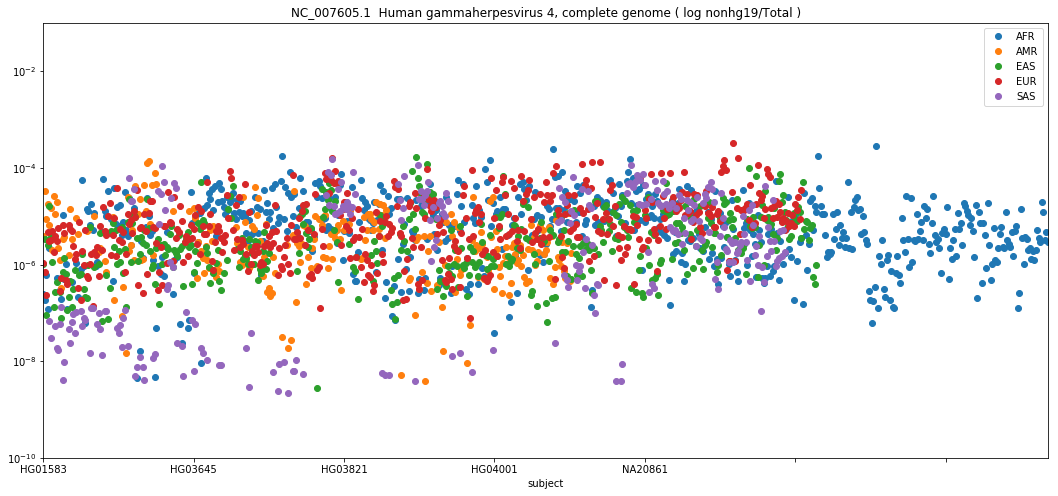

NC_009333.1  Human herpesvirus 8, complete genome


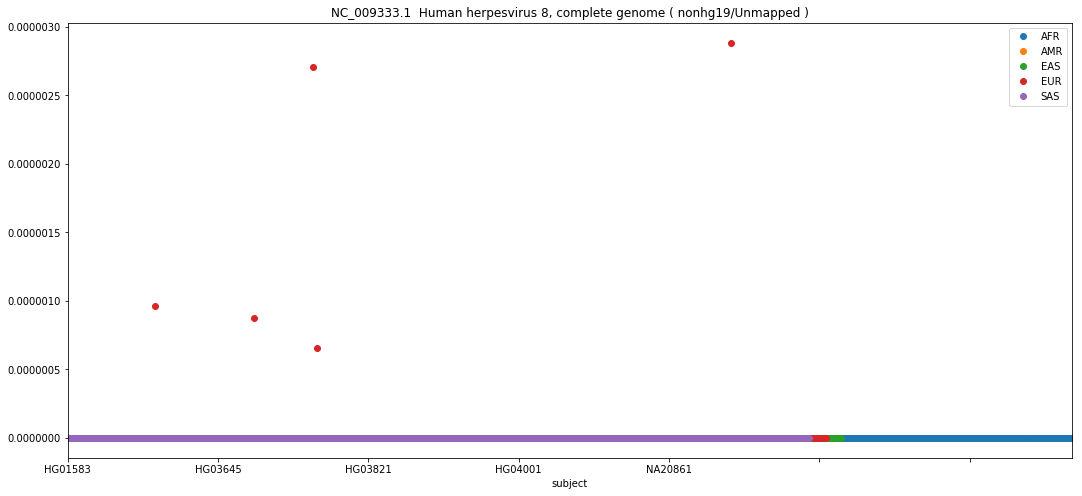

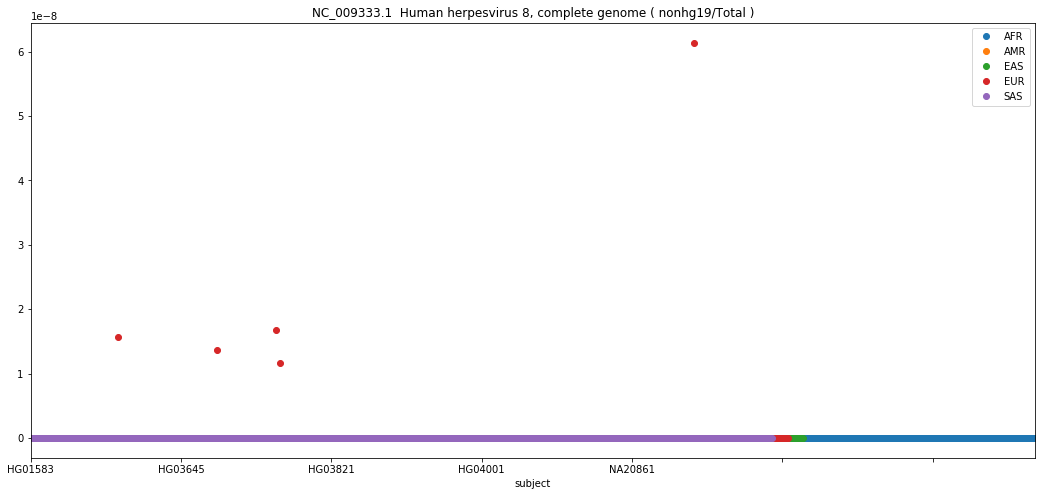

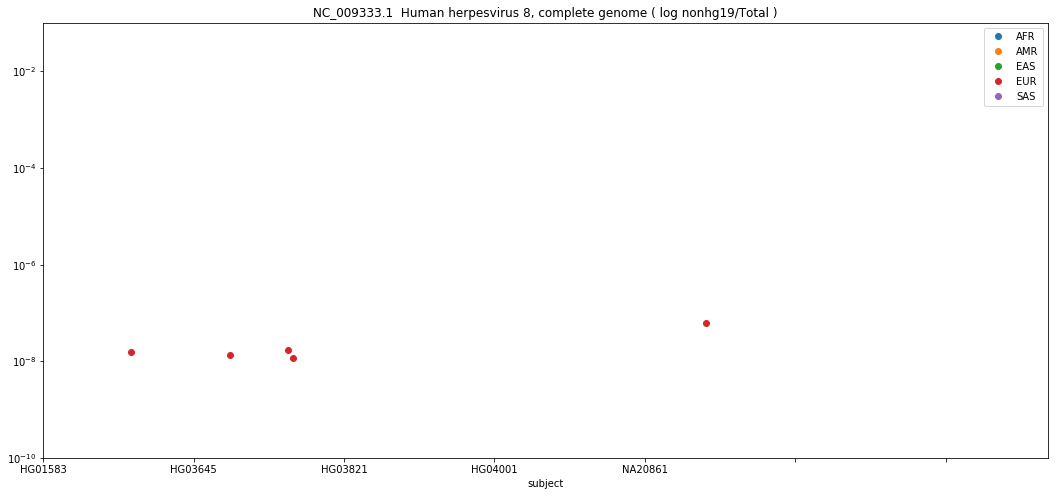

U43400.1  Human herpesvirus-7 (HHV7) JI, complete virion genome


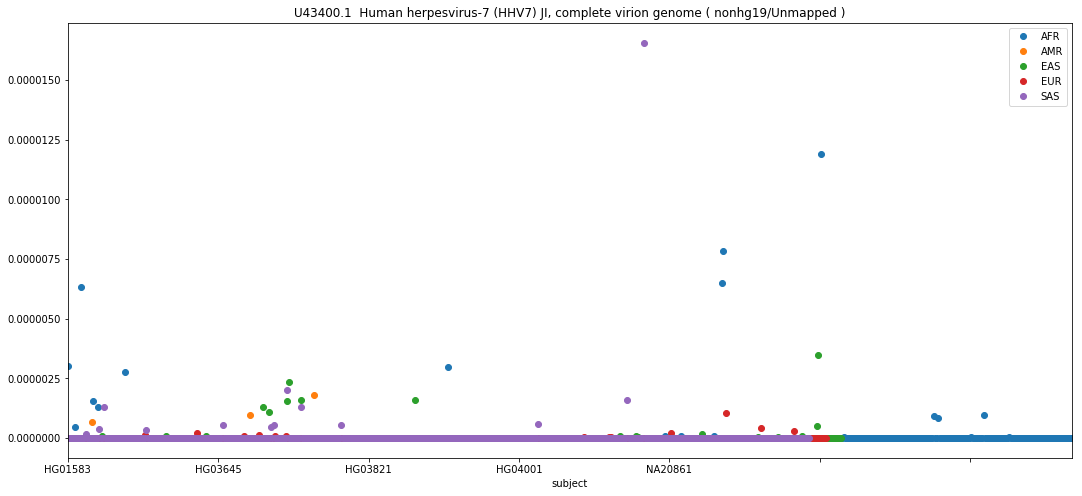

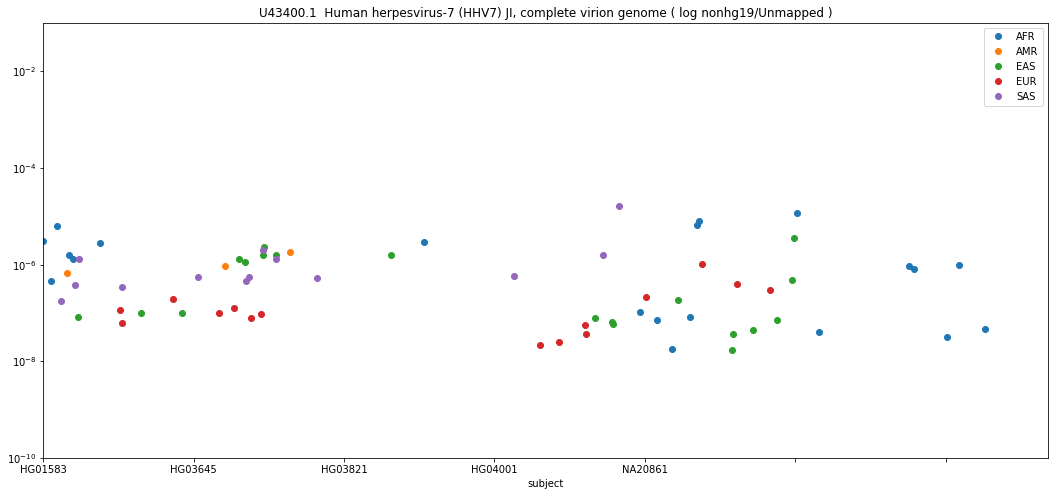

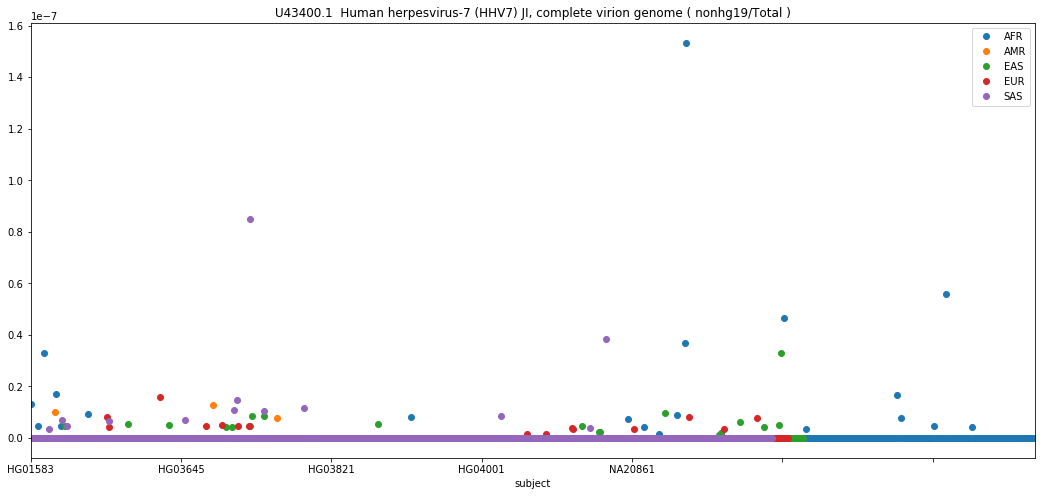

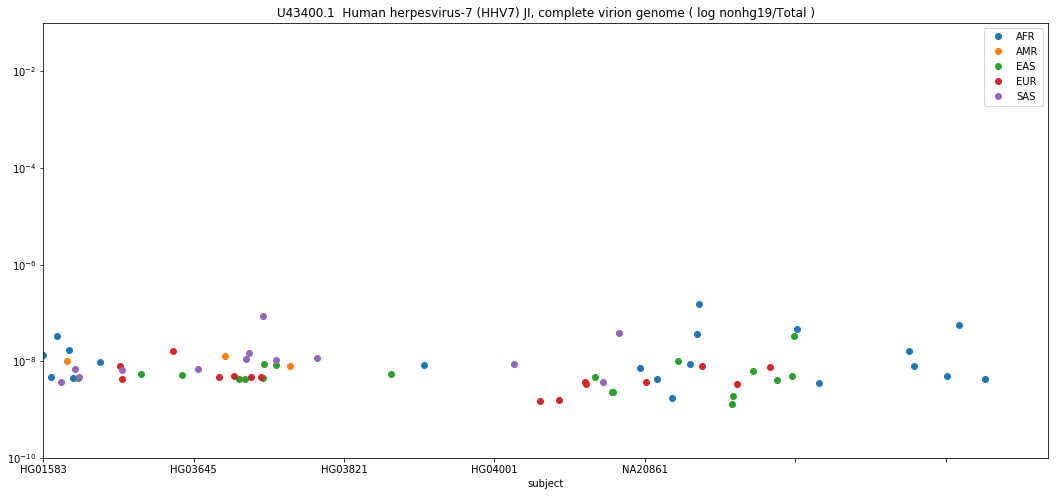

U46016.1  Human immunodeficiency virus type 1 subtype C complete proviral genome


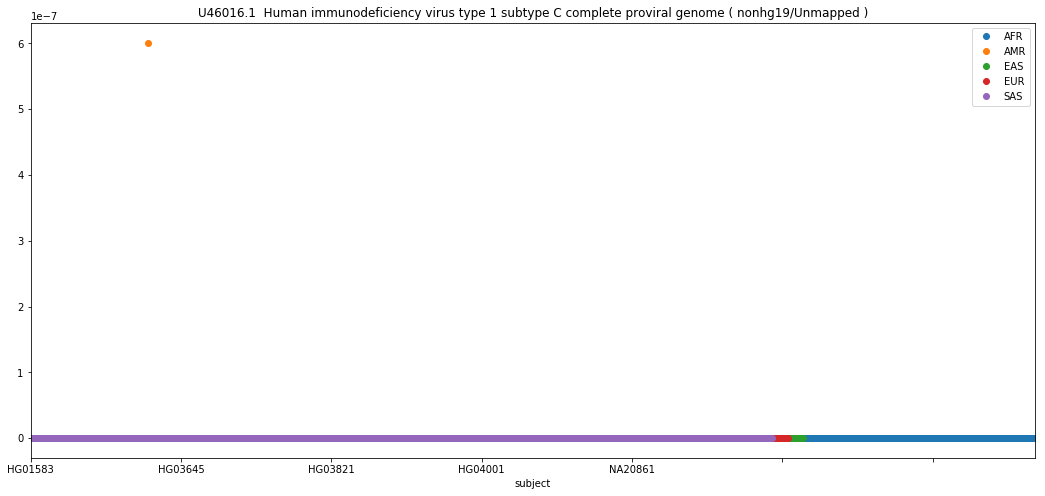

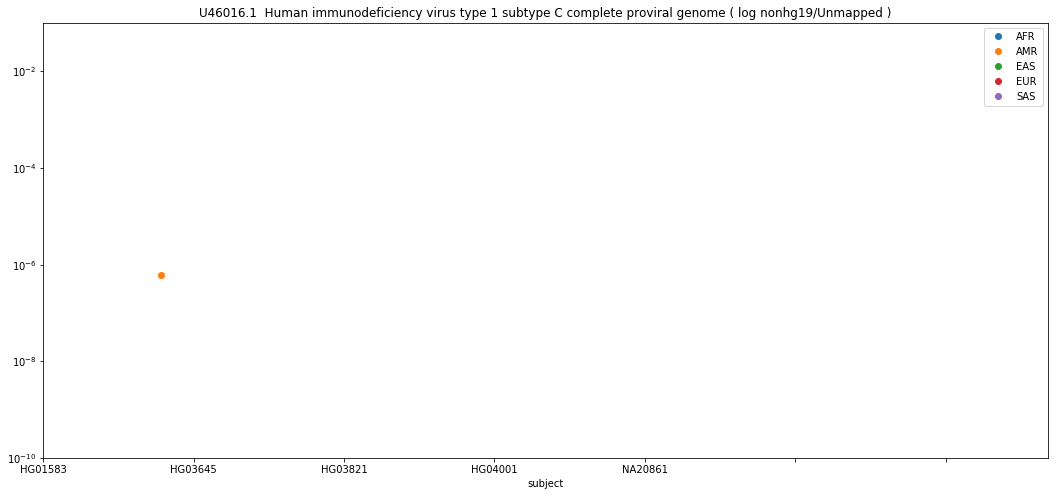

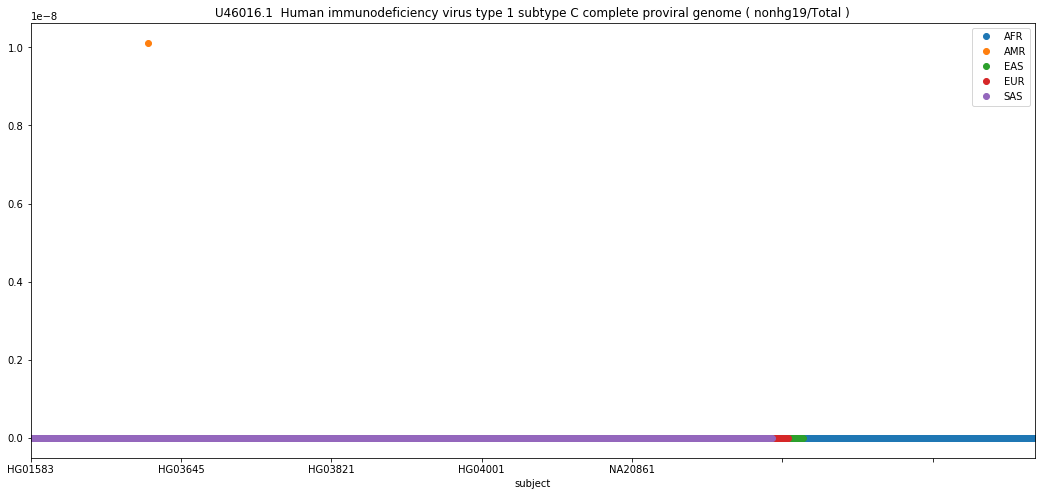

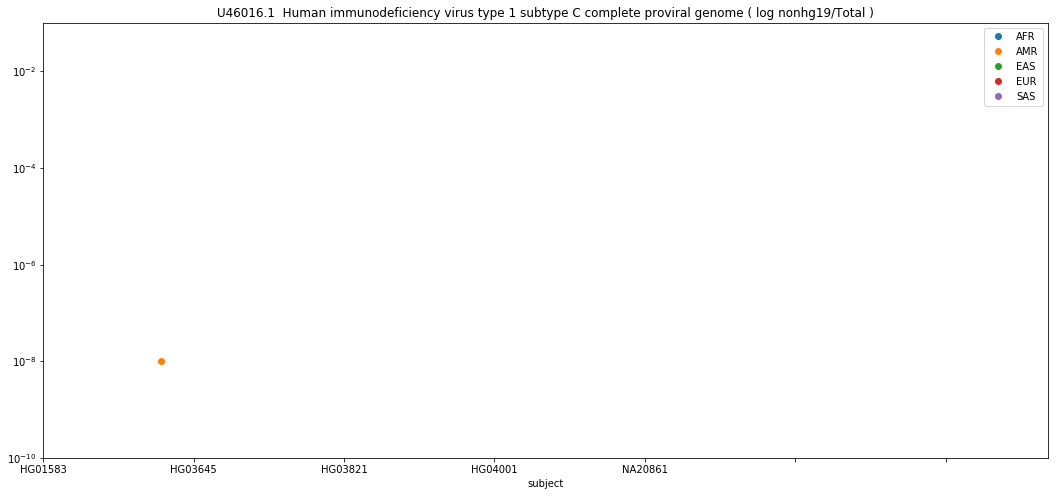

U54771.1  Human immunodeficiency virus type 1, strain CM240, complete proviral genome


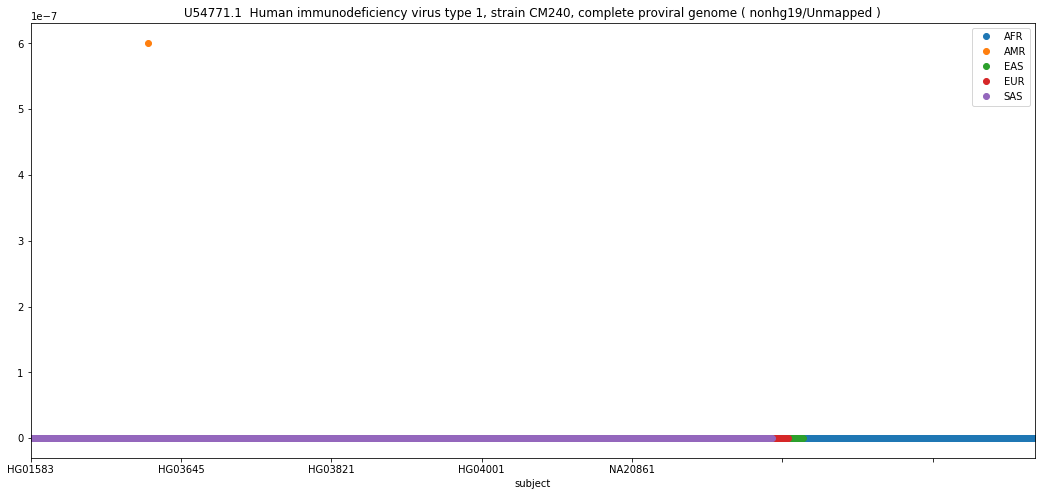

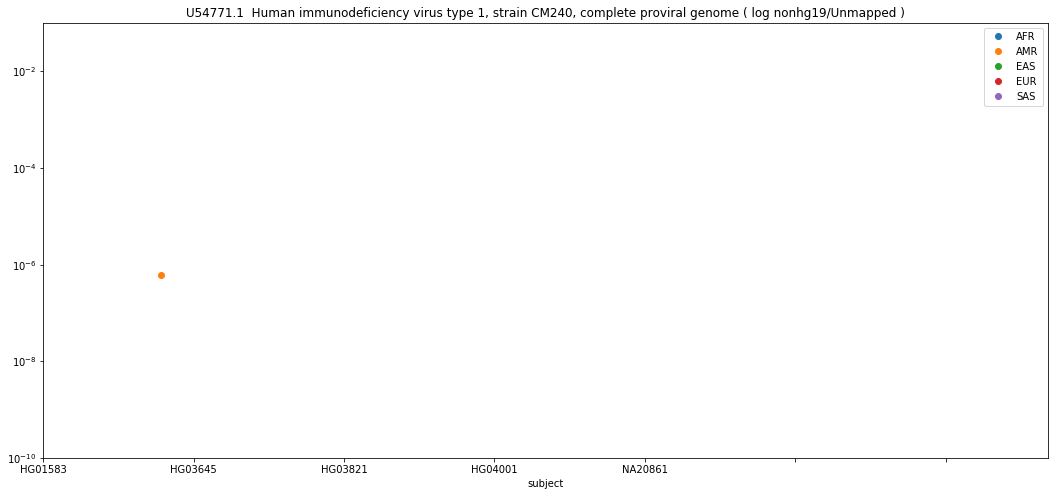

X14112.1  Human herpesvirus 1 complete genome


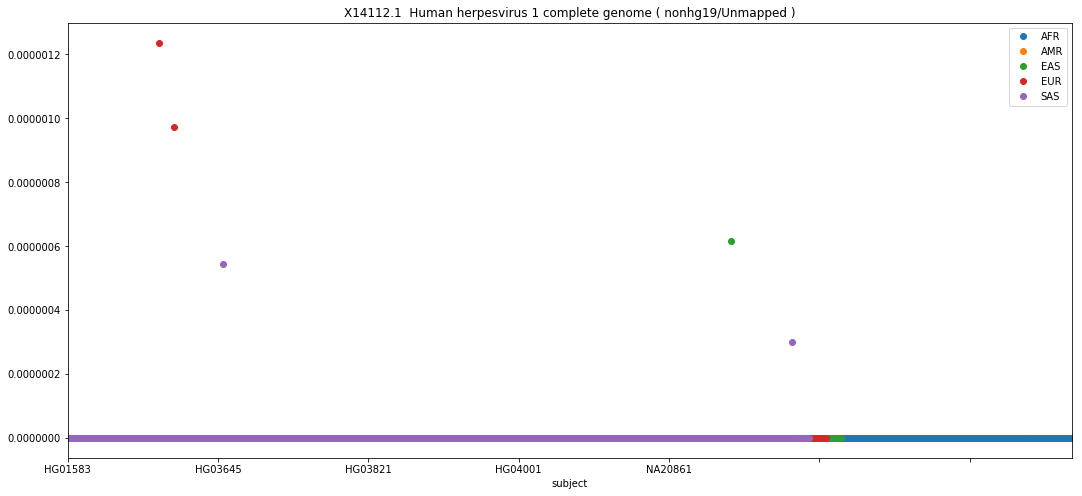

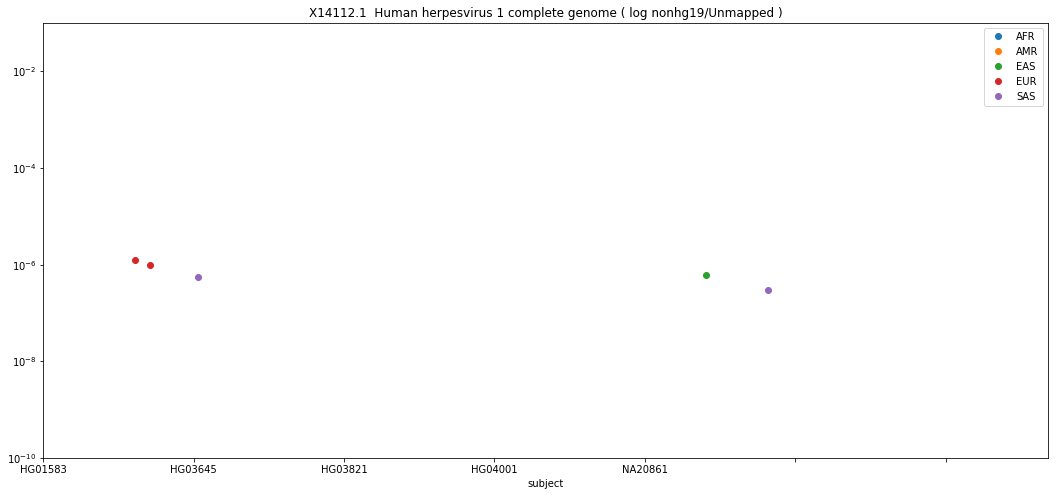

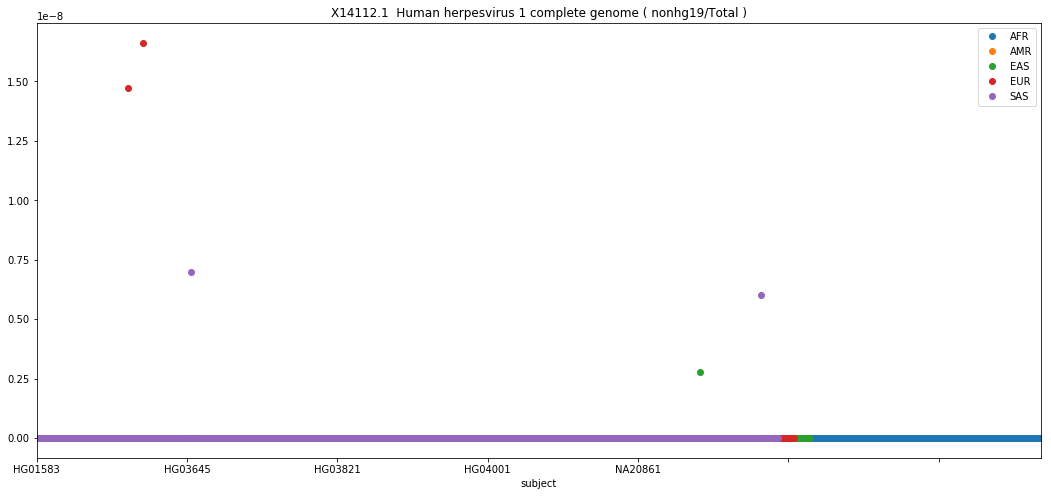

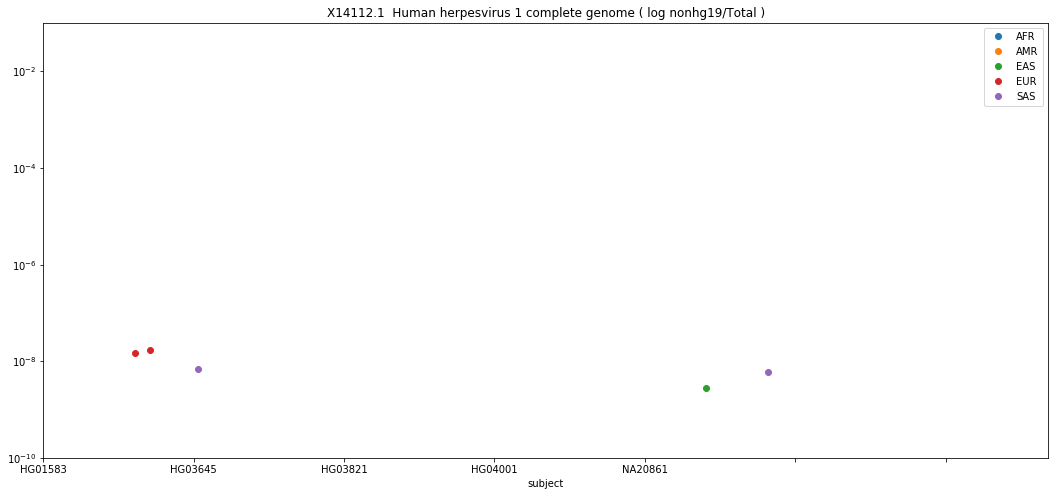

X17403.1  Human cytomegalovirus strain AD169 complete genome


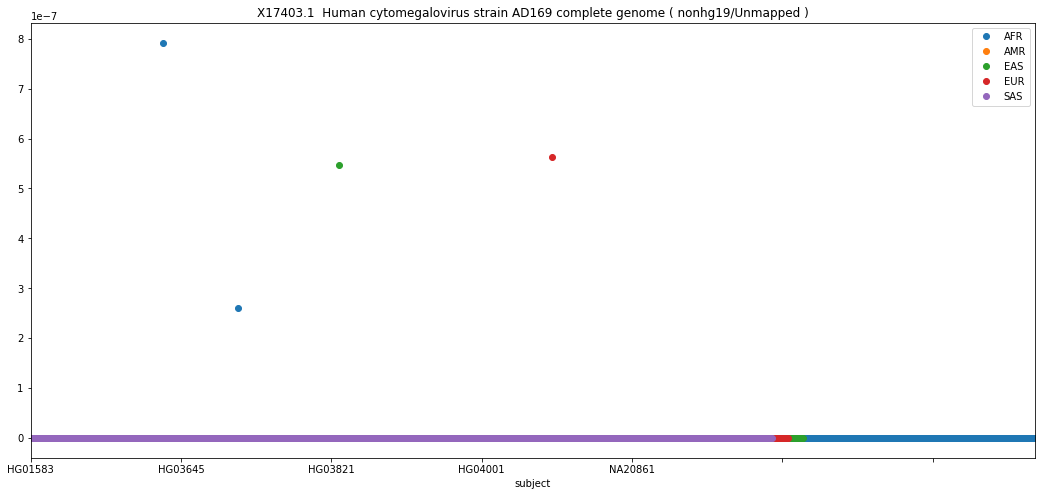

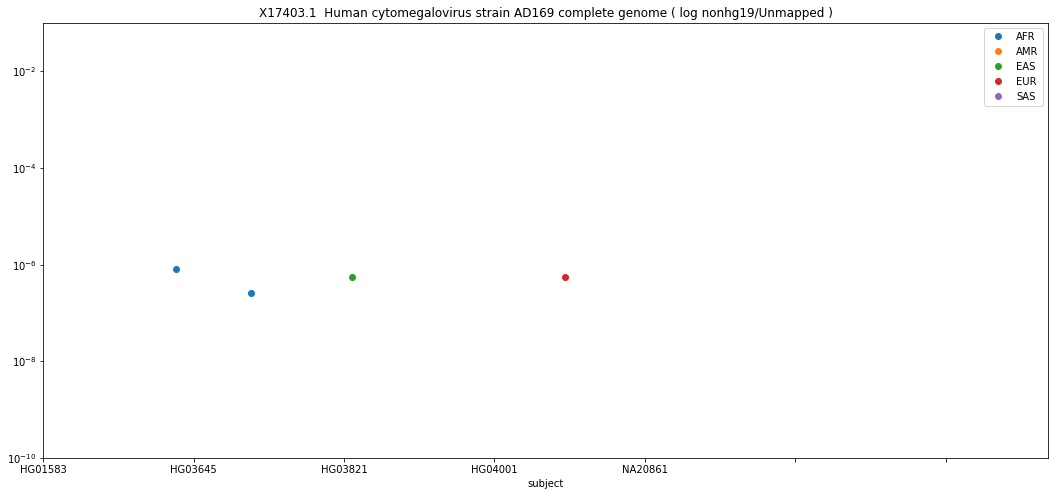

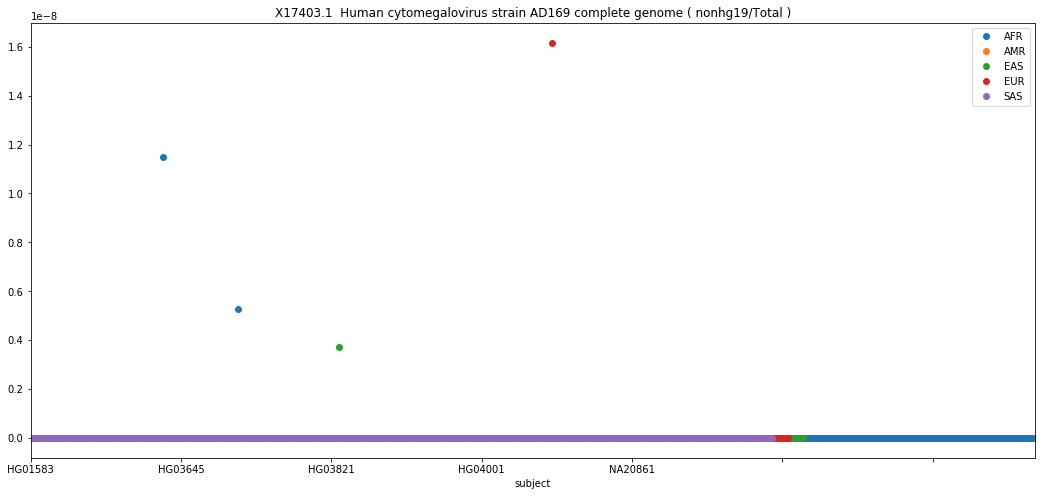

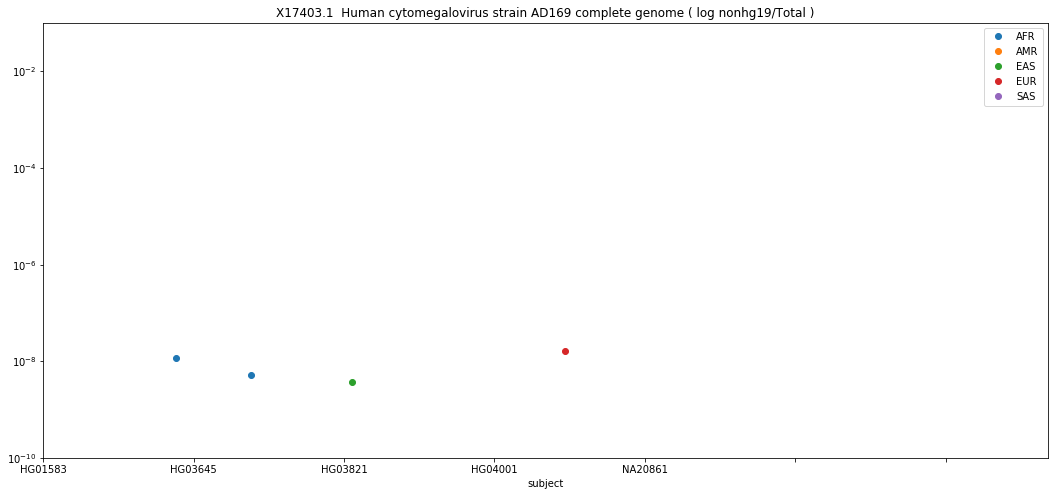

X75658.1  Human hepatitis virus (genotype F, Fou) preS1, preS2, S, C, X, antigens, core antigen, X protein and polymerase


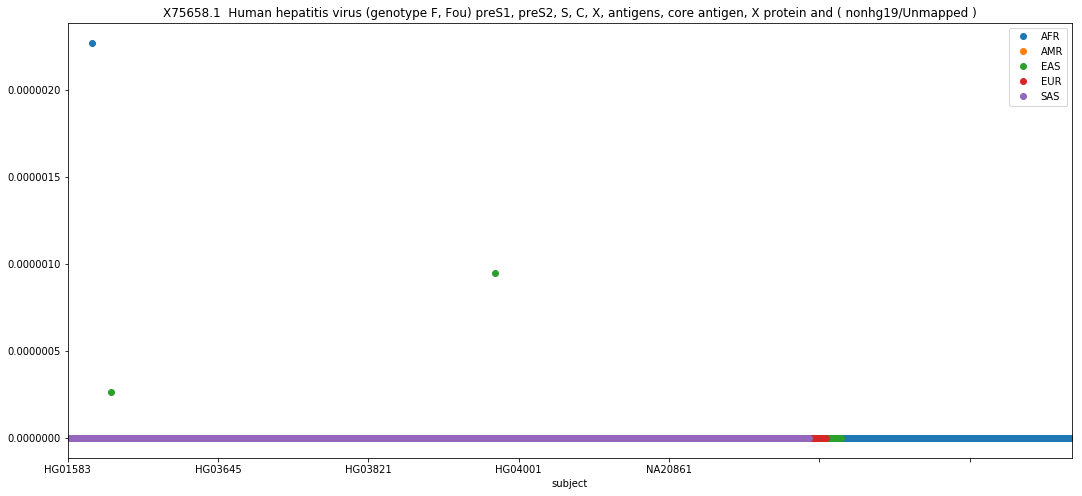

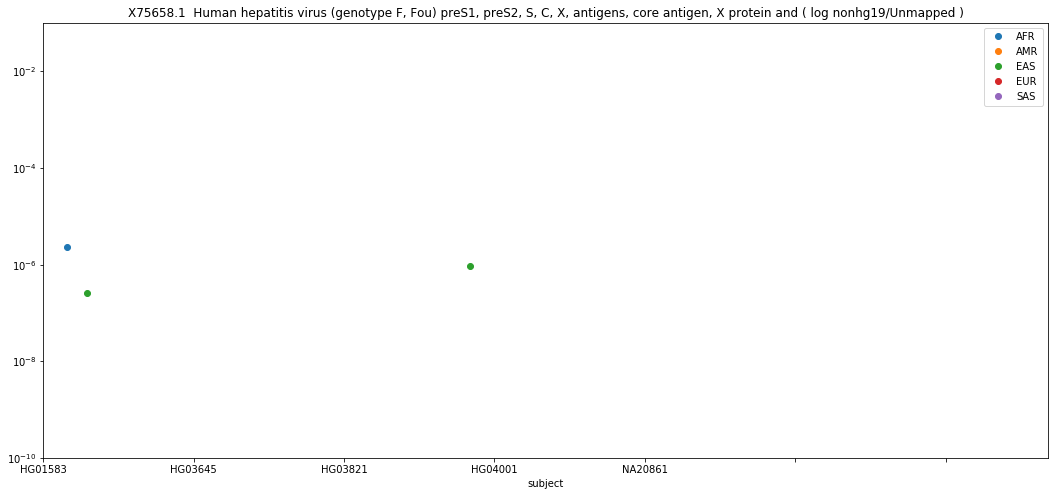

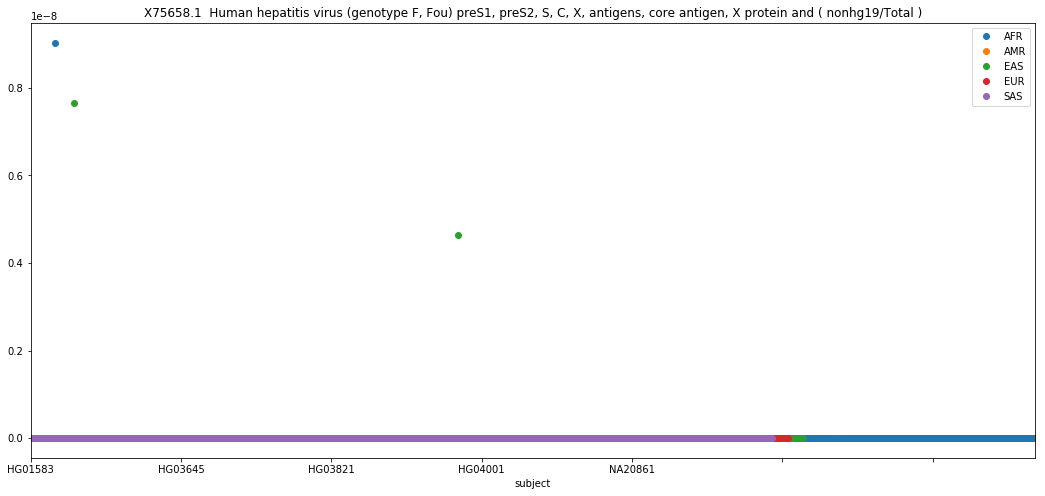

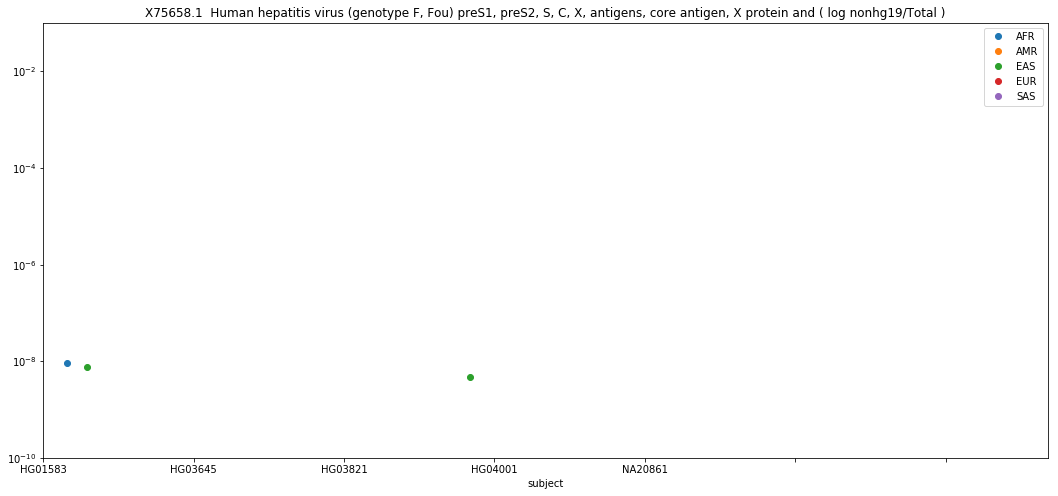

X83413.2  Human betaherpesvirus 6A, variant A DNA, complete virion genome, isolate U1102


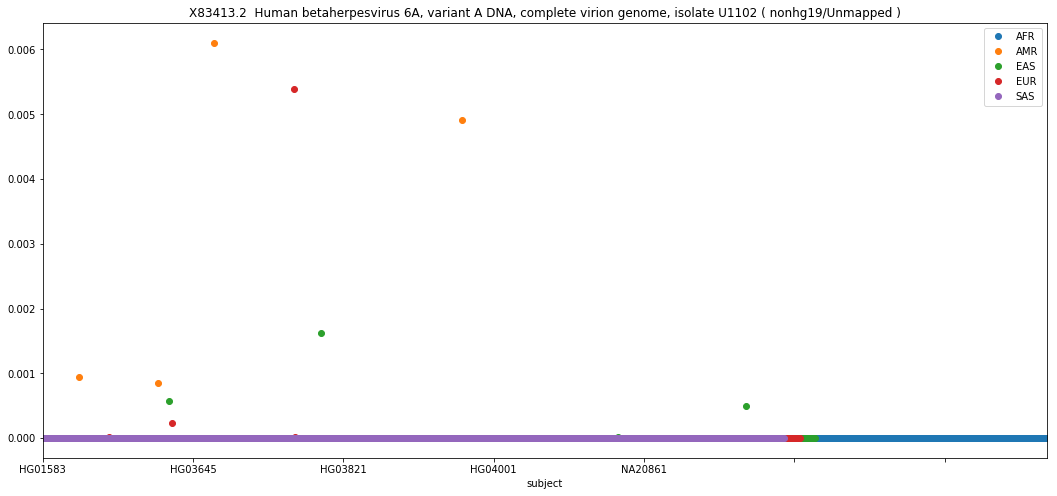

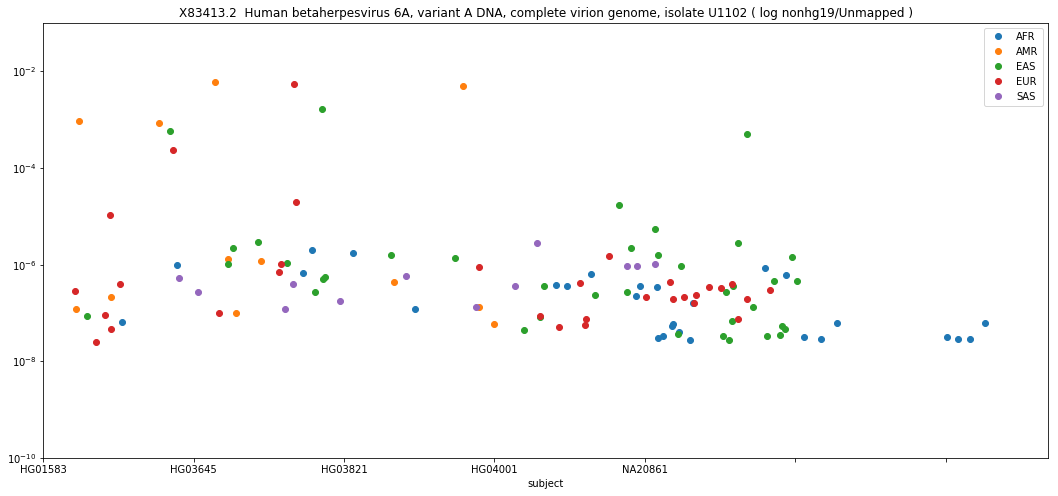

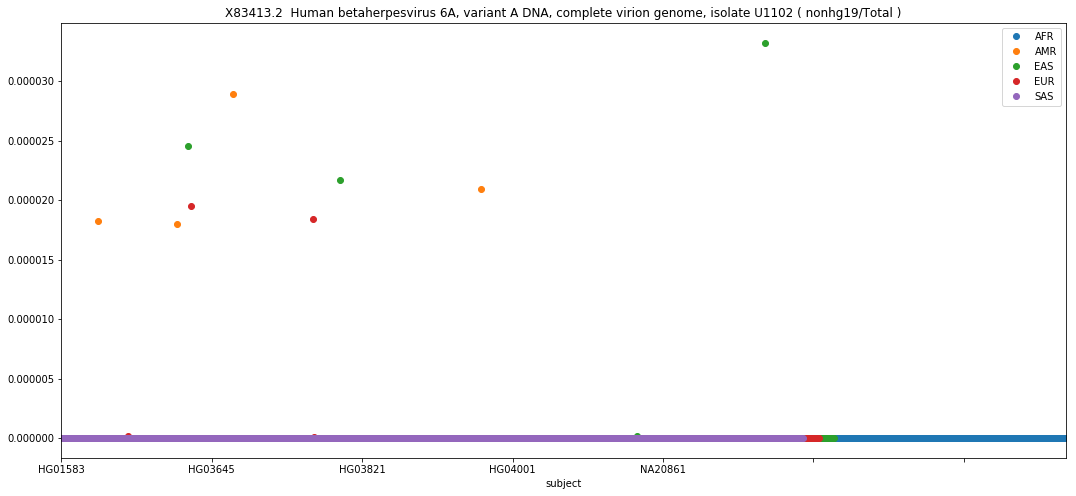

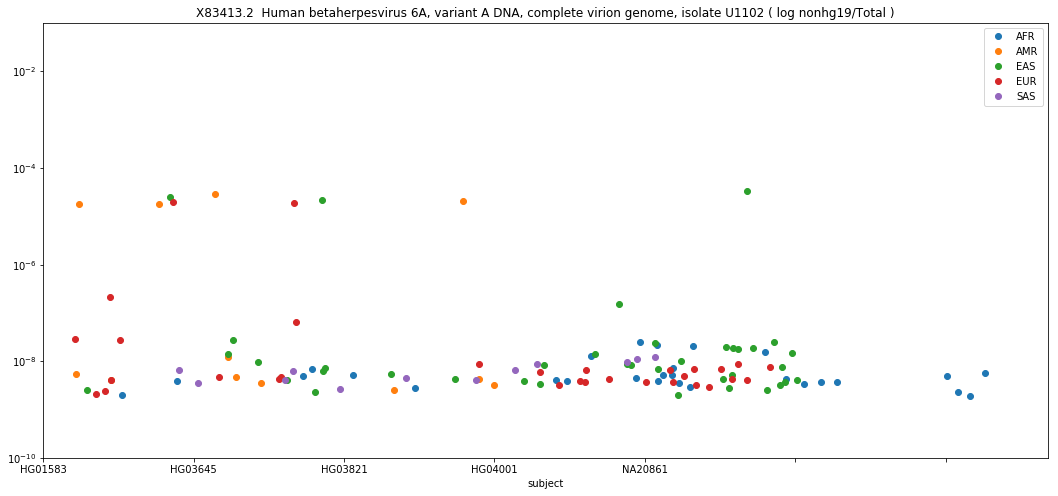

Z86099.2  Herpes simplex virus type 2 (strain HG52), complete genome


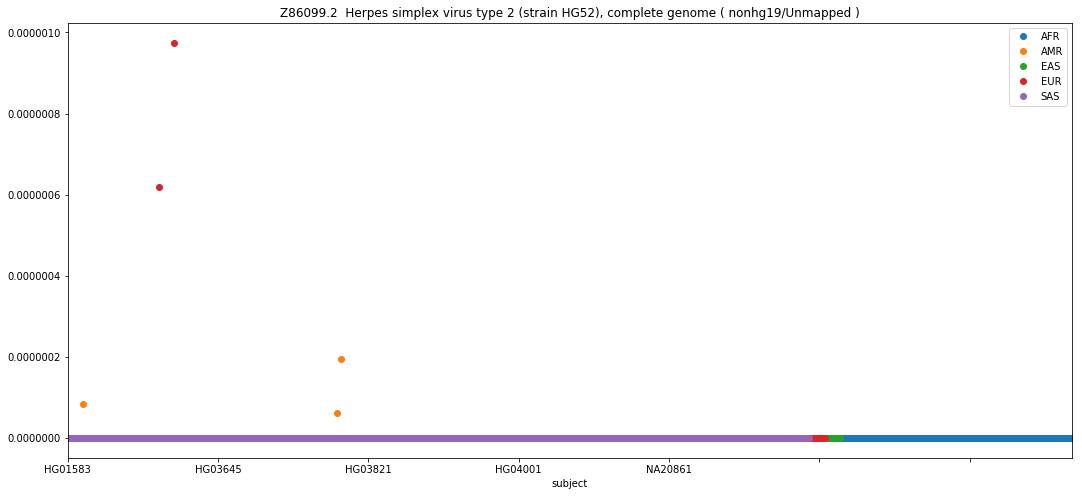

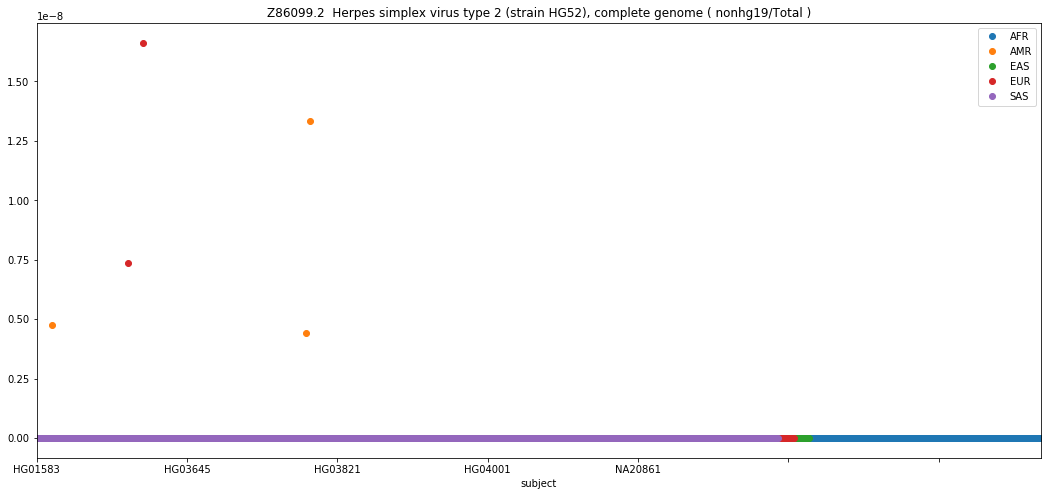

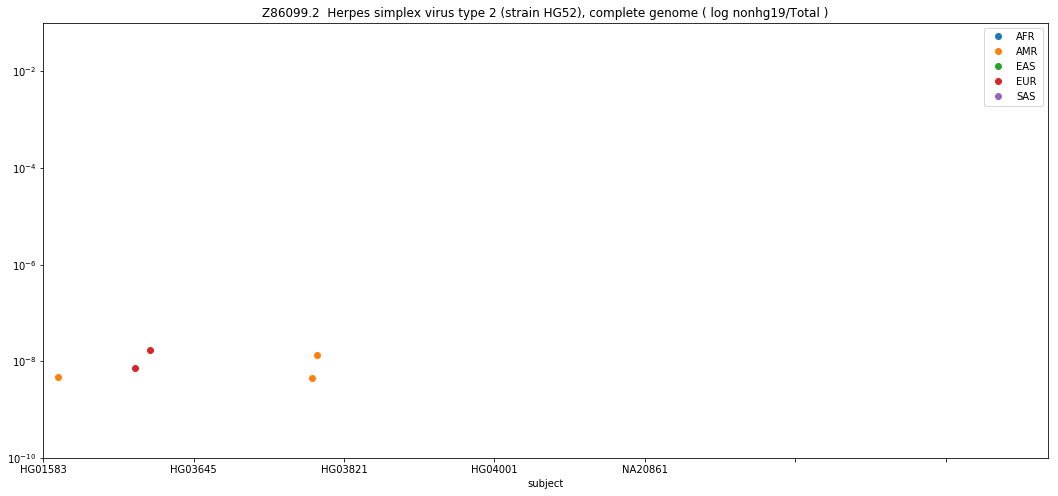

In [10]:
for accession, row in virii.iterrows():
    tmp=accession.replace(".", "_")
    if( df['nonhg19_'+tmp+'_unmapped'].max() > 0 ):  
        title=accession + "  " + row['description']
        print(title)
        #df.plot( title=title[:110],marker='o',linewidth=0,
        #            logy=False,x='subject',y='nonhg19_'+tmp+'_unmapped')

        fig, ax = plt.subplots()
        for name, group in df.groupby('Super Population Code'):
            group.plot(title=title[:110] + " ( nonhg19/Unmapped )",
                x='subject', y='nonhg19_'+tmp+'_unmapped', ax=ax, label=name, marker='o',linewidth=0)
        plt.legend()
        
        fig, ax = plt.subplots()
        for name, group in df.groupby('Super Population Code'):
            group.plot(title=title[:110] + " ( log nonhg19/Unmapped )", logy=True, ylim=[1e-10,0.1],
                x='subject', y='nonhg19_'+tmp+'_unmapped', ax=ax, label=name, marker='o',linewidth=0)
        plt.legend()
        #fig, ax = plt.subplots()
        #for name, group in df.groupby('Gender'):
        #    group.plot(x='subject', y='nonhg19_'+tmp+'_unmapped', ax=ax, label=name, marker='o',linewidth=0)
        #plt.legend()

        #df.plot( title=title[:110],marker='o',linewidth=0,
        #            logy=False,x='subject',y='nonhg19_'+tmp+'_total')

        fig, ax = plt.subplots()
        for name, group in df.groupby('Super Population Code'):
            group.plot(title=title[:110] + " ( nonhg19/Total )",
                x='subject', y='nonhg19_'+tmp+'_total', ax=ax, label=name, marker='o',linewidth=0)
        plt.legend()
        
        fig, ax = plt.subplots()
        for name, group in df.groupby('Super Population Code'):
            group.plot(title=title[:110] + " ( log nonhg19/Total )", logy=True, ylim=[1e-10,0.1],
                x='subject', y='nonhg19_'+tmp+'_total', ax=ax, label=name, marker='o',linewidth=0)
        plt.legend()
        #fig, ax = plt.subplots()
        #for name, group in df.groupby('Gender'):
        #    group.plot(x='subject', y='nonhg19_'+tmp+'_total', ax=ax, label=name, marker='o',linewidth=0)
        #plt.legend()

        plt.show()


In [11]:
for accession, row in virii.iterrows():
    tmp=accession.replace(".", "_")
    if( df['nonhg19_'+tmp+'_unmapped'].max() > 0 ):
        mean=df['nonhg19_'+tmp+'_unmapped'].mean()
        std=df['nonhg19_'+tmp+'_unmapped'].std()
        print(accession + "  " + row['description'] + "\nmean " + str(mean) + "\tstddev " + str(std))
        s=df[ df['nonhg19_'+tmp+'_unmapped'] > ( mean + std )]
        print(">mean+stddev : " + str(len(s)))
        print(", ".join(s['subject'].tolist()))
        s=df[ df['nonhg19_'+tmp+'_unmapped'] > ( mean + 2 * std )]
        print(">mean+2*stddev : " + str(len(s)))
        print(", ".join(s['subject'].tolist()))
        print()
        print()

AB513134.1  Human T-lymphotropic virus 1 proviral DNA, complete genome, isolate: B1033-2009
mean 3.128350415303301e-07	stddev 1.3462169772396192e-05
>mean+stddev : 5
HG01357, HG01917, HG01918, HG02675, HG03370
>mean+2*stddev : 3
HG01357, HG01918, HG03370


AB618031.1  Herpes simplex virus (type 1 /strain RH2) DNA, nearly complete genome
mean 5.806225197409702e-06	stddev 0.00013421549948212
>mean+stddev : 7
HG04096, NA19660, NA19661, NA19678, NA19684, NA19685, NA19720
>mean+2*stddev : 6
NA19660, NA19661, NA19678, NA19684, NA19685, NA19720


AF037218.1  Human herpesvirus 7 strain RK, complete genome
mean 2.7781507179028168e-08	stddev 4.461209803508433e-07
>mean+stddev : 24
HG00743, HG01305, HG01413, HG01844, HG01896, HG01988, HG02009, HG02282, HG02682, HG03111, HG03652, HG03715, HG03731, HG03745, HG03786, HG04026, HG04227, NA18916, NA18917, NA19076, NA19204, NA19436, NA19439, NA19711
>mean+2*stddev : 18
HG01305, HG01413, HG01844, HG01896, HG01988, HG02009, HG02282, HG02682, HG03111, HG03

NC_009333.1  Human herpesvirus 8, complete genome
mean 3.1884436664841038e-09	stddev 8.369856834710977e-08
>mean+stddev : 5
HG00174, HG00306, HG00357, HG00361, NA20586
>mean+2*stddev : 5
HG00174, HG00306, HG00357, HG00361, NA20586


U43400.1  Human herpesvirus-7 (HHV7) JI, complete virion genome
mean 3.731393714497068e-08	stddev 5.004705781763675e-07
>mean+stddev : 31
HG00743, HG01305, HG01413, HG01795, HG01799, HG01812, HG01813, HG01844, HG01879, HG01896, HG01988, HG02009, HG02130, HG02282, HG02682, HG03111, HG03652, HG03715, HG03731, HG03745, HG04026, HG04202, HG04227, NA18916, NA18917, NA19076, NA19204, NA19436, NA19439, NA19711, NA20581
>mean+2*stddev : 23
HG01413, HG01795, HG01799, HG01812, HG01813, HG01844, HG01879, HG01896, HG01988, HG02009, HG02130, HG02282, HG02682, HG03111, HG03731, HG03745, HG04202, HG04227, NA18916, NA18917, NA19076, NA19204, NA20581


U46016.1  Human immunodeficiency virus type 1 subtype C complete proviral genome
mean 2.3714222531805074e-10	stddev 1.19398

In [12]:
group = df.groupby('Super Population Code')

In [13]:
group.groups

{'AFR': Int64Index([ 678,  679,  680,  681,  682,  683,  684,  685,  688,  689,
             ...
             2311, 2312, 2313, 2314, 2315, 2316, 2317, 2318, 2319, 2320],
            dtype='int64', length=669),
 'AMR': Int64Index([ 229,  230,  231,  268,  269,  270,  271,  301,  302,  303,
             ...
             2254, 2255, 2256, 2257, 2258, 2259, 2260, 2261, 2262, 2263],
            dtype='int64', length=352),
 'EAS': Int64Index([ 186,  187,  188,  189,  190,  191,  192,  193,  194,  195,
             ...
             2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043],
            dtype='int64', length=515),
 'EUR': Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
             ...
             2419, 2420, 2421, 2422, 2423, 2424, 2425, 2426, 2427, 2428],
            dtype='int64', length=505),
 'SAS': Int64Index([ 539,  540,  541,  542,  972,  973,  974,  975, 1014, 1015,
             ...
             2525, 2526, 2527, 2528, 2529, 2530, 2531, 2532

In [14]:
import datetime
print(str(datetime.datetime.now()))

2019-02-02 21:18:29.826360
